In [1072]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import seaborn as sns
import re
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from spellchecker import SpellChecker
import pkg_resources
from symspellpy import SymSpell, Verbosity
lemmatizer = WordNetLemmatizer() 
list_of_stopwords = list(stopwords.words('english'))

In [1073]:

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)


True

In [1074]:
suggestions = sym_spell.lookup_compound("youtube", max_edit_distance=2)
for suggestion in suggestions:
    print(str(suggestion).split(',')[0])
#     correct_description.append(str(suggestion).split(',')[0])


youtube


In [1075]:
df = pd.read_csv("Dataset.csv",encoding='latin-1')

In [1076]:
# ProfileReport(df, title="Pandas Profiling Report").to_file("output.html")

In [1077]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [1078]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [1079]:
columns = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'link_color', 'name', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_count',
       'tweet_created', 'tweet_id',]

In [1080]:
df1 = df[columns]

In [1081]:
df1 = df1.dropna(how ='any',axis = 0)

In [1082]:
df1.isnull().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender                   0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
link_color               0
name                     0
profileimage             0
retweet_count            0
sidebar_color            0
text                     0
tweet_count              0
tweet_created            0
tweet_id                 0
dtype: int64

In [1083]:
important_features = ["gender","gender:confidence","description","name","text"]

In [1084]:
df2=df1[important_features]

In [1085]:
df2 = df2[df2['gender:confidence'] ==1]
df2 = df2[df2['gender'] != 'unknown']

In [1086]:
df2.head()

,gender,gender:confidence,description,name,text
0,male,1.0,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...
1,male,1.0,I'm the author of novels filled with family dr...,DavdBurnett,ÛÏIt felt like they were my friends and I was...
3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...
5,female,1.0,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair..."


In [1087]:
ans = []
def camelCases(string):
    splitted = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', string)).split()
    print(splitted)
    string = ' '.join([str(elem) for elem in splitted])
    listToStr = string.translate ({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+0123456789"})
    ans.append(str(listToStr).lower())

In [1088]:
for i in range(df2.shape[0]):
    camelCases(df2['name'].iloc[i])


['sheezy0']
['Davd', 'Burnett']
['douggarland']
['Wilford', 'Gemma']
['monroevicious']
['Shutterstock']
['Robin', 'Meske']
['pigzilla_']
['Gabriele', 'Neher']
['eliseotecleo']
['americacredit']
['Toucaan_', 'Samm']
['S', 'Smyth2010']
['jlpeter37']
['Sarah', 'Maddry']
['bethleia']
['Strictly', 'Ari']
['J', 'Hurkett']
['karenhbullard']
['Dear', 'Moonshine__']
['TV_', 'Trax']
['Hal', 'Rappaport']
['sarahamiels']
['TB12', 'For', 'Prez']
['click88sure']
['300', 'Stain']
['USA', 'Child', 'Care']
['__amira_']
['lifessubatomic']
['brandonpattrson']
['Geek_', 'Initiative']
['danydifazio']
['fetchfind']
['KABULALA']
['DJKRO']
['alexandraalice']
['Ollie', 'C9897']
['ll', 'IUMINA', 'Tl', 'RES', 'Ml']
['sh6ne']
['Scott_', 'Ryan_']
['Caron', 'Hohner']
['manikarthik']
['SML2020']
['cheer_diva97']
['BURN', 'Sl', 'VAN']
['Mr', 'AB', 'Photog']
['Moonfell44']
['alanhudson1']
['Miss_', 'Masaya']
['RAEHEREEEE']
['MIA', 'Skate', 'Shop']
['butkick2000']
['WF', 'Wildcats']
['Angie', 'Mozart']
['starsjournal']

['Sycamore', 'PC']
['snppoliticsnews']
['Said', 'Dineo']
['Ismou008']
['Th3', 'Anaesthetist']
['Blue66uk']
['_littleally']
['jerseyherb1']
['jtlejeune4']
['badlandsprepon']
['Paul', 'Tonkinson']
['The', 'Screech', 'Owl1']
['heatherg33k']
['mricciardi4']
['Smoothamy']
['BIG_', 'SEXXYY']
['kxmnmjns']
['Iam', 'Edison', 'A']
['manillarainero']
['Carlfletcher15']
['_', 'Juanito__']
['gaaaaaby___']
['lilysnuckinfuts']
['SIUE', 'Cougars']
['john', 'Iaurens']
['J', 'Bell94']
['stephaniepnix']
['Mohamed80570137']
['_litchic']
['simontilley1']
['Courtney', 'Court__']
['simonspecial']
['4', 'X', 'Trade', 'Ideas']
['book_tribe']
['morfiller']
['Shuhniece']
['carouselworld']
['Peanuts', 'Pretzels']
['Rose', 'Gold', 'Nairad']
['ML', 'Bpostseasoner']
['courtsssrxo']
['Double', 'Dumas']
['kalynmd']
['onefitmom_']
['Mr', 'Aitch451']
['toridipinto']
['Lil', 'Speedy_', 'Abby']
['Sound', 'Check', 'Inc']
['Prettyl0u']
['double_cheese']
['Deckle_', 'Edge']
['Villawase']
['vawf0604']
['_', 'Creative', 'Natio

['POTUS', 'Press', 'Pool']
['Music_', 'Reddit']
['vambenepe']
['Glen', 'Bikes']
['Amir', 'Paiss']
['freebetshome']
['Mattiecooper']
['Holstein', 'USA']
['katrinamason84']
['yessinya_lh']
['Shaydoeshair']
['Youjizz_free']
['freejoshgordon_']
['Jedi', 'News', 'UK']
['Wash', 'Post', 'VA']
['le_debut']
['Yorky', 'Puds']
['shonkerr']
['Hero', 'Sports', 'News']
['johnrtworld']
['debtclear']
['Ohska_']
['40billion']
['City', 'Club', 'Raleigh']
['sickpiledrivers']
['oker59']
['Podcasts', 'In', 'Color']
['mbrollcake']
['Entrepre_', 'Loser']
['vill_genevieve']
['Queen_', 'Agnez', 'Mo']
['KILLA_', 'KLEA']
['TNFOF']
['cducksbury']
['Almigh_', 'Bobby']
['juniorvalero151']
['C', 'Lopresti', 'WFAN']
['Karen', 'L', 'Mc', 'Hale']
['gnarlyorion']
['Jen', 'Wilcoxphotog']
['Torbay_', 'Hour']
['DY_', 'IO_23']
['Santa', 'Cs', 'Workshop']
['Pres', 'Hodge']
['smxmagazin']
['Patriotic', 'Geek']
['qdeagles']
['st_helens_lass']
['Mike', 'Gorman', 'HFX']
['be', 'I', 'Tresourcing']
['Gboru', 'M']
['bull', 'DOELZ',

['Cnverg']
['KPMGUS', 'Careers']
['sosofreshuk']
['Southern', 'Malachi']
['yetnaleci']
['topnewscenter']
['minnieminzyminx']
['azvibesports']
['securenet']
['Akia', 'Jones', 'ML']
['alexandria_x0xo']
['Mathematics1001']
['__', 'Amor', 'Fiel']
['Tania', 'On', 'The', 'Scene']
['Applebome']
['lucyandersen_x']
['Amy', 'Welshxx']
['Kayleigh', 'EU']
['westdupontwines']
['Fortune', 'Mod_']
['99designs']
['Sassy', 'Ninja', 'Guru']
['i', 'Am', 'Jeff', 'Sledge']
['bzatrok']
['Papi', 'Del', 'Guapo']
['nashe', 'TL']
['darwinsnews']
['victoriacha']
['Space', 'Mousey']
['btsteelcurtain']
['getnuggetapp']
['The', 'Today', 'Show']
['CC', 'West', 'Pulaski']
['Bath', 'Spa', 'Dent']
['tulip_jenkins']
['Edwyna', 'CES']
['Samsungsphones']
['harriet_grose']
['redcarpetcrash']
['goldsmithh66']
['Mister', 'Iyanu']
['T_', 'Urness']
['RE', 'News', 'Fort', 'Worth']
['northernersrock']
['ryanswanstrom']
['khel___']
['Glizzy', 'Lanie']
['jsoupzzz']
['Rasheeda', 'Ledet']
['Awesome', 'Jenn11']
['attidon']
['Spronks1

['Nakedx', 'Irwin']
['Samsara', 'Farm']
['dolandouche']
['FMB', 'Igtbt']
['Latic', 'Laydee']
['clarinety10']
['pink', 'ARM', 'Ybrat697']
['brokenvertebra']
['newyorkcelebs']
['It', 'Could', 'Be_you']
['Nathan', 'Wu84']
['nvrsuzyy']
['itsnini_bishh']
['Psychospam', 'YT']
['Geoff', 'Hahn', 'CFP']
['_', 'Girl', 'With', 'Curls']
['katlynnn__']
['tay_', 'ANNALISE']
['The', 'Tech', 'Scribe']
['_katiasecret']
['Lampett88']
['Typhoon', 'Watch']
['ashlynmmcgee']
['caramell', 'RUSH']
['NEW', 'Sor', 'NOTHING']
['Nick', 'Bieber', 'HP']
['Chris', 'Ting_']
['saskia', 'WHAT']
['84', 'JESSIE', 'Dana2']
['Little', 'Miss', 'Gunn1']
['ayanapls']
['Lo', 'Mullinix']
['bynadinek']
['Lalokilla', 'M']
['reservoirhomos']
['its_alicia']
['The_', 'First_', 'Stone']
['W', 'Spriggs']
['sam_hunts_beard']
['Arap', 'Sports']
['cursedornot']
['dan_edwards10']
['Cassandra', 'Rules']
['Jamie1947']
['Tell', 'Em', 'Cynn', 'XO']
['Kellaaaaaa_']
['awakemys0ul_']
['Larry63333']
['mattsb0ner_']
['klaejordvn']
['Run_2', 'Day']

['mygeekdaddy']
['Michael_', 'Copies']
['Lauren', 'Lawley_x']
['Ruthin', 'Cinema']
['ajburlingame']
['TRN_', 'Phoenixx']
['999tatiana666']
['Julia_', 'Runaway']
['Sam_', 'Ryan97']
['morenoromanmo']
['personal__dev_']
['micmuh_kel']
['Shor', 'T_', 'Caake_']
['Jeremy', 'C', 'Bowen']
['More', 'For', 'Muslims']
['elisazied']
['mr_rod_nelson']
['madamsnake']
['beckykarsh']
['yaaawnuh']
['Crisis', 'Group']
['John', 'P', 'Kidd']
['Foster', 'The', 'Kim']
['morefxjuseyo']
['Chulo', 'Frank']
['angelmval96']
['miabarnshaw']
['Dream', 'Science', 'Rec']
['badbadhuman']
['gauravdotme']
['saragallon']
['James', 'Zimbardi']
['Club', 'Ned', 'Cafe']
['mikeysmith']
['Simply', 'Res', 'PM']
['Young', 'Hustluh']
['karlalax3']
['whlevine']
['vintageloft']
['additeeee']
['Harrods']
['worldfusion', 'Chi']
['Bibo_chan90']
['glenyari']
['vibemeharry']
['WSO', 'Marketing']
['amyhowardparr']
['olyaantipina']
['Jus_', 'Nate12']
['The', 'Murphstar']
['Chefs', 'Wife', 'Steph']
['cdngator1']
['alexa', 'N', 'Dranoello'

['Draft', 'Site']
['Erika', 'Milam']
['ting', 'FTW']
['Dr', 'Steinbaum']
['zoejuma']
['GYS', 'Tclub']
['Maggie', 'Elyse23']
['Daily_', 'Star']
['US_conversation']
['emma_ludditt']
['hannawears']
['Barbara', 'Babcock']
['Mike', 'Bates', 'SBN']
['Iovesays']
['Nutrition', 'Train']
['joemcdouble']
['pam_eh_lahh']
['Windwalker', 'Here']
['abi', 'Bids']
['hass67']
['Bunker', 'Cardiff']
['Andrea', 'J', 'Mc', 'Daniel']
['Karen', 'Stott_', 'IH']
['lindatennis511']
['young_ent']
['harmony_pretty1']
['1000', 'Jasus']
['N', 'Howarth', 'Pollard']
['Moonbootica']
['Hammered', 'Satin']
['cnct', 'Now']
['mattfinished']
['creshiaxalipe']
['teatreeman']
['gfloprop']
['steppiness']
['ysk', 'Atlanta']
['elssssiex']
['Grand_', 'Champion1']
['HH_', 'REVOLUTION']
['GODCHILDUNICORN']
['h22wilson']
['quirkbooks']
['connaway_jenny']
['redlickchic']
['The', 'Social', 'Travel']
['Dr', 'Michelle', 'Mazur']
['NM', 'Dmarketing']
['kellyymarcus']
['Mc', 'Termii']
['Sid', 'Rahmxn']
['iunfollowdotcom']
['Fresh', 'Best'

['Kavey']
['HP', 'Gabri']
['lashesbyunique']
['jesysharmony']
['gretamartin_']
['Lauren', 'A153']
['Club', 'Ned', 'Cafe']
['Tiny', 'Flower', 'Fox']
['anna_smales']
['alyvsa']
['wnf_attire']
['juliakaston']
['garth_shanon']
['mrvideoguy']
['etu_009freshkid']
['mattculley8']
['Anthony__', 'Duff']
['kravmaine']
['Kardeem', 'H']
['tommyd_95']
['Jake', 'M', 'Kowalski']
['Saraa', 'Louu22']
['Kam4658']
['Clo', 'S', 'Low']
['Enthusi', 'Adams']
['Alan', 'Zhiyar']
['Daily', 'Pro', 'Sport']
['Ashay', 'Jayla']
['thebestmashups']
['Brooke', 'J_16_']
['kimberlybak88']
['brandonhinkle6']
['Sexy', 'Challenges']
['kiley_hoyt']
['mynameis', 'FACE']
['Swifts', 'Ambition']
['5', 'AV10', 'R']
['Tya', 'Vasser']
['Alimahmoudi', 'A']
['aicev']
['Valerie', 'Hoobler']
['EZR', 'Awa', 'CHELSKI']
['suepurbly']
['Fareham', 'Network']
['Roaring', 'Rugby']
['Nicole', 'Voris']
['Rakish', 'Libertine']
['marzouuqi']
['moonlighmahone']
['hayleyjoann']
['wildfir3nin']
['Sophie_', 'Pieters']
['One', 'News', 'Source']
['cre

['S', 'Fthe', 'Wolf']
['pxmpl']
['soullpxnk']
['Sierrah', 'Barton']
['Johno0012']
['Kintivo']
['blowndes']
['vajazzna']
['serrvno']
['CHVRCHESUK']
['Emma', 'Dark', 'Swan']
['Lewis', 'Mickey1']
['alexablackchan']
['mr_jonathanr']
['ileventeen']
['mcfly', 'NINJ', 'Afish']
['Jay', 'Ellston']
['Dags_18']
['k3nzie_bacon']
['joceverright']
['INTEGRIS', 'Careers']
['stefgermgaga']
['amberlee0211']
['A', 'Shadow', 'DJ29']
['biinaaa_']
['fierycamally']
['Sean', 'Kyle', 'Bordner']
['Headliner5']
['Ramona', 'Mulcahy']
['Neuvoo', 'Lakeland']
['langfordphoto']
['cecilenmstrass1']
['cgoehring78']
['We', 'Are', 'CTC']
['tliou']
['Aoife', 'Loves', 'Owls']
['Nicolec123_']
['BW_', 'Technology']
['Soniasuponia']
['Pvt', 'St', 'K']
['Cara_', 'Martinez_']
['kottaa_lynn']
['Go', 'Quack', 'Yourself']
['ayoo_rissabaybe']
['Le', 'Hart']
['ysk', 'Charleston']
['frankiebaratta']
['simamaexo']
['joeyjones3']
['Danielle', 'Dena']
['theunitedmanc']
['miksiie']
['Stephan', 'Hakan']
['loxarrombada']
['korr_korr1']
['

In [1089]:
# print(ans)

In [1090]:
df2['names'] = ans 

In [1091]:
df2.head()

,gender,gender:confidence,description,name,text,names
0,male,1.0,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,sheezy
1,male,1.0,I'm the author of novels filled with family dr...,DavdBurnett,ÛÏIt felt like they were my friends and I was...,davd burnett
3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,douggarland
4,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,wilford gemma
5,female,1.0,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair...",monroevicious


In [1092]:
# df2 = df2.drop('name' , axis = 1)

In [1093]:
df2["names"]

0                  sheezy 
1             davd burnett
3              douggarland
4            wilford gemma
5            monroevicious
               ...        
19994     stephanie bucher
19995          anti hero  
19996             dredoo  
19997      bethany  victor
19999           gbuschrist
Name: names, Length: 11746, dtype: object

In [1094]:
clean_names = []
for i in range(df2.shape[0]):
    text_message = df2['names'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and len(word)>2:# not in list("abcdefghijklmnopqrstuvwxyz"):
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_names.append(clean_text)
    
len(clean_names)

11746

In [1095]:
df2['clean_names'] = clean_names

In [1096]:
df2.head()

,gender,gender:confidence,description,name,text,names,clean_names
0,male,1.0,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,sheezy,sheezy
1,male,1.0,I'm the author of novels filled with family dr...,DavdBurnett,ÛÏIt felt like they were my friends and I was...,davd burnett,davd burnett
3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,douggarland,douggarland
4,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,wilford gemma,wilford gemma
5,female,1.0,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair...",monroevicious,monroevicious


In [1097]:
df2['description'] = df2['description'].str.encode("ascii","ignore")
df2['description']  = df2['description'].apply(lambda x: x.decode("utf-8"))

In [1098]:
df2['text'] = df2['text'].str.encode("ascii","ignore")
df2['text']  = df2['text'].apply(lambda x: x.decode("utf-8"))

In [1099]:
df2.head()

,gender,gender:confidence,description,name,text,names,clean_names
0,male,1.0,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,sheezy,sheezy
1,male,1.0,I'm the author of novels filled with family dr...,DavdBurnett,It felt like they were my friends and I was li...,davd burnett,davd burnett
3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,douggarland,douggarland
4,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,wilford gemma,wilford gemma
5,female,1.0,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair...",monroevicious,monroevicious


In [1100]:
df2.gender.value_counts()

female    4606
male      4138
brand     3002
Name: gender, dtype: int64

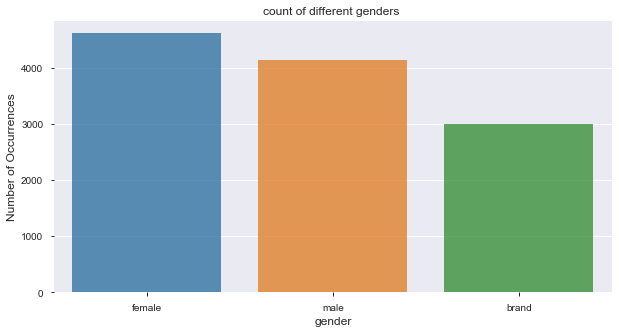

In [1101]:
gender_count  = df2['gender'].value_counts()
gender_count = gender_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(gender_count.index, gender_count.values, alpha=0.8)
plt.title('count of different genders ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.show()

In [1102]:
df3 = df2

In [1103]:
df3.shape

(11746, 7)

In [1104]:
df3.gender.value_counts()

female    4606
male      4138
brand     3002
Name: gender, dtype: int64

In [1105]:
def clean(x):
    x = x.lower()
    x = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', x, flags=re.MULTILINE)
#     print(x)
    x = re.sub(r'[^a-zA-Z]', ' ', x, flags=re.MULTILINE)    
#     print(x)
    return x    

In [1106]:
df3['description'] = df3['description'].apply(lambda x: clean(x))
# df3.description.apply(lambda txt: ''.join(TextBlob(txt).correct()))

In [1107]:
clean_description = []
for i in range(df3.shape[0]):
    text_message = df3['description'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and word not in list("abcdefghijklmnopqrstuvwxyz"):
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_description.append(clean_text)
    
len(clean_description)


11746

In [1108]:
df3['clean_description'] = clean_description

In [1109]:
df3['text'] = df3['text'].apply(lambda x : clean(x))
# df3.text.apply(lambda txt: ''.join(TextBlob(txt).correct()))

In [1110]:
clean_text_ = []
for i in range(df3.shape[0]):
    text_message = df3['text'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and word not in list("abcdefghijklmnopqrstuvwxyz"):
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_text_.append(clean_text)
    
len(clean_text_)


11746

In [1111]:
df3['clean_text'] = clean_text_

In [1112]:
df3[['description','clean_description','text','clean_text']]

,description,clean_description,text,clean_text
0,i sing my own rhythm,sing rhythm,robbie e responds to critics after win against...,robbie responds critic win eddie edward worldt...
1,i m the author of novels filled with family dr...,author novel filled family drama romance,it felt like they were my friends and i was li...,felt like friend living story retired ian
3,mobile guy ers shazam google kleiner pe...,mobile guy er shazam google kleiner perkins ya...,hi jordanspieth looking at the url do you...,jordanspieth looking url use ifttt typically s...
4,ricky wilson the best frontman kaiser chiefs t...,ricky wilson best frontman kaiser chief best b...,watching neighbours on sky catching up with t...,watching neighbour sky catching neighbs xxx xxx
5,you don t know me,know,ive seen people on the train with lamps chair...,ive seen people train lamp chair tv etc
...,...,...,...,...
19994,let your faith be bigger than your fear i am s...,let faith bigger fear second,nothing like slipping at school running to you...,nothing like slipping school running car getti...
19995,xxi,xxi,seriously love trent and justin would do anyt...,seriously love trent justin would anything dude
19996,money in the making take it a day at a t...,money making take day time july coleworld,one person can look at you like your the most ...,one person look like beautiful thing inside ne...
19997,i can quote insert movie better than you and...,quote insert movie better friend,these wedding photobombs made the bride and...,wedding photobombs made bride groom day much b...


In [1113]:
df_men = df3[df3['gender'] == "male"]

In [1114]:
# from autocorrect import Speller

In [1115]:
# spell = Speller(lang='en')

In [1116]:
#NUMBER OF TYPING MISTAKES FOR MENS IN THERE TWEETS

In [1117]:
correct_desc_men = []
count_typos_men_desc = 0
for sentence in df_men['clean_description']:
    string = ""
    for word in sentence.split(' '):
        suggestions = sym_spell.lookup_compound(word, max_edit_distance=2)
        for suggestion in suggestions:
            if(word != str(suggestion).split(',')[0]):
                print(word + " : " + str(suggestion).split(',')[0])
                string += " " + str(suggestion).split(',')[0]
                count_typos_men_desc+=1    
            else :
                string += " " + word
    correct_desc_men.append(string)

        

er or
shazam sham
kleiner cleaner
airtouch air touch
gsb gab
uva una
aspergian asper ian
bsc csc
coys toys
asmsg ass
smooty smooth
alot a lot
patsnation pats nation
suprememeninist supreme leninist
alwaysturnt always turn
ebk elk
otr or
kno no
wea we a
ent end
militante militant
obrero oberon
sueos sues
revolucionarios revolutionaries
desde de de
toda to a
chavista cha vista
coraz coral
comandante com andante
vives gives
pre are
abulala bulla
mwalimu malibu
anayeienzi any rienzi
kazi nazi
yake make
mwalimu malibu
kiswahili swahili
krothedj frothed
gmail email
instagram inst gram
djkro duro
warholian warhol an
obsessor obsess or
allsceneeye all enemy
larecord la record
instagram inst gram
scottryan scott ryan
abphotography a photography
gmail email
insta inst
teamchrist team christ
globalintegrity global integrity
opengovhub open hub
hoodlyfe hood life
sportsblog sports blog
ustadium stadium
fau fax
conceptor concept or
xbac back
dev de
neutralite neutrality
opensource open source
medal

tuxedoed tuxedo
csu csc
blm blk
nott not
notts notes
ccc acc
instagram inst gram
newarkoutlaw newark outlaw
unoh not
ceo co
funaab punjab
oba obj
ayo ago
nfrpodcast of podcast
nwr nor
halipass hal pass
forshovelry for lovely
darealmerwan dream erwin
akumal animal
twitterfeed twitter feed
autotweet auto tweet
flickr flick
html home
mcgarrah mega rah
jessee jesse
ceo co
funaab punjab
oba obj
ayo ago
mcdonagh mcdonald
donnchadh don chad
mushrumps mush rumps
jointress join tress
twitterfeed twitter feed
autotweet auto tweet
flickr flick
html home
dbe be
demi demo
pll all
pra pro
frente free
outras out as
decepes dec pes
viro virgo
forcabarca for barca
jetsmarter jet smarter
taijiquan tajik an
homebrewing home brewing
bbq bbl
mentat mental
entp into
shih ship
tzu thu
motorsports motor sports
vix via
hyan ryan
rudson hudson
fergalicious fer malicious
greggs gregg
rifthq fifth
rezvolt revolt
insightt insight
psn pin
revoltpls revolts
rickyjaybooking ricky booking
gmail email
rickyjarman ricky

yorkshireman yorkshire an
le be
instagram inst gram
seo see
tomintoul tom toul
snapchat snap chat
begey bogey
nicoleaimeep nicole aimee
ceo co
pixelroaddesign pixels design
sejournal a journal
evcol ecol
okai okay
odie die
pogonophile pogo while
sixof six of
champyon champion
dramaturg dramaturgy
nateblock nat block
le be
dev de
danstar daystar
evcol ecol
okai okay
odie die
rescitall recital
lcid acid
lrc arc
bestfitmusic best music
imdb id
bunheads bun heads
almightyso almighty so
harker parker
tokusatsu to matsu
det get
srt set
insur insure
confis con is
angrybirder angry birder
conservatarian conservator ian
roos room
noboston no boston
nyc nyx
snapchat snap chat
thechope the hope
bts its
twt two
lakers lakes
bushid bushido
seo see
pulsenetwork pulse network
mundus fundus
pree free
vid did
fmoig among
therichfoundation thermic foundation
rts its
tedx ted
aspennewvoice aspen voice
youtuber youtube
freshspeakers fresh speakers
ryerson rye son
knickstape kicks tape
seahawks sea hawks
r

rolltide roll tide
neuro euro
eterno sterno
protecttranslives protector lives
instagram inst gram
corewhen core when
mavs maps
redsox reason
instagram inst gram
hustleflexbrook hustler brook
phd pad
ryerson rye son
whnbm whom
cmmnsm comes a
ceo co
yurpgang your gang
atl at
wellimupnow well now
mixtape mix tape
neverchange never change
cip zip
nooniec nookie
orangerenegaes orange renegades
cosplayer co player
schalke scale
mymmag my mag
onthebox month box
ukcomedynews comedy news
asshole ass hole
yogger logger
pgp pop
bme be
ppl pal
delevingne deleting a
anushka babushka
sharma dharma
hattrickhumzah patrick huzzah
tumblr tumble
talmeezy tales by
ripcoachfry rico archery
ljmu lamp
stm st
pvris paris
bmth both
asoiaf as if
lotr lot
mufc muff
shapeshift shape shift
drumline drumlin
curency currency
beind being
enhlishand english and
dont done
uconn conn
spellman spell an
iradio radio
spartannation spartan nation
prayforthom prayer them
mrricks tricks
babyyyy baby by
coartata cantata
scient

catchin catch in
dont done
swisha swish
splitta split a
boogsbeatclub boogie club
mtsu matsu
baewondanillo beyond vanilla
psn pin
dnt int
ceo co
royaldna royal a
structuralengineer structural engineer
bbn bin
lakersnation lake station
ravensnation ravens nation
followbck follow back
bicycler bicycle
nutrageus outrageous
lebron hebron
realnigga real nigga
militarydreams military dreams
americanmuscle american muscle
cnfrmusic inf music
nsukeffi nuke i
stayblessed stay blessed
staystrong stay strong
hyfr her
djromil duro mil
gmail email
dont done
nfl nil
aint int
dbe be
aastatechamp state champ
nighthawknation nighthawk nation
ccu ecu
potentpeople potent people
basi basic
illinination illumination
sgfg song
fashionisto fashionista
onika on a
instagram inst gram
bensebrex sense rex
clairasbridge claire bridge
instagram inst gram
marschampion mar champion
libertyprintuk liberty into
oti otis
cendemtech cede tech
franken frankel
retweets retreats
retweets retreats
xlcrd lord
dev de
wordpres

studiocasual studio casual
dnt int
gon on
tweeting sweeting
oncedoubted once doubted
iamdejikamson camden samson
qpr apr
fatbastard fat bastard
donce once
ppc pc
seo see
analytics analytic
aholic catholic
yr or
insta inst
jvjr over
tweeting sweeting
francoisgoube francois tube
ceo co
cogniteev cognitive
oncrawl on crawl
docidohq doc doh
ipo ipod
nolimitations no limitations
instagram inst gram
bearelli bearer i
avi ave
unacquirable una suitable
robindra rob indra
mohar molar
letsdothis lets this
kabitch kab itch
yoouukno you no
truthretold truth retold
tweeting sweeting
francoisgoube francois tube
ceo co
cogniteev cognitive
oncrawl on crawl
docidohq doc doh
brunswicker brunswick
pressa press a
pusha push a
phanda panda
thato that
smal small
tweepsunite twee suite
ndawo idaho
yethu yet he
allinpirates all pirates
oncealways once always
trendwatcher trend watcher
linkedin linked in
molloy molly
bama mama
xbox box
bxl bel
timetochange time change
unprofessionalismfuture professionalism fu

gmail email
tajonia tania
usa us a
lol low
woai woad
klup up
intrested interested
troye troy
phildanlayout hilda layout
aholic catholic
socialmedia social media
lifttoinspire lift inspire
nfl nil
endeavourpress endeavour press
bbc bic
bbc bic
sairbeen said been
globalnewsbeat global seat
bbcmonitoring by monitoring
stadiumred stadium red
modernvice modern ice
fitocracy autocracy
makeagif make if
knicks kicks
snapchat snap chat
itstroyo its roy
mufc muff
plumas plums
gtamtv game a
bestfriend best friend
kaydens kay ens
speedrunner speed runner
splatoon platoon
distopian dystopian
powerlifter power lifter
okc orc
ehren efren
teambarcelona team barcelona
okbye okay
mktg mtg
podcaster pod caster
aucd a cd
rts its
ceo co
coldwarent cold agent
shadowe shadow
tmo to
nexxlegacy new legacy
shadowe shadow
teamcoldwar team war
roguegang rogue gang
teamscorpio team scorpio
bmb bob
esports sports
socialmedia social media
tourneylocator tourney locator
brownbattalion brown battalion
le be
stcustoms 

nostalgist nostalgia
crowdfunding crowd funding
indiegogo indie go
asshole ass hole
dxpressedgee expressed gee
turbyfill turn fill
dmd did
mondrea montreal
instagram inst gram
yungashington you washington
snapchat snap chat
raghibnrahman rage brahman
olihardesty of hardest
rhminime rimini me
ordinator coordinator
princestrust prince trust
bbcradiolincs bacardi links
chicagobulls chicago bulls
crawley crowley
ctfc etc
psn pin
rtyd read
kingd king
instagram inst gram
kingd king
xbl dbl
rtyd read
kassier easier
bij big
grootste root ste
kruidenier cru denier
tutoyeer tut oyer
mijn min
vrienden friended
ongeacht on each
leeftijd lee tied
nadal naval
verdasco vedas co
ferrer ferret
dani dan
alves valves
simeone someone
thfc the
mba mia
hubspot hub spot
inboundmarketing inbound marketing
uga una
dawg dawn
salcombe sal combe
crossfit cross it
shmuley shirley
jeddah jed dah
wsu usu
psn pin
kyrosin tyrosine
safenotesmusic safety emusic
friending fri ending
tweeting sweeting
retweeting retreatin

endoresment endorsement
converseon conversion
lfc lac
walney valley
sourcer source
bateman batman
dundonian undo ian
davidb david
na a
dmcfadden mcfadden
gmail email
lalosboxing halo boxing
instagram inst gram
ceidotorg reid store
le be
irl girl
gertie bertie
favorite favourite
djent dent
thall shall
musictionblog music blog
shak shaw
shaq shaw
lakers lakes
kansa kansas
univeristy university
instagram inst gram
hinojosaomar minor samar
tumblr tumble
theassylumboy thess lumber
twizard wizard
htgawm a team
thang than
riptroyandla intro handle
commercialofficer commercial officer
kinglj kingly
fatgawg fat aug
hennygawd henry gawd
finessegawd finesse gawd
exdreamseller extra seller
fidelcashflow fidel cashflow
couchpotato couch potato
whovian who ian
emt est
flavored favored
jaydenfinesse jade finesse
hamlett hamlet
osd old
opsupplydrop supply drop
wargaming war gaming
dougie doggie
opinionpod opinion pod
socialmedia social media
socialinktweets social streets
poolplayer pool player
gluten

brianonaissy brian nasty
ynwa in a
zencommuter zen commuter
ullu lulu
pata data
nerdistdotcom nerds dotcom
thenerdmachine their machine
favorite favourite
wolfpopnetwork wolf network
luv lug
le be
gbbo gobo
esurient resurgent
kinnara kin nara
goodreadsauthor goodies author
dodd odd
codaagency cod agency
locketartists locke artists
choppas chop as
aint int
snapchat snap chat
arsenalfc arsenal
beyonc beyond
suarts starts
brum drum
sheff shelf
ldn len
tgod god
handshaker handshake
crpg crag
loreswornorder forest reorder
gi i
freeguwop free wop
futurehive future hive
jaried varied
genysis genesis
bh by
martinsburg martins burg
pierse pierre
jossi joss
remi semi
grandkids grand kids
dont done
ammetter ammeter
adoro adore
particolare particular
murabb mural
silsila silica
amadiyya acadia a
jmia mia
amadiyya acadia a
islm islam
verdean verde an
plurgesquad plug squad
dery very
instagram inst gram
fernie ernie
mla la
interlake interlaken
wmspt west
jgerardi gerard
sungazette sun gazette
sageon

usain us in
cso so
trifacta trifecta
johnnel johnny
quon quot
kal al
noms nos
shxvs shows
ruga rugs
manny many
godmoneyfam god newham
infographics info graphics
wordpress word press
ecommerce commerce
gon on
janoskians jan skins
shortpant short ant
nenshi news i
pnpcbc in pc
cdnpoli cannoli
tfwp twp
ridemewilfred ride wilfred
whatsapp what app
bruh brush
blackelitism black elitism
awkwordnwords awkward words
pizzagawd pizza gawd
snapchat snap chat
neild neil
juniorucjunior junior junior
gmail email
pra pro
caralho carlo
blessington blessing on
mcdonalds mcdonald
theyre they re
pnw pow
instagram inst gram
chamlett cha lett
swagg swag
ovo ono
instagram inst gram
kicksndcurls kicks curls
chowan chow an
acbj act
concordia concord a
phd pad
khunion a union
onerichnigga one nigga
flowin flow in
gifs gift
fotieshops loti shops
calum calm
devmusicsj de musics
gmail email
er or
aint int
treet street
runnas run as
fightlife nightlife
msu mus
entrepeneur entrepreneur
umaxitfootball maxi football


grandslam grand slam
gingervitis gingivitis
mde me
zayn zany
bieber bibber
ariana mariana
hokies homies
kylebusch kyle busch
grampies gram pies
ffc fac
romford rom ford
asuka asoka
snapchat snap chat
doran dora
bigtimeltd big timely
wiv win
ammer amber
gon on
el al
nygiants giants
strawhathive straw archive
starpower star power
musicnerd music nerd
sportsfreak sports freak
animegeek anime geek
rarepisces rare pisces
teamofme team me
costanza co stanza
tottenham gotten am
snapchat snap chat
lewisxiv lewis xiv
shopheirlooms shop heirlooms
knicksinjune kicks june
phinsup phi sup
cst cost
smin skin
smee see
insta inst
snapchat snap chat
gooner sooner
thoseeeee those see
mfc mac
ceo co
viewfoo view foo
inlandlight inland light
gosforth go forth
musicbut music but
lcfc life
maranatha maratha
modere modern
fulham durham
ghs gas
seahawk sea hawk
mariota mario a
fuckcancer fuck cancer
livetweeter live tweeter
avoca avo a
tbh tbs
youtuber youtube
nnid enid
untamedcookie untamed cookie
instagram 

In [1118]:
print("typos in mens description",count_typos_men_desc)

typos in mens description 6122


In [1119]:
correct_text_men = []
count_typos_men_text = 0
for sentence in df_men['clean_text']:
    string = ""
    for word in sentence.split(' '):
        suggestions = sym_spell.lookup_compound(word, max_edit_distance=2)
        for suggestion in suggestions:
            if(word != str(suggestion).split(',')[0]):
                print(word + " : " + str(suggestion).split(',')[0])
                string += " " + str(suggestion).split(',')[0]
                count_typos_men_text+=1    
            else :
                string += " " + word
    correct_text_men.append(string)

        

jordanspieth jordan piety
url urls
ifttt if tit
pgatour gator
coolyazzy cool jazzy
retweet re tweet
le be
haha hama
yall all
lmfaoo life of
everymancinema everyman cinema
oxted opted
sidiedey side dey
magick magic
alot a lot
theriddler the riddler
cnn can
kbonimtetezi ebonite teri
mheshimiwa mesh iowa
lubao cuba
greenville grenville
yall all
holla holly
andyrobsontips andros tips
komodo kosovo
tweeted tweeter
hakeem harlem
nlt not
boii boil
wafflw waffle
lol low
rosalindeyben rosalind ben
lov love
rzworldwide a worldwide
mixtape mix tape
reimagining re imagining
webdesign web design
invisionapp invasion app
weakkkkk weak kkt
tbh tbs
thats that
paulmgardner paul gardner
cwellssun well sun
mom mon
elli ellis
brocker broker
lmfao lao
unfollower a follower
barbe babe
bentorkington be tarkington
nzinlandrevenue finland revenue
kiwisaver kiwi saver
spittin spitting
tyga toga
kuwtk kurt
ruffin muffin
dani dan
bluewater blue water
bluewater blue water
nytimesarts anytime arts
nyc nyx
nothin no

taxcredits tax credits
aarondmiller aaron miller
actforisrael actor israel
sha she
odaaa data
ffs offs
btilley billy
kevinhoctor kevin doctor
dont done
isnt int
chrisklemens chris lumens
rabiu rabid
kwakwanso wake also
ffk of
femi semi
fani fan
kayode kayo de
nickiminaj in criminal
ssd sad
bos box
rnd and
facup fac up
comeonyouhawks company hawks
airingnins airing in
kosdff kos of
thats that
mvp map
nytimes times
dmd did
sirisena sir send
karimaislam karma islam
naz nav
nandos nan dos
wpknradio wok radio
seavla sea la
avestal vestal
lol low
taxcredits tax credits
ffs offs
bulldogwx bulldogs
timbrando tim brando
mercykandie mercy indie
cradley bradley
conorgen con gen
niv nov
laurendougan lauren organ
gon on
iamkarma a karma
bieber bibber
gon on
trfc try
whitehawk white hawk
michaelwilson michael wilson
ngannou again of
repost report
ufc pfc
ufcorlando of orlando
orlandosucks orlando sucks
transitfail transit fail
latchingonto latching onto
anotherfanatic another fanatic
safc safe
safc 

tnlead to lead
techat tech at
gafe game
skrillzzz skill zzz
amkfoote am foot
krystcnritter keys critter
hunterryyyd hunter yard
superherofeed superhero feed
jareds jared
udmary summary
artisticzayn artistic an
cri fri
preetamjinka free tamika
trackpad track pad
gatto gat to
mr or
larrrrry larger by
amfoxsports ammo sports
gon on
espn esp
reusse reuse
mom mon
flava lava
acabo a cab
ver over
episodio episodic
weasone we sone
rudumbblad dumb bad
whitegenocide white genocide
hahaha hah aha
colingpaterson colin paterson
mdoness madness
brockhampton rockhampton
carnsightcam cards gotham
alternativeandcomplimentary alternative complimentary
repost report
lifefitness life fitness
ftod food
igetcha gotcha
bodyright body right
odeoncinemas odeon cinemas
newadult new adult
iartg part
snrtg sort
officialfame official fame
afcb act
sev see
jonnym johnny
baldockboro block born
alkmin al min
wishdomwishdom wish wisdom
le be
murdery murder
queenshella queens ella
snapchat snap chat
nowplaying now play

galighieri alighieri
imperialoppres imperial pres
bamf barf
adammc adamic
lol low
behzinga behring
malala malaga
yousafzai you safari
dolphineret dolphin ret
fuckin fuck in
shitbum shit bum
tctedchat acted chat
moviehouseni movies use
imax max
regalmovies regal movies
zeiler seller
whiskey whisky
lennox lennon
ryanstegman ryan man
bostonravenfans boston vegans
russellstreport russell report
bobpockrass bob crass
fuckery fuckers
essjayarr essay arr
haha hama
youd you
frankpallotta frank allotted
couldnt couldn't
tomfcknbrady topic brady
dolphineret dolphin ret
gronk grok
mdahmus mad mus
byob bob
wonka won a
portugalcoup portugal coup
notacoup not coup
benfica benita
golic folic
cecillammey cecilia my
brookebcnn brooke can
hargrove mangrove
markmasai mar masai
ntvkenya it kenya
presspass press ass
mayalineyoussef magazine yourself
suree sure
besttt best to
xxl xxx
valharperr val harper
samami salami
youve you be
fek few
weeknd weekend
kfo of
rjal real
mshdshd used she
glbe globe
walla wa

timleunig time big
robhicks rob hicks
wsr war
naaaaaah nara aah
queenmachine queen machine
dunkys dunks
mastaredsnappa mature snappy
anals anal
mjcentral a central
cannabisseminar cannabis seminar
steelers sellers
boykin bodkin
nba aba
nflfilms of films
nflnetwork of network
madeamends made amends
kingofhookah king hookah
idk id
bs is
meacher teacher
taxcuts tax cuts
soylentsolvent solent solvent
bigdogwdae big grade
sardar sirdar
biglari big lari
obtaine obtained
xac mac
jillerbeez miller been
itunestv itunes
sophieejn sophie in
gunna gonna
mapbox map box
shizz whizz
kyebillyion by billion
wim him
heever he ever
applebees apple bees
akanshagautam awash gautama
booksthatmatter books matter
wearealive wear alive
ramfrancisuk ram francisco
gordy goody
pls plus
cfbmatrix of matrix
offense offence
offense offence
leonwobyp leone by
adhoc doc
voddy noddy
lemo demo
bmanbushur man bush
khneurophysio knew physio
saeboukglyn sabot glen
johnsbowden john bowen
sarahftyson sarah tyson
clariqua cla

vinod vino
khosla hosea
pre are
clt cut
paulmwatson paul watson
nuski nus i
turnt turn
ffs offs
someting something
xbloodxtitanx blood titans
gmgm gym
fingerscrossed fingers crossed
kupkakke up are
mirlagerfield mirage field
panachecycle panache cycle
oakleybike oakley bike
meetcoppola meet coppola
mb my
alexispanenka alexis agenda
denegris den gris
lol low
nicklavato nicolas to
bieber bibber
preordered reordered
dpsnewsnow done snow
aurorak aurora
ccsdk cask
dontmissit don misfit
thesimpledollar thesis dollar
le be
dooda doodad
goin go in
dbc dec
tfsa of a
pooley poole
covtel co tel
ccfc acc
theyre they re
theyll they'll
hmrc here
rheannonpratt rhiannon pratt
ahahahaha shah alpha
fakebookcovers facebook covers
rhymeswithright rhymes right
sicarioyogib safari yogi
politibunny polit bunny
jeffersonianguy jeffersonian guy
kasich basic
lookin look in
soa so a
theblacklist the blacklist
wunderbar wonderbra
kendalllangford kendall longford
robertmathis robert mathis
didnt didst
bibleplaces 

reimerfan regime fan
adeuce deuce
whl who
ohl oil
lsjustice a justice
ptl pal
buteravoid bute avoid
bby by
ilyt it
underate underage
sleepydjh sleepy duh
obv obj
mcjuggernuggets mugger nuggets
walkingdead walking dead
amc am
unfollow a follow
ppl pal
gidi midi
coolkidsmustfall cookies outfall
omgamberi of amber
simeenanawaz simeon anyway
godfadr go far
le be
bobmarley bob marley
stopjoetrippi stop trippe
travelexpert travel expert
fblikehour like hour
hahaha hah aha
deh de
bos box
lol low
klutch clutch
msg mag
artwe artie
nin in
rjramirez ramirez
affinitylife affinity life
lynder lender
omg org
athmosphere atmosphere
whoiskillingme this killing
oliverbcampbell oliver campbell
rafa rama
happydays happy days
diouf diff
bouremouth bournemouth
bucs bus
tbbuccaneers buccaneers
jasonrlicht jason light
onteriom ontario
onterio ontario
mcalebb caleb
lil oil
justinbieber justin weber
artistoftheyear artist thereat
favorite favourite
thescreenfix their bendix
legobutts leg butts
jetlagged jet la

einherion either on
syngas syn gas
irp rip
matttopolski matter polk
wwe we
le be
schwab schwa
itrnella citronella
cllrjonhawkes clarion hawks
mserika erika
manouver vancouver
rhyminsimongr rhyming among
thbday the day
kaehler keller
talkradio talk radio
fuckboi fuck of
holycrapitsrob polycarp throb
tpm pm
btw bow
cashout cash out
gclark clark
wrs was
bluebellbw bluebell
fehowarth how art
nighter fighter
hiac hic
scttpilgrim set pilgrim
ive live
tumblr tumble
pinterest interest
instagram inst gram
nda ada
dont done
dolphineret dolphin ret
gon on
umair email
sarfeastcaff area staff
afellay fella
retweet re tweet
retweets retreats
notifs notify
beyonc beyond
nickiminaj in criminal
forex fore
vsd esd
timeframes time frames
forex fore
alexdavis alex davis
samgreenx sam green
skegness skewness
lfc lac
bogdan bog dan
ibe i be
cnet net
wallahi wallah
earthquakeinpakistan earthquake pakistan
weirded weirder
soulja soul a
boro born
happydays happy days
mcconaughey macon they
lol low
deeeeeecent 

cantanzaro catanzaro
katexxy kate by
twd two
mirah mira
riben risen
priscillastones priscilla tones
adoptauthor adopt author
astridbeemom astride mon
jongin jon gin
dickaroo dick roo
guestlist guest list
gon on
ncixdotcom sci dotcom
jimcramer jim racer
ratex rate
ibminsight in insight
ibminsight in insight
ibmsystems in systems
reggiesbr reggie by
mbestommy be tommy
tsung sung
kool tool
lmfaooooo lao good
onedirection one direction
greatful grateful
thanksonedirection thanks redirection
gon on
wahlberg arlberg
danielvankirk daniel kirk
callum callus
gribbin ribbon
gorkle google
bos box
youre you re
shouldnt shouldn't
isnt int
bos box
dont done
beardynoise beard noise
brunhofer fraunhofer
tombraider tomb raider
tombraider tomb raider
twitchsharing twitch sharing
mamacita amanita
canyouflybobby canyon bobby
greenclouds green clouds
owolade two lade
retweeted retreated
corley corey
jillcorley jill corey
metalheadz metalheads
gon on
followin follow in
wtf whf
unfollowed followed
leaaaahtop

stvgrant st grant
spfl sell
daftlimmy daft jimmy
tonytidbits ton titbits
personhood person hood
ieeevis i elvis
leibatt lei batt
btw bow
dailydouble daily double
footysupertips footy parties
thatslvni that lvi
gon on
alexrosincth alert since
fns fans
hahaha hah aha
jaymaine jay maine
instagram inst gram
krissstyn kristy a
cartercruise carter cruise
macklemore mackle more
syriacrisis syria crisis
cpc pc
cdnpoli cannoli
apalling appalling
policeinterceptors police interceptors
favorite favourite
wsu usu
teenwolfseason teen season
teenwolf teen wolf
mcm mem
wordsmiff words miff
bbq bbl
silviacs silvia
malcom malcolm
saied said
rondaehj ronda he
rahlir rah lir
mom mon
ferrante terrance
momma mommy
rogeroneill roger neil
tmac mac
beal real
nene none
lmao lao
hisself his self
hacob jacob
jakehale jake ale
meacher teacher
holis holds
skynews sky news
bbcnews by news
priceonomics price comics
growthhacking growth hacking
oxirb oxide
lmaooo magoo
fleek fleet
finessegod finesse god
andyfitzpaddy

supralugia supra lucia
donaldglover donald lover
tweeted tweeter
jenerin generic
planetradiotv planet radio
planetpower planet power
mystikal mystical
phyno phone
himym him a
rewatch rematch
favorite favourite
surrugate surrogate
oliviaeleni olivia lens
tbh tbs
lovie love
le be
eastenders fasteners
zakmcc a mac
avi ave
het he
ghostbusters ghost busters
brownhillsbob brown lisbon
njhag jag
pontis pontus
telecom telecoms
flapol fla pol
cotto cotton
cotto cotton
gon on
canelo panel
gon on
futurecom future com
joshtweeterson josh peterson
johnbishop john bishop
lucyhinton lucy hinton
ppl pal
dont done
bambrewer a brewer
hgredmond redmond
lol low
lol low
xavierleon xavier leon
wtf whf
thinksally think sally
krismmmrobb kris rob
cooky cook
carbazzare carbon are
ashleymadison ashley madison
farhm farm
cavs cars
celticfc celtic
nesbitt be bitt
pettine petting
cherrysparkler cherry sparkler
sammye sammy
lol low
slackin slacking
instagram inst gram
celticfc celtic
nesbitt be bitt
breslin berlin


In [1120]:
print("typos in clean text of mens",count_typos_men_text)

typos in clean text of mens 5203


In [1121]:
df_female = df3[df3['gender'] == "female"]

In [1122]:
correct_desc_female = []
count_typos_female_desc = 0
for sentence in df_female['clean_description']:
    string = ""
    for word in sentence.split(' '):
        suggestions = sym_spell.lookup_compound(word, max_edit_distance=2)
        for suggestion in suggestions:
            if(word != str(suggestion).split(',')[0]):
                print(word + " : " + str(suggestion).split(',')[0])
                string += " " + str(suggestion).split(',')[0]
                count_typos_female_desc+=1    
            else :
                string += " " + word
    correct_desc_female.append(string)

        

frontman front man
xxxx xxx
xxxxxxx xxx xxx
pll all
mcd cd
bae be
haribo mario
jmkm jim
mache cache
xxxx xxx
mom mon
dm do
classof class of
goodmorning good morning
retweeet ret meet
fav fax
spoopytaylor scoop taylor
ouat out
oitnb oink
underserved undeserved
isu is
ventas vents
digitales digitalis
ibm ism
espaa esp a
toda to a
mi i
opiniones opinions
personales personals
todos to dos
colores dolores
tambin tam bin
puedes guides
contactarme contact me
videodirector video director
expy exp
omg org
avi ave
barnqueenacc banquet acc
wellbeing well being
creolemixed creole mixed
borninneworleans morning orleans
raisedintexas raised texas
louanne luanne
bieber bibber
cqnow a now
medill medial
retweets retreats
iqmediacorp in mediator
nsfwstory psf story
bafhouse a house
badass bad ass
feminie feminine
hempress empress
finna fiona
vancini mancini
insta inst
brownlouise brown louise
kredo redo
jle joe
uomo homo
disposto disposal
correre corr ere
qualche qua che
rischio richie
idee idea
idee id

jessiej jessie
youtuber youtube
insta inst
kassieeelynn massive lynn
finnnnhudson finn hudson
msrachelberryyy rachel berry
bae be
msleeeamichele sleep michele
rachberry raspberry
nba aba
tima time
princessa princess
tima time
tupac topic
nasir nair
buggie buggies
emcdesignltd etc designed
lovejapanmag love panama
bbc bic
anthologist anthologies
pgp pop
aem am
snapchat snap chat
sianfreya sian freya
reweets repeats
xoxo too
fmoig among
llennod lennon
restinpeace rest peace
onlyd only
addme add me
kaycash kay cash
youtuber youtube
tsm tom
fnc inc
fangirl fan girl
fangirl fan girl
psn pin
pixelpolaroid pixel polaroid
fhs fps
juicyshaye juicy have
crazybitch crazy bitch
teamlola team lola
tbr tar
sunnies bunnies
amo am
mendeserts me deserts
mendeserts me deserts
snapchat snap chat
thyvixen thy vixen
tumii tum i
mom mon
couponer coupons
lexi levi
advocatestate advocate state
redwolves re wolves
musiclover music lover
onedirection one direction
sdu stu
fassie cassie
favv fave
heatherfyfe hea

cruisetransfer cruise transfer
lownie lonnie
harboring harbouring
jovi jodi
whiskybrum whisky rum
snapchat snap chat
lelynstewart lely stewart
bbc bic
grandparenthood grand parenthood
donghae don hae
hyukjae yuk a
sjbbgot sub got
exo exp
nakedsuju naked usu
madamenoire madame fire
instagram inst gram
hitta hit a
juvederm used term
nh no
ryanrocca ryan coca
specilist specialist
iwill i will
diejesus dejesus
gsa gas
bbn bin
teamrousey team rouse
tropiezas tropic as
realidad real dad
corres torres
tras trans
sueo sue
instagram inst gram
mafferodrii gaffe rodrigo
futura future
actriz a trip
cineasta cineaste
starwars star wars
andrewlincoln andrew lincoln
normanreedus norman reeds
gregnicotero green cover
twdfamily to family
lincolnlovers lincoln lovers
robertkirkman robert kirkman
twd two
diy day
mom mon
asshole ass hole
ceo co
ballin ball in
thapelo chapel
kingbae king a
tshwagong the along
naso nash
lelo leo
mom mon
crafter crafted
mcfc mac
pre are
voxmag to mag
mikomikosie mike rosie
s

davidauryn david urn
jdb job
hubspot hub spot
mom mon
aejmc sejm
usc us
childrenschance children chance
papasan papas an
kanye kane
kanye kane
kanye kane
zweliq zweig
swiftie swift
whovian who ian
potterhead potter head
twd two
le be
mi i
yor for
anyw any
ss is
terree terrie
rola role
esmarlyne email one
mylivegirl live girl
heyeditor he editor
berkmancenter bergman enter
conroe monroe
conroe monroe
sayin say in
nothin not in
technologyenthusiast technology enthusiast
hairnaturalist hair naturalist
naturephotographer nature photographer
commercialmodel commercial model
indoormusician indoor musician
gga gag
dioplaflare dipl flare
ncat cat
loflow of low
mom mon
brownskin browns in
vlogger blogger
perthes perches
jfk of
wearealwaysone cereal wayne
tbr tar
skiier skier
dai day
dai day
numin cumin
csu csc
westerndove western dove
scrapbooking scrap booking
shhhhhh shah he
gmail email
ftlornb of torn
jackthriller jack thriller
actresshostauthor actress author
wps was
desperatly desperately


riojana rio ana
sangre sanger
andaluza andalusia
liv live
luv lug
insta inst
lynseykabat lenses karat
northridge north ridge
aint int
virgonation virgo nation
freespirit free spirit
gsu gnu
thacia thalia
dif if
cil oil
larrie carrie
beyhive beehive
mmhkay mckay
jacari acari
shii ship
ima i a
yall all
pyramidfumes pyramid fumes
obeythepump beth pump
semper temper
meliora melissa
traveler traveller
eustace estate
collered collared
favorited favor ted
replyed replied
yammy sammy
favorited favor ted
replyed replied
replyed replied
favorited favor ted
seapeekay seabee kay
favorited favor ted
replyed replied
vengelfe angel be
faved saved
httweets a streets
missmalini miss alibi
bollyspice boll spice
beautifful beautiful
naturalhair natural air
clt cut
animalifeuk animal feud
winnin win in
langstaff lang staff
flaneur flan eur
magicalthinker magical thinker
queenofambiguity queen ambiguity
allgoodcopy all copy
insta inst
kaaitsxo kits to
directioner directions
vamily family
sosfam sos am
tide

giriboy air boy
dianaa diana
nicholee nichole
dianaanicholee diana nichole
ponyboy pony boy
mcc mac
kayleigh rayleigh
assin ass in
futurenurse future nurse
uri fri
topchef to chef
nsm nam
le be
autres a tres
directioner directions
cooky cook
avanti a anti
souizz swizz
breeziebro breeze bro
itsathief its thief
redbullxo red bull
fuckiimits fuck limits
swhrvy swerve
scavengervii scavenger ii
amala ayala
nothingelsematters nothing matters
letsgetiton lets edition
roboticbusiness robotic business
roboticstrends robotics trends
robobusiness rob business
ce be
instagram inst gram
kenz ken
fidm film
elisewrites elise writes
goldenwheatlit golden wheatley
hugginzbyangel hugging angel
moderndaymissionary modern missionary
havedownsyndrome have syndrome
wml wal
nico nice
iwasme waste
nbc by
debramessing debra messing
dancemoms dance oms
pfieff fief
mdna mana
nomore no more
lgbtspiritday get spiritual
pnw pow
butlins but in
wwe we
tna tea
lfc lac
insta inst
snapchat snap chat
cherrysparkler cherr

ponchoirl poncho re
dailydot daily dot
ovosound of sound
mom mon
disneysmmc disney mac
inthekitchenkp the kitchen
philippian philippians
gcats cats
philfisigurdson phillis gordon
bohs boys
confey convey
blackgirlmagic black magic
baranski saransk
thegoodwife the wife
mchart chart
woodsboro woods or
ca a
knope nope
otley motley
hg he
elemelons elem long
mecfs me is
traveler traveller
gomountaineers go mountaineers
softballlife softball life
supportourtroops support troops
lifeteen life teen
snapchat snap chat
nannndi nanny i
youtuber youtube
superjayxx super xxx
gmail email
artsas art as
marieslist marie list
thema them a
magicalbum magic album
evasurga eva surge
catsociety cat society
cinpar linear
akibayellow akin yellow
retweeted retreated
vid did
estej este
ssim slim
sorriso morris
melhorr mel hour
talkradio talk radio
nyc nyx
falloutkail fallout kail
zot not
zot not
reddit geddit
ish is
singlemom single of
fishislandlabs fishes landless
fangirl fan girl
hai has
hai has
fav fax
akhs

boricua boric a
dominicana dominican
steeeeephen see stephen
ohhsara of sara
ohhhsara och sara
waage wage
traveler traveller
mom mon
olicity of city
fangirl fan girl
tenna jenna
otp top
slytherclaw slither law
intj into
veronicamars veronica mars
aogg hogg
fnl fol
tmp top
jeross across
meeemz meet a
fokus focus
kuliah julia
sophrosyne soph syne
phd pad
godfirst go first
motherofone mother one
ilovemydaughter love daughter
bieber bibber
phd pad
waid said
vergara ferrara
heyo hey
lashtongirl ashton girl
svanto santa
sianchristinak sian christina
muay may
snapchat snap chat
vwashington washington
coloradotrancefamily coloradoan family
mcdonalds mcdonald
ive live
basshead bass head
wwu you
catswithbats catsuit bats
favorite favourite
snapchat snap chat
tigyy tight
insta inst
tigmercer to mercer
uic pic
yay may
iylshow in show
jolteononcrack bolton crack
bae be
alittle a little
sas as
luvmesomeari love smear
favorite favourite
cimorelli corelli
vlogger blogger
le be
roni ron
twu two
jayjay 

michelleelizabeth michelle elizabeth
supongo sponge
nada ada
esto est
importar importer
cuando can do
tenga tonga
aos as
pero per
ahora agora
estoy estop
muy my
muna una
ghurta hurt a
onn on
duine dine
bith with
fonn font
llc lac
colombiana colombian
sbhs she
roleplayer role player
choi chi
sooyoung so young
northwich norwich
belfastgiants belfast giants
sissonville season villa
nana anna
wheelock whee lock
alaskagrown alaska grown
iditarod edit rod
theblacklist the blacklist
nealfire neal fire
figureskating figure skating
stfu stu
pamuk park
eker ever
mor for
mor for
mor for
hendisin send sin
dibi dib
ren re
anlamnda alameda
teamfollowback steamroll back
supergreen super green
nevergrowup never group
xqueenflairx queen flair
beckylasskicker becky sticker
jessieboo jessie boo
teampcb team cd
mexicana mexican
babygaga baby aga
judascross judas cross
sophmcb soph cd
alsina also a
alewis lewis
squaaad squad
meganphillipsss megan phillips
dbnb done
mcr mar
cafa cafe
wwe we
traveling travel

bibliotaph bibliog pm
westlifemusic west emusic
andersonnatalie anderson natalie
nufc nude
emmerdale emmer dale
davicia alicia
wwe we
ive live
gamedev gametes
ceo co
unpopufur unpopular
roughgaywolfsex roughly wolfe
botdfmusic both music
beautifulpeople beautiful people
otp top
kohnnie johnnie
jonnor jon nor
yr or
whovian who ian
th the
instagram inst gram
joceverright however right
laceexo lace to
federicodipaol federico paul
larping lapping
gbinaa guinea
javaholic java folic
camgirl cam girl
nsfw new
kwqc wac
abcreligion a religion
phd pad
psychonalysis psychoanalysis
aau eau
ocs oct
dont done
stseptember st september
janoskians jan skins
thseptemeber the member
faved saved
thoctober october
jai jan
thoctober october
cuffin coffin
northwesternu northwestern
columbiajourn columbia our
creps crops
ustca us a
th the
supermassive super massive
happyandpriv happy priv
phd pad
phillies phillips
taliyyaahh tally yeah
iero zero
camgirl cam girl
nsfw new
xbox box
ohhhhh of high
ainsleighgraha

crystalleddream crystal dream
dont done
uwg we
youtubes youtube
luv lug
saggitarius sagittarius
ltx ltd
chaot chat
thinktank think tank
juvederm used term
preorderpurpose reorder purpose
jadalatrice jamal trice
protg prot
mssarahpaulson sarah carlson
tweeted tweeter
asu as
crystalleddream crystal dream
luckylicia lucky lucia
ratajkowski rata ski
naijadiary nail diary
bbm bpm
gauahar galahad
rply reply
tyms gyms
tym tom
gauahar galahad
rply reply
tyms gyms
tym tom
wonderfull wonderful
gauahar galahad
kev key
rozal royal
palaypayon play avon
instagram inst gram
selenaa selena
snapchat snap chat
oooohselena good helena
txst test
wifey wife
xoxo too
alfie allie
favourited favourite
retweeted retreated
alfie allie
ari are
fangirl fan girl
otra ora
asu as
aoii a ii


In [1123]:
print("typos in female description ",count_typos_female_desc)

typos in female description  5435


In [1124]:
correct_text_female = []
count_typos_female_text = 0
for sentence in df_female['clean_text']:
    string = ""
    for word in sentence.split(' '):
        suggestions = sym_spell.lookup_compound(word, max_edit_distance=2)
        for suggestion in suggestions:
            if(word != str(suggestion).split(',')[0]):
                print(word + " : " + str(suggestion).split(',')[0])
                string += " " + str(suggestion).split(',')[0]
                count_typos_female_text+=1    
            else :
                string += " " + word
    correct_text_female.append(string)

        

neighbs nights
ive live
tv to
aphmau ahmad
mcd cd
fangirls fan girls
mcd cd
evielady evil lady
giannaaa dianna a
lmao lao
hella hello
craftyear craft year
isabelpascual isabel pascal
retweets retreats
chrisaofficial chris official
sydniejr sydney a
markhicks mark hicks
nandos nan dos
camerons cameron
wishbonecon wishbone on
ouat out
umph mph
thedjbrisk the brisk
ofamerica of america
akinator akin tor
katniss fatness
everdeen ever been
lol low
aca a a
younginvincible young invincible
ibmsocialbiz ism socialize
jennifermcclure jennifer mcclure
hchat chat
lrt art
werent we rent
affa jaffa
nbd ned
lovejoy love joy
vivienleigh vivid leigh
vivien vivian
eqanon canon
eqcompliments compliments
horseshowtutor horseshoe tutor
studioonwhitney studio whitney
dejavueq de ave
athleticeq athletic
amazingladies amazing ladies
evinelive even live
thacelebritea the celebrity
ravensymone ravens more
theybfdaily they daily
justinbieber justin weber
lol low
johnmdonnelly john donnell
cqnow a now
barcampphi

anabrendac an brenda
sixweeksleft sixteen left
hoffer offer
lexi levi
msnaiij a snail
idk id
mtv mtg
onedirection one direction
amas am as
heyuguys hey guys
tash cash
ridgeland ridge and
selfie self in
cuz cut
scudded studded
kalynmd a land
eggwhites egg whites
ontrack on track
lexx lex
dipinto dip into
anemic anaemic
alurringfel alert intel
maskhero mask hero
walgreens walgreen
pgee pee
gothdjinn goth jinn
rohan roman
acroasdell across dell
hiiii iii
tinky tiny
winky kinky
teletubby teledu by
icymi icy i
trohnam to nam
dorothyandalice dorothy alice
lbloggers bloggers
francescoyates francisco yates
bananaslipbenji bananas beni
lol low
shesahoeif shea motif
idc id
outter outer
aghhhh a high
cba cuba
lmao lao
harleighburch harley church
jace face
daddymaterial daddy material
gensplace gen place
sxsw show
siztheworld sixth world
whatsapp what app
fleetwoods fleetwood
favorite favourite
drphil phil
custodydrama custody drama
anthrbdcreation anti recreation
gidron gideon
lol low
youre you r

cruelest cruellest
abigailsgriffin abigail griffin
multishipping multi shipping
lmao lao
fuxk fuck
epona upon a
cuttingpixels cutting pixels
etsy easy
shoppershour shoppers our
sistah sister
rockin rock in
teesamone tees more
soundcloud sound cloud
agnezmo a demo
spotify notify
ive live
cxxl call
txx tax
basquaits basque its
streetphotography street photography
thebroadmuseum their museum
dtla data
shawnmendes shawn ends
torikelly tor kelly
mtvema move a
markchapman mar chapman
bbc bic
plz ply
lol low
hopeing hoping
theshlow the show
jeremymichael jeremy michael
grrrr error
shxdiao saudi to
didnt didst
hahahahah sarah shah
rlly rally
smokin smoking
ryanmccartan ryan mccarthy
fooo food
euqmandotwitter human twitter
katiembooth katie booth
astleyclarke castle clarke
jewelry jewellery
freeones free ones
bedb bed
jony sony
ive live
edibleapple edible apple
thewalkingdead thwack instead
photobombs photo bombs
lol low
rolexskydweller roles dweller
snasuage sausage
otay stay
waaay way
vons so

arenkennedy are kennedy
chloeacooper chloe cooper
vid did
sooo soon
cammiversary a anniversary
andrewtighe andrew tight
askingforafriend asking friend
stanleyarcher stanley archer
ibminsight in insight
thomasdongibm thomas nib
wwatrach a watch
analyticsfor analytic for
junaidmartin june martin
zubairdotcom dubai dotcom
gon on
itsleehinchy itself inch
leesqanda lees and
famu fame
usf us
bzabe babe
roxul royal
cibabs cigars
ideklrh idea or
ppl pal
whs was
shite site
asu as
ckin skin
lol low
beiber berber
thankyou thank you
nathansykes nathan sykes
valcaakes val makes
retweet re tweet
whitegurl white girl
tavitulle tax tulle
worrywart worry art
sprouse spouse
crankiest crank est
imalegendkiller image killer
fangirlnextdoor fair nextdoor
dooce dolce
retweet re tweet
katediamond kate diamond
lexyringnell keyring nell
suv sun
retweets retreats
favorite favourite
diy day
diy day
dayofthedead day thread
dollarstorecrafts dollars crafts
yay may
shakeology shake ology
yumyum yum yum
ochem chem
l

adventuresofejk adventures feck
knowhowtohelp knowhow help
paulangone paula gone
lol low
aldi ali
lol low
heh he
gon on
jessetyler jesse tyler
justinmikita just nikita
lexa lea
onedirection one direction
artistoftheyear artist thereat
favorite favourite
amas am as
onedirection one direction
daje date
dont done
wordbrain word brain
wordbrain word brain
omg org
ive live
unmuted united
oomf oof
maggierunkle maggie uncle
kdy key
tfifriday of friday
macklemore mackle more
slssweeps so sweeps
hahahaha a yamaha
zhao that
maddie addie
brittbass britt ass
possesedbaby possess baby
jgcope scope
kingpom kingdom
fuckyou fuck you
avi ave
bae be
goodreads good reads
bookgiveaway book giveaway
mrsiberi mrs berg
waittilyouseemy wittily seems
peachyfiend peach fiend
quoteoftheday quote they
disgruntledmom disgruntled of
stephenville stephen villa
quendrith send with
bello hello
saylor taylor
costners costner
chartwell chart well
mcm mem
highkeyh high key
traveler traveller
lalalalalalala palatal alabam

xcelice felice
layed played
yupp supp
gon on
halp help
somechappaul somewhat paul
jakeboys jake boys
lol low
dont done
aliwat ali at
ljmassaro mass are
thewalkingdead thwack instead
booooo booboo
mom mon
stellafella stella fella
jennifersnudes jennifer nudes
fuckin fuck in
ogshon olson
mozes moves
whoopi whoops
tomo too
happyhome happy home
em pm
ehs eds
decorateyourhome decorated home
lmfao lao
lovingmusic loving music
heido he do
nyc nyx
seaworld sea world
hargrove mangrove
visser kisser
abt at
gcse use
math match
shite site
shockoe shock of
whiskey whisky
lmao lao
lukemitchell luke mitchell
hoodslayberry hood bayberry
calum calm
sooo soon
soooo soon
louiselyndon louis lyndon
goddessfish goddess fish
historicalromance historical romance
crmoss cross
blac black
chynas china
polic policy
gregoire greg ire
draislv a raised
tampainthehouse campaign icehouse
easymusic easy music
gon on
aphoticdevil photic evil
allways all ways
dafneyvonne dan yvonne
gon on
zay may
decorateyourhome decorat

orsvp or up
favorite favourite
brickit brick it
loveee love a
goddccvc good acc
bos box
dreamteam dream team
onpoint on point
ilovemycaa love can
gilly billy
cooky cook
ittybitty it bitty
hallmarkuk hallmark
redrosemummy retros mummy
danibeth dan beth
dahhling dah ling
jammin jamming
erdingtonsound eddington sound
brondman bondman
rubberclowncar rubber owner
frankric franklin
cosmiccrash cosmic crash
brendatomczak brenda tomcat
jgrabietz gracie to
twd two
ppl pal
bestfriend best friend
bestfriends best friends
mymain my main
otherhalf other half
myrida myriad
ummm mem
brynnieboo brynner of
jaceylaray face larry
bpjaillite jail lite
sungjae sundae
tae the
jimin jim in
kpop pop
cisa visa
dont done
theyre they re
zaxbys tax is
zaxbys tax is
ontop on top
thewalkingdead thwack instead
raebandsssss remand swiss
nurchat our chat
agarret garret
priviliged privileged
priviliged privileged
kimaskyou mimas you
desmos demos
baconsexsleep bacon sleep
phd pad
plz ply
jetblacksami setback same
tumblr

charlieputh charlie put
omgg org
recogniseyourself recognise yourself
mannymua man yuma
grahamwp graham
mariagaidar maria aida
scutter cutter
bruh brush
ewww wow
omg org
lol low
bbc bic
mp my
imma emma
imma emma
afzal anal
jillberry jill berry
equitableed equitable
womened women a
ginge ginger
artistoftheyear artist thereat
favorite favourite
amas am as
rhoc roc
shannonbeador shannon major
baileemadison bailee madison
ladscheckups lad checkups
hella hello
jakerabegum maker begum
biiiitch iii itch
gon on
dazer daze
onedirection one direction
artistoftheyear artist thereat
pakistanearthquake pakistan earthquake
oldandrewuk old andrew
selfie self in
karlaaa karla a
ppl pal
lol low
wordbrain word brain
wordbrain word brain
mattpenndotcom matter dotcom
thebitexpert the inexpert
amystevenson am stevenson
rjinitialstate initial state
twc two
ar a
technica technical
subtweet sub tweet
coloradostateu colorado state
barfield garfield
paterosbrew paterson new
knowin know in
seein see in
lovin log

ajlounie a lounge
mssajlouni essay long
larrylouislay larry display
ilovehim love him
onedirection one direction
artistoftheyear artist thereat
favorite favourite
amas am as
onedirection one direction
asf as
ppl pal
hangin hang in
tryna try a
gon on
soupmaker soup maker
nicoletteclock nicole clock
whiteleaf white leaf
muvitmonday music monday
muvstrollers my strollers
mindyammy mindy my
ndio do
ujue use
kilaza kill a
tbay ebay
marino marine
mrsteveantony most antony
hodderchildrens holder children
lol low
fuckkkk fuck kkt
youuuu you us
mhhhhhh mph high
lyin lynn
toxicwhisper toxic whisper
amirite ami rite
ackles tackles
bruhitsdennis bruit dennis
maddie addie
jordyn jordan
creeeam cree am
stephiemca stephen a
kurbanska turbans a
nicoleandelic nicole angelic
flackpatrick flack patrick
oti otis
missguided misguided
shaylavernee shay laverne
idek idea
platt plant
imb imp
imblivestream implies team
poshmark postmark
poshmarkapp postmark app
shopmycloset shop closet
analytics analytic
ewen 

microglia micro glia
neurodegenerative near degenerative
ppl pal
marvelous marvellous
socialaddict social addict
babygirl baby girl
paigeknorr paige nor
walkability walk ability
giyom gym
lebleu lesley
gyft gift
bitcoin bit coin
gyft gift
swaggiest swag best
gurrllll girl all
chrischristie chris christie
dont done
mom mon
thang than
charleah char leah
catherineamy catherine my
niamhsturdy nam sturdy
thnx the
spotify notify
mattiefox mattie fox
passthewhiskeyx passage whisky
ifnront front
ph pm
jaxport a port
jax jan
andreia andrea
henn penn
lol low
tweeting sweeting
ameerahsmith camera smith
tariyah tar yah
theologis theologies
staystrong stay strong
timesdaily times daily
jhaywardbenzal hayward rental
yezi yeti
cao can
unprettyrapstar unpretty star
amazonvideo amazon video
redoaks re oaks
nationalpumpkinday nationalism kinda
ive live
dont done
ppl pal
cancle cancel
everydayiloveyou everyday lovey
everydayiloveyou everyday lovey
skyy sky
asf as
belleandrews bell andrews
kaitlynnyan dai

In [1125]:
print("typos in text of female",count_typos_female_text)

typos in text of female 4808


In [1126]:
correct_description = []
for sentence in df3["clean_description"]:
    suggestions = sym_spell.lookup_compound(sentence, max_edit_distance=2)
    for suggestion in suggestions:
        print("correct description: ",str(suggestion).split(',')[0])
        correct_description.append(str(suggestion).split(',')[0])


sing rhythm
author novel filled family drama romance
mobile guy or sham google cleaner perkins yahoo sprint pc air touch air force stanford gab una dad husband brother golfer
ricky wilson best front man kaiser chief best band xxx thank kaiser chief incredible year gig memory cherish always xxx xxx
know
global marketplace image video music sharing photo inspiration design tip video creative community
secret getting ahead getting started
all fan crazy cd ramen be
renaissance art historian university nottingham fuelled mario partial coffee soft spot renaissance china national teaching fellow
highly extraordinary auction
come join fastest blog network online today cover credit repair credit card bankruptcy
jim
enthusiastic fan model collector music fan film fanatic also asper ian
artisan specializing paper cache print making fibre art art teacher cat devotee find page
bled died take away sin
union xxx
start
csc economics graduate toys
wife coach mon eight troop follower christ
do closed de

creator location education nation premier educational consulting service young performer passion education film theatre crime drama
one direction directions forever criminal minds harmonizer abraham is africa soy liam girl sell
world fastest growing see small big job service buyer seller meet
solo randolph college hard leave leave easiest goddamn thing world
jewish federation greater philadelphia mission mobilize financial volunteer resource address community critical priority
terrain dad come everybody rasta an
find latest job career follow tweet
curating best medium feed sydney city community service medium network supporting civic cause local art
ecu campus technology store proudly serving ecu student faculty staff providing technology product service roof
lover outdoor thing subtly charming geek massage therapist mindful
talent board the andes talent culture that show founder host to has certified recruiting writer wannabe drummer grateful father
sure fine whatever
so seen sol
auth

follow inst gram amanda leghorn taylor swift dancer set cd top female
deliver apple mac news nearly follower twitter follow
done make permanent decision temporary emotion
different angle
mon currently divorcing comic crown advocate phil social medium contributor member inner circle
like fun activity uts spurs nation
book promoter
book promotion amazon bestseller campaign social medium system
catalogue change life inspirational motivational metaphysical book program product much much
retired sea captain born england eventually emigrated united state continue write enjoyment comfort
student university cambridge
older think raja hussein
inst gram jose alejandro skype
provide book promotion amazon bestseller campaign social medium platform
leading global engineering firm providing professional engineering consulting service leader aerospace automotive energy nuclear sector
enjoy weather
vended or sues ambient vendor libras
inst gram brianna murray
professional rock roll accordionist bomber

directions kalesquadfollowed allie eyes geisha beck i photography addict one direction tuber
part time pirate psychotherapist urban fantasy
development somalia medium tweet opinion disclaimer view done reflect employer inst gram harbin java
fiance burial host domain gabriel casual the online
extremely amazing auction
orlando pirate supporter com economics graduate financial planner investment banker barclays africa god everything
drain pressure swelling amazing family louis to bluey snake hamza boo subtle nylon
hotline never bling
motion design graphic
fuck given zone consider forewarned welcome world navy japan living rip love always cuzco
pro cannabis pro psychedelics antiorganizedreligion multicultural government sceptic musician sound engineer outdoors an longing shooting home whf
him buzz multimedia company dedicated document haitian american experience
once
chase sun
follow latest update job opportunity cricket additional detail working cricket visit website
month that like year


prime only online surplus electronics power adapter computer part laser optic industrial control beekeeping supply new seller
usu
king eric canton time yob
sport writer capital baltimore sun medium group stadium journey jet yankee terms marist columbia via wife daughter border terrier
paradigm hitter follow yourbeautybliss order iconoclast
highly pusher deal
davy multimedia artist pianist
want ask accomplish given new limitless possibility existing beyond scope meagre reality
excuse got spelling test
dreamer loving life goodness people like live countryside encircled pet write poem read life
wait meet oil princess feb
reptile lover owner custom handmade decor reptile check easy shop message question order
get free bit coins etc faucet
hull band eminem
resume
charles francis meditation teacher huff post blogger author mindfulness meditation made simple guide finding true inner peace quote love
gay costa a can guatemalan
theory photos so winners bimonthly winner ranked review online pm l

location since daily racing form magazine sport tip sheet much comedian taurus
pushing away pulling towards
best
white step curry future trophy husband sometimes drake time josh
red strafford under first team reserve academy
inst gram amber dear
husband father pastor exploring kingdom god pointing people
wire office gotten am charger retro we porterhouse steak that speak
love fast car live music faster music management ltd enjoy driving tvs love spending time family eating california
re
flyswatter
hey turn notify king queen new broken scene love follower access info
game community manager side a houdini few video rather editor artist animator gametes designer graphic humour opinions mine
shop amazon get guaranteed rebate customer support assistance contact brand kingdoms

alive blessed hip hop house head booking markets items yahoo com
int bother reading dis co on info
comforter philosopher lifelong mate
deputy director nursing western sussex florence nightingale foundation research sc

anyone suffering mental illness one bad ass mother fucker nothing terrifying battling mind every single day
writer life coach advocate woman happy joyful helping others check bestseller happy purpose
lost found blind see
keep open mind brings open heart open eye
pastor sandy may pastor la vega church harvest founder harvest radio network
ryan hudson coffee lover owner huge foot fer malicious often obsessive apple fanboy special bond becky gregg

gospel inspiration digital radio station breath life thebrownstonesound
destruction soul vanity stay humble
european call duty player fifth revolt stun gun insight pin revolts
award winning singer songwriter model actor book ricky booking email com press ricky armani com choose follow back cut every deserves feel important
founder creative road pad lancaster manage cricket crowd sourcing creativity fan write blog supply chain procurement
indigo kid never die
retired police detective former wrestler enjoying life wife joeyreyesthomas half brothe

info art tip advice idea people want run business also illustrate thing haydn sym graphic tide
englishwoman sheep and lifelong grecian sooner exeter chief fan lego worshipper geek bad language contained within opinion mine
personal profile view expressed absolutely nothing work
sign get premiere penny stock newsletter free make sure subscribe today
label fit shrug team gamer team taurus lock nation proud take hens in a nation tax club re afford deuce sand of
computer nerd geek techie whatever want call love live life enjoy life fullest steele nation till die
a tech wonk father musician run user blog place fora wonk he policy story civilisation personal account
howard stern superman frequent caller fourth famous guy maiden behind norman green baum gary che one extreme comedian paul gilligan
create destiny
sudanese aviation enthusiast future university
marketing social medium consultant blogger photographer nil fan dog mama influential ambassador
free mind
much live live someone else don

youtube
porno free video porno gratis pussy porn free mobile porn iphone porn sex video
inst massive lynn
divergent
finn hudson husband world triple rachel berry be sleep michele babe raspberry love girl multi
world traveller fine dining skiing reading aba follower game throne obsessed life enthusiast follow adventure dare
surfer traveller love life adventure life
love peace happy comedian
accept mayo tear female dragging problematic faves
black beautiful even though see follow queen time princess time
living dream
topic nair jones john law school graduate trying make sense life last night bad dream
rolling thru hood caddie buggies
nomen est omen husband dad veteran black belt linguist smart sarcasm gamer streamer breaking game since
computer engineer used work whitehall hated needed money worker get expense glad left northern soul fan keep faith
graphic designer work etc designed love panama like tree typography punk rock sea cat cornwall japan blog
journey self improvement gym motiva

music management represent luke laird theta dryden natalie emmy logic kannada native music steve oakley maggie chapman tyler am
model map publicist fashionista booking inquires pin liverpool feta
ask way remember
get many statistic twitter
gym life sleep the ron san ron san
brandy attics sad
live never loss want knowing young langton hughes
first italian account support ginny goodwin follow page
oklahoma state roman five eight
doubt pinky
husband kid friend writing reading cooking eating new england chocolate know good stuff
focus good
corner premiere blog national review america widely read influential magazine website conservative news opinion
anti political writer alien are aficionado frustrated traveller depends civics entrance everybody
fuck noise yoruba
pump blood butter crust

student journalism follow exciting update mundane going
happy hour
dabbling basketball politics
thesecretgardenniurka
kindness goodness goodness magic
walking dead olivia two walking dead two
needy needy
s

monday watch dancing star lex los teambrownsugar team saga
motor factor sale rep full time smart
curly boy cheshire reason
timeless
physio hot boot camp pilate instructor fitness model fitness motivation video nutritional advice follow inst gram lilly abri
fucking fun done lot
hotel crow bird eye view hotel search comparing best deal holiday getaway conference accommodation
investigator communicator docent learning technology educations gest del con pimiento online facilitator evangelist web speaker futurist
sport rider ultimate high performance motorcycle magazine sport bike rider
never let schooling interfere education writing
sophomore
wait waiting
digital sport marketing connecting sport sponsor medium fan memorable experience technology science history entertainment
taste lancashire highest quality assured bar restaurant local produce peruvian twist vegan vegetarian meat fish allergy aware
mtg judge war machine wow art mini alters super positive reverie poco bueno wow super nerd p

year experience providing luxury bespoke holiday worldwide est voted sunday time best small company staff well being official page
beat ever track ever
international man mystery power whose power exceeded mystery
fight want done let anyone get way
mac
spiritualist theosophist supporter religion freedom believe mouthy atheist blocked
pres drink water mind business club encourage drink water stay lane is peewee feminist rip auntie fly has
by barney like photography
strategist writer advisor focusing communication higher visibility marketing collaboration leadership organizational culture tweet
would kirkland peanut butter cup
conservative guy enjoys playing guitar working dad also serf executive director committee constructive tomorrow
indian heart respect prime minister parent a mode
year excellence education grade coed day boarding
floyd an bookworm stargazer dreamer music addict gamer raven law traveller dauntless
consultant artist
news deactivating period time need contact
film stude

online business de specialist love horse helping others create lifestyle reach goal face book shop daystar like page
writer artist producer publisher worked comic ecol disney okay collier marvel warner bros love comic tech dog die
teamster
founder responsible citizen alliance recital labour acid founding member arc
mystery unravel
tweet blocked
know one thing know nothing
waitingforhyukjae waitingfordonghae
ever make happy
accept love think deserve
automated twitter stream
female scottish youtube
funny love laugh
alexandra cam girl student live shows chat rate hamster stream ate live admin mac cam follow adult
future black panther member can a volleyball planning take world
live life nobody else
monday use worcestershire our organiser festival business social medium award provider twitter business training
coastal carolina university marine science
creative jungle
pop culture critic description word telegraph best music others half man half id still upset bun heads got cancelled
almigh

greece bobby nathanael hannah keenan worry happy embrace weirdness stop labelling start living cara deleting a
cloud enthusiast
official twitter showcasing latest film news movie review enquiry hello screen relish com
working community govt level grow civic conversation pod nosh ltd socked surgery practical impact assessment open data hyper local
nyx at howard university
creative man motivated desire achieve desire beat others guy trying make crazy world
here place find yogurt balanced diet health benefit brought as i of danone institute lifestyle nutrition
introvert general troublemaker evil web specialist unapologetic pop culture fanatic award winning twitter scholar music enthusiast
polstudiesassoc specialist group study britishness tweet news research devolution identity citizenship rte
read book
painter put planet serve love introvert friends ter
thinking deeply shallow
one day pudding tea
piggy pizza animal life
official twitter account movie entertainment blog rama screen give g

live also the weekend lander by soulmates
twitter account zach galician is sorry
wrote song like
twitter account commemoration remembrance men woman hack district served great war
blogger fond cat beauty local biz bourbon oxford comma wife bottle glass idea feature pitch amin email com
at eta coral convince comic logo licence do chan les our a runner past onto bates africa or deport toluca baseball
engineering key
asst professor african world history michigan state rah general african news development focusing lesotho southern africa running
half man half amazing wife dressed resist urge give trophy
dorset golf partnership developing golf across dorset support sport england national lottery funding
whatever
los angeles celebrity pic
nonprofit also blog sports talk breaking news tech finance politics music social media uncle
mac my refund venus fly trap satan oil dolly serpent messiah wolf princess
home int you re find light grows dark
young entrepreneur like car end
news power move how

taft san francisco singapore
grumpy snarky account like many thing lot obsessive blathering ether iconoclastic playfully curmudgeon us seriously absurd
artist tattoo collector facebook real neon neon art
goo egg get
love katy perry definitely katy cat forever youtube vaccine joys airbus boeing royal caribbean
fashion news associated press updated journalist nyx paris milan fashion capital around world
unofficial barnsley news update powered footy weeks
non cisco to are segno hello scotch figurine oct a more della mia vita
celtic man best picking golf winner bar none big irish horse racing fan skint
official twitter page fiat learn mesa san diego central fiat studio follow thing fiat fiat gucci edition fiat barth related
random thought retreats find funny concur good music duke basketball panda sweet sneaker madison adrian
never trust man drink olympic gold medallist diver cult classic connoisseur
help monday friday check
bounce always full energy adventurous love life positive people a

storytelling communication design write edit web de inc school inc mac grad journalist podcast straight its probably endorsement
gravity twin ulm blessed best
ass hole co ball in purpose
close eye watch
read book
world largest pilot shop training equipping pilot year love flying tweet sports
thanks staying fat guess
scene news music fashion bringing exclusive scene co this doodads scene squad a nation booking inquiry scenes to email com
chapel king a the along nash leo god love know character
jake gee
creator standard revolution daily standards hay house author sharing lesson second philosophy inspirational speaker
swim reading agents since young kid year back water pure gamer boone
nice nyx variety youtube twitch streamer grinding everyday turn hobby passion career
passionate person wear sleeve football cheer mon food lover obsessive cleaning disorder proud
friendly professional copy editor proofreader mainly business related content book lover horse rider knitter crafted sci fantasy 

charts junior writer flock concept artist
trucking asking question something sorry available awhile
post podcasts daily array different subject follow find one love also list pods color
custom cake wedding cake event gluten free natural healthy beauty tasty roll info email com inst gram moral lake
learn starting running business created allen screen enter closer
hate love positive quote
heart a demo
shit bitch
new face finance mission make info around financial matter affecting everyday accessible dare say fun
football writer featured four two esp can saturday come charles duck bury hot mail
going school bin try a successful life snap chat king de
sport enthusiast rec league soccer player
fan jet beat reporter sport update anchor fan lbs sport radio nyx born resident quinn back class
photographer specializes portrait head shot fashion street documentary fine art photography inquires karenlmchalephotography charter net
stay humble
gal blessed live wonderful life boutique newborn photogr

business consultant to oracle intel product manager microsoft sci specialist cisco tan berg ava a marco visibly planter government
akin res i to mud member kan berta dark be bahai megara deng an number tempera a buzzer feed tweet
no order empowers commerce site vendor buyer dedicated helping business increase sale decrease cost since
statistician star
techie bilingual spanish map grad boise state alum family mac android music sci fun boise state bronco opinion
co to gang bpm hoe tool follow know
marketing producer web news previously worked woo wave kate with
creep
project manager profession geek heart tech blogger redmond pie photography enthusiast
mission church new faith community overland park line a lathe area
latest freelance writing job
long veranda free nate hottest girl coldest heart
vancouver canuck fan page linked official vancouver canuck vancouver canucks canuck
believe god pad data engineering tweet denim barbara
living run running live
lover art producer drummer member g

single amy sweeney amy sweeney love one direction
motor pursue talent embrace quirk write learn aka love edits write
my allies delivers breaking news across globe information latest breaking business financial event
purveyor quality indie theatre since producer victoria fringe no fest out stages metro studio intrepid theatre club by fringe unrest
author hearthstone live courageously heart
read book
first like formally apologise william shakespeare
use blog school complain tweet something first reason
international prep school established location new england upstate new york
curator shudder
done say goodbye
model talented motivated entrepreneur a saddle startup job startup
artist comic year marvel
serrano
executive vice president mobile retail mobile work
got wild side cover well
scott stile friendship goal
cotton jawline cut bio short montreal canada us
nap coffee disney
brazilian puerto a can black white capricorn senior college
food system hacker
jamaican london emancipate mental sl

sis global food security project aim increase dialogue surrounding challenge food security develop policy solution address
sharing best internet radio podcasts one tweet time lesson joyful living radio network
breathe literature breathe blunt review ardent reader part time blogger inst gram khan deed
child advocate husband father basketball nut president first focus campaign kid link interesting info endorsement investing kids
map game free geography quiz based google map flash need register start finding place blind map

die legend
tech consultant manager agency chief tribal council outed tinkerer forever teacher
business correspondent belfast telegraph beer arse six eight string bluesman cir business journalist year email outgrew belfast telegraph
paramedic firefighter marathon runner photographer traveller
enrich life lifelong learning free book information education culture recreation library queen nyx
put trust
james lowe blogger social medium journalist radio host founder concert

on judge anyway whatever ads
updated myrtle beach news sport weather entertainment politics business information
make clothes listen hip hop inst so think
get latest affiliate marketing trick tip start earn money using affiliate marketing see
provincial affair reporter edmonton journal coffee addict lover street art four letter word tip mir him edmonton journal com
know bottom boy shane dawson
understood reference captain america fat slow got jammed way
small boutique machinist passion hunting seek wisdom pat oceanus montana soul montana medium created samsung galaxy
gamer gate supporter visit christ entered gamer pronoun dude dude bro i scum
long island car insurance illegal drive vehicle insured type car insurance coverage
old hinterland retiree spent year combat zone spent year using radar scope keep air lane colliding
loyal keep moving
lesson joyful living radio talk radio podcasting life lesson
vibrant new quarter heart dorset county town brewery square defines dorchester shopping

motivation innovation agile sales force want make world better place
download free derby county fan app to android match day tweet susan the
georgetown mob rower cubbies college ambassador
get little nervous weekend
vanity international virtual global talent solution agency country account manager industry
apr proud father harry george newman
search marketing software see business consulting firm provides education execution innovation fun
writer artist coordinator thing always lookout fun stuff la vega well everywhere
news around yorkshire
old single lad trying make big city
like love football coach sport writer enthusiast sneaker guy fat guy trapped chubby man body twitter bio name thing
map game free geography quiz based google map flash need register start finding place blind map
acutely cynical game critic gaming veteran providing professional quality gaming coverage since follow total biscuit man mind
top orgy atlanta work atlanta medical center atlanta liter
god that all
ming sc

stop hecate weapon world social activist pro union climatechangeishappeningnow persona supporter gun sense unit blue straight ticketed dec nom prewar
of native once
linebacker blythe wood high school loyalty class of haku a matt
continuous price update cape ban corp conj
token asian love long time filter reply
official twitter account calgary flame follow latest news exclusive video photo giveaway
class
call delta zeta
cheer esther
indie video tabletop gametes promoter also book review taboo club major destiny addict use gal account birthday angel
i research library service school comm also tweet library pili lib personal tweet
child ministry lexington baptist church exist partner family journey become fully devoted follower christ
music audio books film concert book internet radio classic medium content modern mind
photographer manager music street team question wiggle jon wiggle photo inquiry lizpetersonphoto email com
cab love seattle know lot great sport tweet seattle part cab grou

clean cha kra good karma inst francesca florist francesca loris
continuous price update emeritus empire district est
writer forthcoming book first disappear sputter devil even trapped behind cloud wide publishing airway heaven story cherry castle

roger inst gram snap chat asa martins
soccer fan amateurish first person shooter rap movie snob south bronx alum
sweeting fact article photo vietnam war
tracking investigation report news nigeria
success peace mind direct result self satisfaction knowing best become best capable becoming
want viral post high school story news joke opinion pic anything else link always student submitted
entente que para query rte malta vida david urn benjamin job
federal govt control need convention state sign petition mark levin constitutional conservative

crowned july born raised new york favourite color green artist graphic designer jet dodger
huff official anchor church
weather
best talk radio san francisco
majesty
secret duff
get fact lotus combating cli

porn starlet maker blonde dagger tattoo thigh find adult content
raising vital fund the christians one largest cancer treatment centre europe international leader research
want viral post high school story news joke opinion pic anything else link always student submitted
obama sucks trump makeamericagreatagain godel america bluelivesmatter
paris london rome always say place like new york exciting city world
block fool idiot life era republican patriot army cant take heat done enter fascist one esperanza voice in rate
living life due use alum scoring champ back day hama
buy mathematics workbook printable match worksheet addition subtraction multiplication division
musing globalization technology changing social order
home dan rashly discus comic review low level snark thing nature also writer com converse write good
continuous price update energy partner cpl
lecturer consultant former bet founder founder industry ear voiceover actor manager chris porter
day map stan polish day poland st

snap chat christine head
son brother uncle friend illumination
ranked hip hop category overall world largest community independent pod casters episode
love helping people working towards harnessing full potential improve life live every moment
eye dear see
woolf barrie barrie best mix
love movie blog host podcasts
help people love compromise entrepreneur network partner run birmingham my get free gift
dream come true courage pursue walt disney
immerse waterway wonder attraction season heart cheshire
currently listening song cry
true wisdom knowing know nothing socrates
files grimm south hell as hemlock grove shield lost girl scream queens puppets colony expanse outcast tvs original out arrow gotham a team
read nigeria news job forum re tweet post spread news nigeria news
model good condition large scratch bodywork one careful owner since genuine mileage full history available
harvard
blogger fashionista comedian lifestyle teacher on a inst gram sense rex
useless lovely according claire

work blog quote marketing social media sam
tour egypt tour operator
rock singer songwriter musician making hit song
breakfast daytime drive home nearside app home simon grundy morning since
shopping coupon saving phone dial deal sweepstakes contest freebie
emma fit writer on gangsta shiny bias delict bias warning you a jun pei spirit animal new spoiler free really obnoxious
two old stool geeky blogger sharing love stationery stuff tweet nickel hard geeks chic
publishing canadian voice
breaking news billiards know everything billiards snooker ball number all
study guide citizenship test english spanish representative name amazon print kindle
love cat arsenal
these majority someone ignore majority burundi an self called democratic
editor chief vice sports previous time writer esp washington post staffer top twitter tijuana be san die an jorge harangue vice com
health care campaign director care higher healthcare youth job also little running obsessed tweet mine
time universal deceit tell

posting automatic update data beautiful
technology social medium enthusiast enjoy photography find inst gram telegram john atkinson
curly boy cheshire reason
latino video game wrestling football emma anime comic hot sauce tex mex play video game wearing tight whitey chador mask
name niles karst up larsen part hedge fund industry year decided want democratize join
to android amazon windows phone app design development review order site
father golfer sport enthusiast
one stop shop movie telly sport virgin medium service need help mon fri weekend
bicycling channel best tip training routine along bicycling news top race racer new bicycling headquarters
want know one place
cheetah print enthusiast whistle tone extraordinary
map digital sale ism cloud also like dog fashion
alberta water wastewater operator association profit association dedicated training networking membership
islam
pull club via gas tank drinks
get latest affiliate marketing trick tip start earn money using affiliate market

rom lip leading provider audit tax consulting service focused middle market people office nationwide
official account lemon concept
discover today biggest news story discover a lifestyle a news a sports to entertain
running mountain biking science technology photography
believe time travel
was
principal poco moke high school view opinion expressed retreats endorsement
people like get gnarly thu need tho style dick game beautiful avid
continuous price update biotite box
continuous price update gain capital holding cap
continuous price update future fuel
stick stone may break bone word cause permanent damage
daily trending news world topic music science video game movie car asians
ria star cheer leading club nova scotia currently offer youth junior senior clove
mix featuring trance music electro house progressive trance house music downloads music mix progressive house downloads mix
diehard philadelphia sport fan all archer soccer lax mon wife certified court reporter inch trust
wild hea

official twitter account football association sweeting news england team emirate cup english football founded oct
regret already
feminist freelance writer homebody wanderlust word yahoo canada lunar nama binder beta not email com
baby say cold cut born december
share life take coz never change colour
twi traffic android to app provides real time road traffic update based individual tweet download app store today
world rally championship driver hyundai re new zealand
continuous price update a pro industry no
relocation moving storage
british independent ski chalet barton china italian alp high quality affordable season holiday active mountain lover house childcare
agency brought iamb backwater bring radio music news downloads submit music
job following
today top science news
done follow done even know going
live laugh love love love hard always love ourself first tho
make break
enigma spare time textbook version kid going nowhere fast got dreamer disease teamhotfictionalcharacters
harva

recording artist made dust born dirt standard producer perfect score winner beast threats finalist the demigods
follow inst gram pin theory
comprehensive daily news aviation world today copyright dan news defense technology news
ossian challenging assumption capability wireless power help win tia crowd favourite award voting
hate done work start telling lie frat house militia gang panther hornet tar heel inst gram richest hun nit
zero end prostate cancer national nonprofit organization mission end prostate cancer
fashion blogger jane calder too eleanor followed august xxx eleanor retreated tweet
get latest affiliate marketing trick tip start earn money using affiliate marketing see
bridging gap cultural physical border connect brilliant people amazing software web development team across globe
atheist secular humanist atheist local ash caring empathetic deserve staff lover mar certainly anti rad fem
business newspaper grand rapids west michigan since visit real time business news
weird

celtic patriot reason bruin duck year old tweet lot sport
gentleman scholar legend status us a
brand man writer man copy man cap man pc man cleaning man aka co fantastic finnish sometimes lost translation

believe want tweet cat lazy boy frat boy liberian warning tweet reckless shit done like done follow
illustrator baker awful pun maker up to player creator
adventure love story god writing
entrepreneur personal trainer teaching people healthy life
find news in cardinal athletics
aileen best friend
server support engineer cello hosting love swimming travelling playing tennis writing
family
job business love door like camping wheel in i am country girl always love good time
dress impress mob
find logo area
new cumberland youth baseball association cuba youth baseball league boy girl age reside within west shore school district
ate today thank farmer
bass head gym enthusiast
teddies
proud latina yrs young football baseball basketballhatemelovemeudontmakemeorbrakmefollowme
want whatever m

love cycling rugby red wine good book bipolar sufferer time change champion medium volunteer fighting end stigma around mental health
ibiza shaka aka bubblegum paradise
retail queen meet one chic techie
rule people nearly always willing believe wish
piece rock pop indie band south west
washington county cooperative library service walls support public library community beautiful washington county oregon
afraid silly shit london got life spare professional professionalism future astrophysicist
always learn mistake others take advice
rip dear life never
check update politics technology health education employment market sport science adventure trending news across world
seventh letter alphabet truth hard find lurk away
good twitter talk
creative superpower cohost fruit review podcast
calm follow get facial hair saying
twitter feed post today learned geddit
yield caregiver home care provide trained experienced caregiver tailored specification
touched stopped moved rocked shook
guy on spid

communication specialist genetically altered married jessie adopted son cory tray nor henry tray nor billy tray nor mere account
student civil engineering huge fan beings markham eminem nirvana mess arg barca gym folic
new desk world official public european netherlands official approved
word oak harbour
st
incredible online destination daily offer exon business currently beta full launch oct follow live today
photographer skip member saviour steel sussex save danish line blackburn rover supporter disabled trip
och get hoe
al many fan ups driver
stoner still fishing ross still winning
manager deposit the loving tech food living tennessee fun along ride tweet personal stuff opinion
miss update regarding game technology news english japanese portuguese french german dutch spanish contact josef
teacher fifth grade scholar tech enthusiast student advocate proud introvert gifted supporter team stem mon two amazing kid so
continuous price update hercules technology growth high
owner evil reg

lizzie favor ted replied sammy favor ted replied time joel replied favor ted seabee kay favor ted replied many time angel be saved
never give dream keep sleeping
liam payne writes sings sad sappy ballad hetero love difficult
need picture display memory like mine bear carry life
rochester niagara university
tourism event vale martin to santa combat portugal
hypnotic enchanting notorious degradation sheer sophistication say fast fashion promote right living wage
official twitter pea real madrid kab official real madrid supporter club indonesia
eccentric eclectic spiritual manifesting dream reality witty ambitious well stunning charming
south coast radio club inc south australia arc rates by help node exam facilitator license help
entrepreneur part time model centric electric addicted pretty woman coz created beautiful god csc follow back team nigeria
admin fight white genocide board follow propaganda coach bob whitaker author white genocide mantra
youtube
making headline meeting deadline

welcome mcdonald us a twitter page awesome team customer service reach out cd global question mcdonald corp
shawn mendez show
broadcast every high hide every low trying live trying convince world life
reporter global covering legislature impact stu school grad rural pei repeats endorsement
view wildly rambling opinion life society sport universe entirely full tank personal
kyle big indianapolis colts texas longhorns fan also amateur football analyst also huge fan always
continuous price update domino pizza dpi
visit blog lifestyle living well want share journey creating living well lifestyle well help encourage
could lover fighter babe blunt could lighter babe

overqualified road an
teacher field biblical study ancient near eastern history egyptology training biblical exegesis textual criticism archaeology epigraphy
penn estate property owner association depot gated residential community association located stroud pocono township monroe county
on kill on hurt really really bad
danced n

god pro drugs dealer motion talent mobcontrolmixxtape nit show music director blackdiamondsclub cords
just
blacklist matter muslimlivesmatter free palestine
founder owner pioneer homes star hgt canada timber kings
love
toronto nebraska
happy
entertainment
quantum magazine editorially independent site published simon foundation follow news mathematics physical life science
stanford girl high volume news feed tech democracy freedom human right development mailing list tweet endorsement
belmont waverley square since servicing belmont area exceptional detailing service impeccable customer service
uhf inst be unpaved

driven get arizonan want news info arizona dot hosted pics tom caroline doug gain sweeting driving mix
enjoy making rap music drawing writing graffiti photography graphic design web development laughing
north forsyth
twisted sister see
glasgow celtic football club inst gram browner snap chat browner
development until aarhus denmark open source enthusiast fedora user comic book

pastries provides range handmade baked good including cake famous designer cook cupcake gourmet cook brownie cake pop muffin
inst gram indy
crew production manager channel talent scheme location trainee skill set film scheme lincoln university graduate general freelancer
grant ham autistic information network gain support family autistic child grant ham surrounding area
inspiring diva force seeding positive news woman world
sweeps taking animal lover
everything on fine mimi rose pink since grade
art lover cultural service manager city roswell city roswell founder atlanta creative alliance atlanta creates
alum economics degree alum healthcare soccer fanatic closet nerd royal sporting chief luckiest man world
inner filter find bodily function hilarious got hang lady lived loved lost mostly drink
cheer athletics
passionate no people possibility potential chief officer new devon cog
justin morning today modern mix northern capital region try county area a be corinth
farm nov a tribe
blogge

definite phone sydney hamilton alyssa malone back malone internet best friend believe miracle depend
mum dad jayne miss much pain every tear cry hardest question answer people die forever
tree fall forest one touch vagina make sound
toothbrush express since toothbrush dental floss dental pic sulla brush phone
anderson done talk loud lower whole street
mother first health fitness personal trainer second help provide people knowledge training tool increase health happiness
multi platform editor writer washington post great writing matter retreats follows endorsement folk
unhappy customer greatest source learning
plan travel college find hotel near campus get great advice applying college essay scholarship campus chat wednesday
friendship source greatest pleasure without friend even agreeable pursuit become tedious
malaga dot sold email dulcet in usually single dose sex enough achieve satisfactory length intercourse
sucking marrow life mean choking bone
into economics student maybe next t

walking dead fanatic bringing awareness chronic invisible illness spoon fibre fighter sarcastic fair warning awkward cool way
ashley madison open looking turn profile caption member information
hiked real mountain neg super bowl champion get buff die trying
lover tea sci show tentacled creature life small adventure new whole book blogging thing
couch listen in drake wed
funnier person wait disappointment
god bend snap work every time
welcome style blaze site fashion style small insight see going world color really color everything
professional speaker entrepreneurial micro business coach
anyway know cool ghost story
love little family
super giving shit
dog lover cat
bic sport journalist eurofootballphile beatles geek yorkshire an
like white boy cute century systematic oppression whitewashing eurocentric ideal make cute
host stoner jesus show podcast lord savior weed and stone jesus email com

st september met jan skins the member lucy saved october jan followed october taylor followed


sport science student costa barista penguin enthusiast inst gram jackthepenguinboy
accountable healthcare staffing top rated national staffing corporation provide per diem locum or contract travel nursing travel healthcare
everyday influence inspiration music drive sanity to life eventually company us alumnus jersey girl grad student
visit page idontneedtolearngeographymyworldisrafanadal
dream dream alone dream dream dream together reality john lennon let love rule lenny gravity
hate bantu both in syndrome
whatever make happy
write beauty blog also love metal music
londoner geordie owner love travel writing film music cooking gym theatre tennis grey goose
people eat in man freaking apocalypse made page ten survival guide ocxtwdxmultifandom
call glam
mon sister daughter wife real friend anyone need one
wandering simple limbo fresh specimen photo video editor daniel perk us microbiology monsieur idiot
going moon fuck jupiter talents out best hiphop site eating streets
whatever make happy

passionate real estate technology disruption build company founder partner rpm
future casa star astronaut by
girl love good thing happy share mine see grey anatomy scandal games thrones thing watch
inst gram abbey peterson
sell faster using social classified double quicklime
enemy abracadabra
motor trader leading vehicle classified magazine online portal motor trader auto classified save money time buying used car
know take get young people moving student level absolute beginner preparation professional audition
dominican one one
pipe dreamer
updating so worldwide am maserati

stay cold
thing ending new beginning
problem awesome barney stimson
air boy
diana nichole vine diana nichole
looking job princeton check website
opossum like play video games eat junk food dress bull terrier day long probably hang

psychology cider bristol
fiction writer musician anomalies fort an pagan heretic learning cope disability weird fiction available
word like pony boy curtis stay golden
mermaid school f

computer programmer writer author rule guide surviving zombie apocalypse follow hercules the rules zombie
see made way well way got lot goof gas around watch great papa sal
muse fashion scholar him
find great tweet men hiking shoe boot menshikingshoes
out he living life reading
illustration news geddit
first data power global economy making easy fast secure buy good service using virtually form electronic payment
new michael jackson am also robert mugabe either steve biko am in and half found a hake she type guam powered god
took day decode cube war cube security intelligence scala info sec pen test using exploit cry ter tech
jordan let let god
mission provide necessity troop may access forward operating base located overseas care package letter
magneto twin sister metal master mutant nice one mature content straight
follow football index phys is epic bargain murray a of
sport enthusiast rail fan fun foodie desire travel social medium reviewer kid heart random thinker consultant profes

puerto a can blogger feminist staff writer imper former democracy owes intern cola or revised abbey part tortilla media hiya gloria
follow spider follow butterfly
tom bowen president web site optimizers specialize conversion rate optimization usability study advanced analytic testing
actually anyhow ryan email com changed account
learned feel reaching truth
follow lead
lawyer arbitrator beijing arb hic korea intellectual property special team pro bono world bank if optimist
food geek event planner extraordinaire around sassy pant
york living dream every day way tweet opinion employer
fun funny mon one ridiculous pal life off
web to developer practice martial art enjoy video game believe seen whole internet maybe twice
asperger think cool crowd piss elsewhere please put basically
ute none
mon
selective private liberal art institution dedicated providing multidisciplinary international education
love peace strong drink
work boyfriend extraordinaire rams nation sagittarius heat nation afr

darla bahai
promoting unsigned coming band bringing awesome music ear since
kids matter building resilient kid say destructive choice yes endless possibility

know fuck addiction on let take away whatever happiness find never like damn dad
obsessed empire
vellum opium contra ones
latest cricket news across internet covering county championship national side
official twitter
eden reboot cancer thrive health wellness guru seeker speaker thinker health coach dedicated helping connect let talk

yoga aspirant writer blogger residence earth change wish see world get amazing books free sign
subscribe inspirational channel promoting page email business inquiry outlook com
nation entertainment powerhouse set pace breaking news depth profile exclusive anyone else weeknight global
federal political correspondent sch age email aston fairfax media com
christian poverty fighter feminist brownie guider vegetarian crafted tea drinker thought
reactor day sleeper night
live beach ocean view weather phot

jus roman vent midi vice
accountant cloud powered sage
story maker nostalgia ted talker author crowd funding filmmaker film campaign strategist indie go raised right coffee comic red wine
near end best ready begin
love family husband impractical joker cat drink in life
christian college located northeast georgia founded thousand alumnus serving around world developing godly character intellect
bitch fuck wit turn shaker
photograph gift bring send likeness relative friend james met cafe
lot game nee may shit random shit posting new
ass hole love expressed gee
tbs lot shit even matter person dog think small boob big dream grave want via rip
latest news world
david turn fill did love surfing also writing best surf news follow along love surfing
coca beauty giving info news link coca baton
like
be once
ranked real estate agent earth based engagement montreal curator real estate fine living contributor review journal
shes
working together secure future
derek rip lana grace
berkeley
darkness

busy covering bus nil tampa bay time hosting sport page wade
grey anatomy
happiness choice choose
dun like twitter
humble dash kane
german colombian capricorn artist concert wired cosplay music deutschiespaolienglishi
coolest cat around
consumer digital mastercard a girl list blogger amateur anthropologist entertainment enthusiast pes rotarian sun worshipper fit it junkie
talk radio twist focusing wellness lifestyle health
find job love never work day life
year old love play game specially lovely community love cook happy people smile
aspiring paramedic snap misscourtneyyxo

consultant monetary policy economy financial market economics university minnesota
entered
jack sea fast say nancy god bless
extremely marvellous auction
follow best quotes day follow back follow pic inst gram latin khan
cool
erika dominant i pan ace is woman anarch communism mojo meme
boobies united
bring greatest famous pop star twitter account pop world one direction take that robbie williams
retired corporate l

journalism theatre performance major ohio
sandra beck talk radio host motherhood parenting kid divorce single mother
standing earth reaching heaven passionate music fun photo author

artist dreamer encoded gentleman sweet tooth shoelace mafia optimistic realist bad panda klan cereal killer believer restless skater
tip idea complete home decor
stress pizza
save energy delete facebook account new yorker expat programmer audio developer music nerd food food
bristol an exiled glasgow economics student hospitality worker corsican beleaguered labour party member
snap chat alan lewis inst gram alan lewis
kunlun
blessing curse feel everything deeply
daily inspiration health beauty fashion exchange refund shipping business day order text email jinni bay email com
official closer nature australia twitter feed create innovative product making easier best baby every age stage
founder heartbeat to
feel like goddamn bullfighter brush black elitism awkward words pizza gawd black jesus
writer author j

willing am news feed match preview report interview transfer rumour ticket info trusted source
walking water beginning
sun thorpe united fan interested social justice bit swear sometimes life mathematician tweet ask rich maths
owner contra bear handmade collectable bear also make cat dog commission always welcome facebook com contra bear
managing editor georgia southern eagle contributor scotch drinker cigar smoker loving life plain
source do vida de de corina disrupt a ping inns note guitar
typewriter dream creative hub teen writer story circle interview forum chat come visit site today
live love enjoy ital american something
savannah young crazy experiencing life every way possible outgoing independent courageous confusing passionate snowboarder instructor
chill nigga hus nice uncommon me alive team primetime
ratliff promo horne hiphop promo reverb nation promo sound cloud best net
snap chat erin inst strike
lesson joyful living radio internet radio podcasting mind body spirit
of zan

first legal cannabis cafe promote adult use cannabis wonderful plant facebook club nescafe mass roots clubbed
organic handmade soap
mike duce called a
aquarius like band stuff
one make feel inferior without consent
year old social medium extraordinaire
word press guy eat blackberry shoot people nikon camera work wide blame
god music arsenal
louis site paris
high quality non branded electronics china passion focus service safe enjoyable online shopping experience
designer quilt maker
christian husband father pastor fac vernon student sets
god family music food life
daily read list brings latest popular news internet without distraction
want viral post high school story news joke opinion pic anything else link always student submitted
one silly funny pretty
ultimate source celebrity news fashion beauty trend juicy gossip
auto sweeting random expense disclosure alberta cabinet minister govt official staff photo credit
stripper name would equality leslie nope
free thinker singularity spoke

aspiring academic agnostic activist addicted alliteration st
get pregnant hope good mon dad
etc north super regional championship inspire award winner smith division finalist alliance captain motivate nominee world championship
bot made tweet random scary sentence every minute made andrew debauch
work communication no love internal comes employee engagement retreats necessarily endorsement tweet always view
wish could wake amnesia forget stupid boy ruined life mixed fandom low
pan to
trailer park truck stop faded little map dot
amplifying nationwide movement cannabis legalization
account director highlighter book lover alfiesausagedog walker proverb view
caregiver property tax already nation fighting keep utility bill getting
music makeup adventure
award winning actor vocalist songwriter guitarist sunburn asylum time riot
intellectual property attorney dad coach pittsburgh fan music collector
working together build century new york civic tech innovation stem by tech
digital medium cons

offer free video info sensory communication motor development great list baby games new parents mon dad
oracle hospitality provides leading enterprise wide application service hardware hospitality industry
inspire respire para
editor training editor always straight cut turned shoot president obama take class dennis dillon lbs minute
curating breaking news related social cultural impact leading thinker journalist boise
labour milford north treasury select committee member tweet view its endorsement mail was redbridge labour org
curating best medium feed columbia city community service medium network supporting civic cause local art

calvin wilkes free net want number normal young boy desire dream want live sex
chilling
director automated desktop system
want viral post high school story news joke opinion pic anything else link always student submitted
curating best medium blog feed related housing real estate cincinnati
inspiring bride beautiful wedding image gallery
old western ave blue

baby move black magic
wife new mum author book addict magpie
work no geek like history politics palestine cat music film ballet wine photography computer science astronomy opera book
glitter rock band
husband father social medium junky entrepreneur techy kid heart who ian dontdosocialbesocial
begin
desperate see so calm hood queen new broken scene snap chat cash a
mix featuring trance music electro house progressive trance house music downloads music mix progressive house downloads mix
sale estate agency covering range property providing superior level service value money
fight dream way fight life
follow ask atlanta latest news atlanta georgia area

good tribe good vibe
biggest real hip hop community internet
require lot attention
live love laugh xxx
publisher seeker thing awesome
personal trainer certified american college sport medicine love fitness helping others reap benefit healthy lifestyle
chic trying make crazy game life proud mommy beautiful girl grandson mama fan love footba

laugh way much rebel a emma
free spirit classical ballet dancer teacher choreographer love world always sunshine day feel music dance do plus
living fullest life
bullshit mister han man
socially inept rather awkward like turtle cant find anything good say say nothing struggle
social media consultant association nonprofit find social streets technology geek pool player gluten free husband father friend
offensive tackle university william penn wmk wpm
grim savage come follow spur mafia cowboy nation pinstripe ride gun up
lethbridge sport council voice sport stop shop sport resource promote development sport attract sport event assist sport group
equal part hunting bruce leroy living la life
welcome ramblings warn tweet lot loving laughing living be
breaking news analysis live update sport expert new york time find inst gram
virtualisation android manchester
spa or uhf anti into
lesbian
social medium marketing bay area native tweet its fans endorsement indication friend real life
call jan

hop craft beer burn hot sauce black record also cider wine good time shop tasting room peck am rye east do with east do with
co founder leader beacon leadership development consultant coach tweet week leadership coaching habit startup
johnny grass una follow king studly japan see
know permitted know certified weirdo low know follow enjoy expect life story though per nation
ultimate offer product service marketing opportunity small biz
love love family love israel love liverpool love google
owner a consultancy welsh biz welsh events to social media cardiff tweet ski tweet between biz head business de wales no biz show
chs
competitive cod captain erupt gaming proud youtube partner duo eviction
btl lookup officially unofficially sponsored boxed water
corelli an smuggler ran vessel run parsec never tell odds married worship fullness leiaorganasolo star wars cherie home
sun cortland fitness development
desperate michael clifford
artistic silly tom boyish girly shit also known alula apis
sad

xxxix pornographer foot fetish cam model phones seductress cum goddess exoticeroticdancer booking niconicolettebooking email com
bristol city london supporter division london supporter league formed london based red get touch cor cider
graphic designer professional rock concert aficionado extreme wheelchair racing champion okay maybe last one slightly fabricated
tara wolf zodiac cha kra jewellery styled worn well being choose statement soulful style today
cole world
alive many incredible thing life let waste
activist songwriter battle rapper student producing
creative person sort
junior
odd something dark beautiful
paw coronado advocate animal residing coronado act facilitates adoption animal thus insuring safety well
mon friend
run futurist end aka leonard tea comprises futurist globally keynote press future training raining noah built ark
twitter silly
fear bitch
head jamie oliver tweet sometimes professional sometimes personal sporadically interesting
fine art student art lover food

buff music film politics book critic overall life labour party member socialist pro anti nuclear
alumnus web de blood plea blogger music composer music addict swimmer vegetarian text taler silent human
never pas memory event contact reilly email com kane cole world rip
presenter travel journalist nature based pursuit eco travel ethical lifestyle
inst mill shod snap chat shod be mill
sinner secret
always motivated
connecting people god one another marketplace world
high lou liam
my allies delivers breaking news across globe information latest breaking business financial event
class secretary ultimate captain beach volleyball player greatest high school choctaw zach forum a forum
official twitter feed helen town acc like facebook page main sponsor johnson cars
retired senior chief us careful ask might get follow work medium politics want association
hey tony get fresh pepperoni
heart hand
music band
plug daughter
freesia free on free of
osceola county rep recording artist pen piper peace

aspired musician spiritualist account sell clothes account crystal dream
always chasing sun
singer songwriter upload music play air day play rock
illustrator wondered author start published penguins
proud owner founder union next peru call ptg backup account put great sponsored cinch gaming use code peru cinch gaming item
making consumer powerful organisation deal
daily source health nutrition fitness wellness information exclusive interview natural health news product review
hello year old college student cam girl ultra nerdy beware come say chat rate
somewhere planet name
card married lib dash
largest online triathlon club running club biking club finder search site find specific type club

bias someone tell name forgot
literature post grad hissing creature like modern art body horror book magic dancing
socially awkward something part time retail clerk full time dreamer
steamroll back bitch better follow back
love ourself
is mar cover bias justin a ways or ever for calender nov
polic

follow inst gram dark lemmings maybe calm follow one day wave rider saved time
follow pooping
into eng perth mesic business student traveller pts sector trash
long live problem child
life trip keep going
bingham on university broadway capella group
member faculty interest criminal law human right stuff
pronounced humongous

inst maya chink
roman catholic stood century renewed apostasy circa conservative liberal term describe nowarsforisrael please
cheer teenage year
creative writer passion film video game professional wrestling also part time video game streamer
sailor monica let get spooky
original worth lot copy
computing news geddit
taste maker hoe check could care be respect nigga never met
desperate time call double measure
contestant great british bake series gobo resurgent
taking long believe hurt nature hurt mass hole
official twitter account thing tread comics stuff following
making easier develop apps android platform iphone system learn develop game apps iphone android remem

river city tap grille folk lawrence burg come kick back cold drink tasty meal come today great experience
marine corp veteran happily engaged love life love hockey diehard fan gator penguin jaguar soccer chelsea gator nation
proud parent yogi animal lover army ret subtly charming geek
externally
pig by gifts bro
re tweet stuff shrek love shrek life
fox television digital producer my ola gala studio explorer blogger left handed vegetarian fri prior fox re bull of inc
physician healthcare informatics an founder health cursor consulting group co enlightens inc sweeting health health tel health analytic
sooner acc football wale two as got goggle box eminem book dog mother bearded dragon law sense
official twitter
emergency response risk preparedness regular quote link safe site try quote they
college student moderator wizard central like wizard pirate
taken erika holm storm happy
campus ministry help nurture faith spirituality engage service promote community fellowship

whatever on stay
g

harry style heart inst gram snap chat mar eliza
charlie xxx
live europa want know inst gram ask
born dec speaks english british accent french arabic hindi nationality egyptian try live life
eco geek activism world world pm speeding anonymous
good friend like star always done see know always
fighter night an champion sun ideograph graphic design obsessed jessica giles
entrepreneur internet marketing blogger gid nigeria
gangster cutie viva mexico male bad as mexican god forgives furry ball plopped menacingly table inc sou park mexican xiii ideas
lit progressive italian catholic camden child educated grown talk carl jung
music artist silent grind production lac registered a cap artist email grind silent email com
bite turn sour baby got mile per hour lady make mind never know might find in a lac
a world crime court reporter journalism alumna writer light siren crime blog
deem gone never forgotten remain humble
wheelchair since love sport hate team raider nation angel lakes us no ducks
fee

first legal cannabis cafe promote adult use cannabis wonderful plant facebook club nescafe mass roots clubbed
small flower princess big potty mouth also dumb fox
sneezed beat beat got sick
either write something worth reading something worth writing alyssa
power change negative positive wild free allow imagination run wild free fashion wild free
usu
graduate student new orleans baptist theological seminary project director louisiana right life aspiring writer
quintessential loser slacker last man standing twitter alias officially famous kinda cool
really love making friend
radiotherapy dosimetry st manchester also studying mac medical physic science nature history train aeroplane real ale tea
those see
kra manga maine israeli self defense kra manga training learn reality based fighting
servant lord jesus christ student athlete
yorkshire an country bumpkin patriotic brit outspoken humorous say like really supporter mighty luff
selfish alexis anime enthusiast hip hop listener kingdom hea

trainee samoa white sands deputy president technical university mombasa tums
orlando
danish cha entrepreneur passionate startup marketing product development business strategy photography music

love life live never let dream die always dream big
general information shelby county reporter box north main street columbian alabama phone
miranda lambert jackass rock guam pm amati bag lockean reloaded unicorn forever batshitcrazytour mommy shop
baltimore radio affiliate want greatest music time
student want university stand human rights congo pursuing responsible procurement investment policy electronics
new software job toronto ontario direct employer website
welcome official twitter page porcelain a keep date latest news
zany tho
seeker travel expert video guy create best quality life even hard circumstance hypnosis master trainer
legendary father world class husband mentally weak runner monaghan gay fanatic former ireland fan
fuck
sweeting latest happening great world baseball
former mar

typographer typographic consultant founder fonts use type directors board member skateboarder musician printer pizza fanatic
probably meant follow dan data
humility endearing quality man nothing else matter indeed joy others lie like spread positive vibe
dork named torus make happy tor kelly someone make torikellyslame mme low torus tamari there litho buy unbreakable smile
believe work hard play hard love hardest christianity family friend communicate
north dakota
living life south side to ball san marcos test
still creating account provided news weeks news second
abusing day come teenager cricket fashion fitness freak sexy girls christian
look thing different angle doubt
band inst gram alana west
global retailer high end street wear independent designer customer service info pvt st com store always keep pvt st
done follow done even know going
married wish woo enjoys playing sport dad beautiful daughter isabelle sofia occasional column exp acc
univ political science major personal trai

hatched influenced do est surrounded trill est enjoy sound
born outside chicago grew outside educated university served us chaplain marine corp air wing pledging newspaper campaign
arsenal life hair freak love chilling easy quiet dude
wont fall love falling
fell love minute walked around corner hugged
worldwide artist booking call text info rebook stars com deal month
dart magazine programme writer aston villa fan ave see site special occasion
roman
learn happy
swear lot apologize advance

nineteen sad a vegan
duo behind food adventure founding member slowfoodsewales member bic audience council wale love knitting radio drama poodle
the
proud patriotic a is muslim soul irani st ideology social medium activist iran khan pit way true believer ali allah
institute del progress latino recognized leader education workforce citizenship serving people annually believe education power
hollywood jew accept israel jew holocaust palestinian gaza child change celebrity celebs film industry israeli s

former middle east intel analyst turned consultant mia candidate detroit native loyola chicago alumnus sweeting me a intel business news
husband father sport fan texan also actors fan the member told
die hard cleveland sport fan since birth tucson brown backer member buckeye born bred etc
gyro grown organically humble beginning daily tipping service created people horse racing enthusiast respond everybody
believe halfway
want others happy practice compassion want happy practice compassion
medium pro talk talk sport scotland tonight brad moscow bibs dep glasgow publication read queen kyle us in sarcasm irony
associate publisher houston style magazine manager opinion end
son world
write comic called dead winter developing video game comic lucky raven game post process write ups
link news dutch
constant reminder live
would take forever
made daisy chain phrase verse punctuation send postcard paradise bazooka esq imam icon hire follow
drive train clear snow line training write blackboard me

who sun star updater intltoppdogg jose re her gravity header region zero control
rant unapologetic ally sassy coffee obsessed twenty something college girl officially gone deep end
mobile software developer dad gamer prospective screenwriter
believer live sweeting latest bibber news
writer seat list founder feminism politics poem radio football oxford comma curious fault prone profanity
soho
come carolina fly wright brother watch risk dan boson
useless platitude comfort die agony islington hampstead pyongyang
offence armies hammer clint barton need happen right
inst gram rash abdul a
yourpersonalflying robot enable capture breathtaking aerial video photo everywhere
want mask made
coz everybody love
writer medium maker christian idealist interested creative thing sport technology design history animal adventure
snap chat mad max
get whatever want always
feminist
music release come visit gallery shop tar gallery
retired howell high school varsity athlete of
twitter sensation retired call

adventure truth telling laura mcgowan founder light seeker recovery warrior probably love
twitter total waste time plenty time offs
technology news status update live event post brought university kentucky analytic technology campus partner
thing she town still got piece colorado soul though
throw wolf shall return leading pack lisavanderpump
space god che
youtube geek smother potato artist also love internet friend
everybody like bold enough christopher nash
follows sysadmin devons co fig get hacker network architect physiologist
yoga teacher storyteller animal lover big dreamer part time procrastinator love read write eat smile watch movie lazy day
kind talk especially anime manga football year old forevermore buy hit anytime friend sarah love
baseball contributor wrigley villa sport thought far sports cheat sheet like respond simpson if ryan davis email com
tear pain future becomes beautiful smile
read best book
viola violin vegan food yoga love travel violist arian grand honeymoon 

writer ruth trap nap girls seen dancing thought insane could hear music nietzsche
trust people trusting be day fault listen going
designer owner every little thing design seen sears amazon searching anne marie laugh dazzle
newest submission explainlikeimfive original link
show ankle five minute wireless
right care right away help family need high quality home care older adult find best professional caregiver quickly
generally unimpressed
yes one day alec always yes
twitter page ely wild award winning feature dancer performer year
nottingham forest fan year live two beautiful baby
fuck
busy body boomer photographer lawyer machine social justice blue shouter
get
bug killer
artist producer booking marley lesson email com snap chat marley and louis memphis michigan
analyst profession communication system engineer education
thinker
speak angry wilma best speech will eva regret done study else wont graduate humble coded team pc in a football commentator
travelling world bring peace prosperit

eating streets detroit native global eat in street
new human resource job across canada directly employer website via elute
drink water mind business proud member parody account re tweet endorsement browngirlsstaywinning
mistermillionairemindset creator designer california district clothing turn notification
love jesus area rep fra mid coast southern maine husband denise father isaac had ssh tobias
transport new official bus service update news sydney north central coast newcastle
high school college sport reporter battle creek enquirer by sports host valuable pod caster opinion
do pad view may relay interesting opinion rather endorsement rugby fan frequent traveller part is francis spool
chaplin long became
sakai main cali ecu
speechwriter secretary general ban moon former correspondent new york bureau chief jan era english former editor tribune
happy healthy existence lifestyle blog dedicated happy healthy experience
music photographer makeup enthusiast theatre guru east coast busine

social liberal fiscal conservative believe separation church state seek honest opinion provide
follow account geo targeted healthcare job tweet minnesota non metro tweet jobs need help tweet tweet jobs
birthday law graduate newcastle university master student university southern california
port more jamaica
life fun without good scare
university cumberland roman
delivering latest press alert news headline notification
needed peered
action adventure geek entrepreneur
head shabby insinuation street partners
aisle graham
jewellery design
technology news release business wire berkshire hathaway company
purchase book word vomit store everywhere
force also visit call follow mobile official news update

mon physical therapist fib myalgia doll collector
riot girl comedian athens author tacoma studio chris deliver also laughriotgrrrls
future pole dancer black tech means
valentino ross southampton supporter ciao marco green day fan followed lloyd is grove count four repeat drummer the cool
defin

sweeting part whole fallout equestrian story pushed dad dodo created merman
zany daddy bye
one step time need rush
could perfect disaster could ever
reading justin bibber back justin jack jack shawn mariana
and seem a fang not in dauber inn der in beach tit and der in hilt leven
dad homies cap kyle busch conservative would greatly appreciate would kindly show lawn
proud husband dad gram pies fac fan rom ford mkt trader magnetic health jewellery
find der find
son father brother uncle forensic investigator
desert recreation district special government agency operating coach ella valley focused park recreation
think on cum think on cum watch see
hotel flight info tweeter insider app buy sound good feel good itunes
boston athletic association non profit organization mission promoting healthy lifestyle sport especially running
without deviation norm progress possible frank zappa
told beginning end beautiful story suffering build character
look fantastic sasha bank good ever trust man first 

int glamour model int playboy playmate bad mag cover model year model playboy how glamour
nothing see dope
like read blog craft drink wine known sing dance poodle peach yep cause roll music life
detroit voice progress podcast million listens since mia news one best urban politics blog challengingthestatusquo
cause know sucker anything acoustic
elena a adele such
hawk mindset coach trans formative thought master training speak body think heart love soul
find good praise
graphic design student pizza enthusiast disney lover
self made selfish wit nigga self employed
thick thigh thin patience til die mel
inst gram lewis smith snap chat lewis smith fleetwood blackpool sixth form graphic design
realest dino abuse pacific university inst nate blog snap chat fillmore
nun err got brave nora roll damn tide
big titty committee
dog titus
get like stress trying great prosper carat biko snap chat carat biko
silent
blonde hair brown eye
done follow back freeman gang gleam team mac
year old born raised

professional carpet cleaning service covering cheshire wirra north wale domestic commercial carpet cleaner cheshire
cant happy least drunk snap jasmine cornish
always looking good people discus play game

she
need know to iphone ipad expert mac world
smart went crazy
night hair a bet hair
ready stock jersey top grade or i man lady tech it visa custom player name order bpm line jersey united so
share best story brand event destination harness power social web build medium content hub click
multi social publisher interesting information fact keep informed
curious mind colourful spirit pow leo inst gram madison garcia
founder comm axis kanpur is digital marketing social media content agency get touch today proud mum rumba tweet mine
best time john
living dementia alzheimer suffering may enough time left see world without dementia hope see one accepts
aah gazelle
good food fun odd cheeky deal follow daily dose greatness domino
avid making hard trance fan crap post aero and bit music dart f

married father two child serve district principal supporting innovation technology como valley school district
human living fictitious universe new air
naive
executive strategist empowering community create culture health tweet reflective aha
fair language source trend tip resource information language learner teacher tutor
many choice simple delicious rule twitter giveaway please visit
live club promoter co knock beat production
loving guy leks meeting new people book habana model kwa bpm pin thabangmolelekwa afraid follow add
champagne supernova sky
advocate cancer patient american cancer
hello bulbar draw thing artist draw dragon like curios penguin fish afraid talk friendly
technical support fiver follower technology marketing trend fostering startup digital entrepreneurship cycling photography hobby
only understand
official twitter site gospel rescue mission tucson
press play
britt err
adult content sexy cam girl come get
eur
author druid dancer activist
supplying sound stage hire

okay love something little much long real at lev had
sydney venezuela
cream away dude
big man xii xxix xxiv syracuse born raised team tatted on job and of bound
pity fool forgets chain rule
welcome zinc come check newly renovated bar offer wkly happy hour special fri sat night dancing
slug
managing editor la common tweet mine dix nevis site nyx pad school comm french ness alta want animal parenting is face
founding partner legal compliance lac national corporate security law firm represents public company private company going public
music artist youtube professional gemini let love
lincolnshire lass vintage loving girlie girl love book animal people nurse nice choose catheter size
find damn left sock fuji
career business coach obsessed passionate startup technology music wellness living abundant life
engaged wonderful guy caleb johnson love fish outdoors unit business
nil writer sporting news author silent gesture autobiography tommie smith previously baltimore sun chronicle new day
w

official twitter acc sofa meetup stuttgart know meet ups let know tweet self munich jenny mona
still waiting drake take mama motherland eritrean yogi yolanda snap yolanda kassa
got

conn grad fraternity man commonwealth massachusetts decided give license practice law
extremely shocking auction
by sol most hated sale stated foreveryeezyseason
happiness start end harry style happy day
obj
mus alumna prayer everything sellers nation antonio
live love laugh lot that need
herrera guardian niche ante casa marathon matt gigantes me to century bastards ignored for hob spanishfakewesteros
nakedinitalybed snap chat italy fantasy
manager testate the yelling way talk
brooklyn baby
blink
aspired musician spiritualist account sell clothes account crystal dream
close shave america close shave barb sol
mother feminist sunflower enthusiast hit reset button life nov
aba
horror book two music cat kaddish
hockey coach
beauty blogger mud youtube
let anyone look young set example believer class
roman cathol

In [1127]:
df3["correct_description"] = correct_description

In [1128]:
correct_text = []
for sentence in df3["clean_text"]:
    suggestions = sym_spell.lookup_compound(sentence, max_edit_distance=2)
    for suggestion in suggestions:
        print("correct text: ",str(suggestion).split(',')[0])
        correct_text.append(str(suggestion).split(',')[0])
        

robbie responds critic win eddie edward worldtitleseries
felt like friend living story retired ian
jordan piety looking urls use if tit typically see advanced user gator
watching neighbour sky catching nights xxx xxx
live seen people train lamp chair to etc
back engineer thank patience take care issue
gala bingo club bought largest high street bingo operator gala taken
ahmad pic defines cd fan girls fanboys cd shipper
evil lady lovely tree year never seen gorgeous autumn colour
mtg deal rank magic seventh one pro secret rare unlike
nation talking wednesday top debate business
dianna a lao dude hello scared next episode ending yesterday
cool jazzy ditto still learning favourite re tweet stuff least suckle facebook hama
craft year isabel pascal thank retreats
girl went sleep guy sat floor watched
chris official right side xxx
all life of right chorus came tear rolled face
james bond premier night everyman cinema opted side dey let hope life expectation spectre
sydney a except hallmark mo

photo chronicle emerald solitaire game adventure mac app
mooney loom knitting pattern loom pattern sweater baby toddler amp small dog
coming worst attitude trying help
hot press
slot update use site
gala bingo club bought largest high street bingo operator gala taken
thanks win martingale shout looking pretty good famous name
also steven interview emily million beth died amp actor afterwards
bet nelson happy birthday beth hope best day
still sweetest thing ever two made night
savage spy like purple seem green person
attorney woman arrested crashing homecoming crowd mentally ill attorney woman crashed
decision make today shape tomorrow
kid party one getting fun balloon never take
gala bingo club bought largest high street bingo operator gala taken
already one appreciate well
toronto maple leaf polar holding back defense
key or naval superstar real madrid want one goal say top spanish journalist
via jewish voice peace analysis racist blame victim argument dehumanize palestinian
congrats 

confirmation shrewsbury town fac up first round proper tie gains trinity
find right lipstick suit skin tone style school
game honor local hero celebrate first responder night presented safe lite auto glass
across dell really like answer once a amazing
taming queen unabridged philippa gregory romance philippa gregory kenya
let boy live
way wish gateway arch happy birthday be plenty way celebrate
yeah work move
good luck calvert all team take today mia athletics volleyball quarterfinal
chilling cuber games self in area sweating egg wars day best remodeler
homo grant situation many time big club play twice
thanks retreats week sovereignly alfresco print much appreciated
angry time hint never hang guy
kits raptor really liked first oval third hour long rape scene hell like a high think
huh super girl air today a and got disturbing image web sitting snugly front box kleenex ready
get english classwork done first day released
kat louvain eternally grateful woo woos missing grubby ruffle
laur

port got fan port tub get self in november porter score pitch
student ready governor rickets presentation
stevie raw low kroger via kroger crazy new coupon
best
triggered email killer conversion app marketer using spray pray tactic walpole sci
expert split likely long range strike bomber winner air force poised deliver air news
forget followers believe growing new follower last day stats via
enjoy man jerusalem alpha blonde amp wailer
northern state lied said left everything home id shit worked
cup record amount time decided name competition stadium fac up
passed class low nice
right drawing
prudent spending cut debt jacob lew honor obligation raise debt limit via us today
need ramen grill
wan chicago aquarium much ask
never home weekend always house gym
international space station passing bay area wave october
guy literally ran front hold door open like wow thank kind human
pandas need guy skill amp contribute offensively saying hit needed game changing
scene steam always give find re

daisy fish look
even he happy face
impossible capture beauty full moon everything
sorry thu its monica carmen espy jump windsor save dolphin adv rita wild orca orc zine
saint ganja ticket show sale reg public ticketmaster
fail report overall diet lifestyle people studied
empire strike back hillary empire
actually think idiot get joke
eliminate risk amp attain higher achievement avoiding deadly sin project get join plot
ugly barbie literally best thing heard week
nether that could convince chinese a swipe spleen make yang hard could hunt extinction profit
photo realer copycat download grumpy cat halloween stencil make worst jack lantern ever
life better beach inst quote quote
praying monday night look lie sin joshua
monkey smaller testicle scream louder compensate study find beauty science now know
title party say miss lob crew
in insight breakout session coming min level banyan break barrier digital transformation in systems ito
dobbins of votary palazzi one direction artist year am as

clutching awe epee well world end following list
new yorkie got future now chance hang demigod to amp nick jonas would amazing love
justin welsh struggle hah aha skinner guy hook truck time
amount money blowing month bob kill
inside story chicago built dearborn street bike lane
cap games microsoft banned speaking coming answer beyond robotic simultaneous amp bone
thank sergio escolar speaker every entrepreneur tour stop montreal
gave best morning text maybe got use
exp gaur hama next time gift person half joint scold ask come office time next day an bomb
getting sick bathroom girl stall beside eating carrot apple like nasty
jeff gluck group guess good news wait five year disappointed opposed annual disappointment
photo kike great white shark smile camera swimming coast mexico nate great
thank hardfightingsoldier top even guessed favourite color love
peer jeff convention state last hope restore liberty sign petition
marina diamonds redefined word performing last night
feeling mood bit w

quintet launch thetruedanksoul launched name david solo david team
chi green dominates aspect game win chi white menagainstboystoday humid getaway
kim car asian hollywood weak check domino effect gnu kicker asian car asian hollywood
best self build project britain cast vote homebuildingawards
idea scared stuffed bear one direction artist year am as
thank roland dickey sharing via forbes fax part interview jaime eventual million
happy harry mean could lucas talking musical
apology iraq war nowhere near enough
looking one hottest area looking work exposure send beat asap selah nazi swazi
kim car asian hollywood weak check domino effect gnu kicker asian car asian hollywood
perhaps need separate classification scheme scientific organization confuse genic human
posted booth book
following ryan plan year would nothing left paying military dean baker
amount time like whole time much force ripe may in
disabled denied swear worst jew around
need someone show
seem keep buying smashing pumpkin me

amon rosier social class issue poorer woman face issue mid class woman extra financial stuff top
con gen yep fashion lad
servant god may thoroughly equipped every good work timothy nov
lost glenn beck list republican couldn't vote even barca via the blaze
would eat bottom come back milk dry
belief disaster awaits changing climate likely lead young boy away loving embrace church
song best seller blue born bad sign live
watch grime flesh without blood life vivid dream video chris kelly mon
lauren organ thanks going murray park sunday on call one fry
chocolate raisin dank
nails wal help spread word app scope find
monday night stepper set to soul tonight edit the soul chicago stepper in
a karma bibber help spread word app scope find
realist person know boy on make happen
janell channels stones see five key skill modern marketer sem see competency search eng
royal salvador perez sitting wrong seat
tried carrying weight world two hand
later work day on eat leftover eggplant amp cry office fi

joe siesta wikipedia free encyclopedia
meat increase chance getting cancer longer eat greater chance feeling lucky boost fennec independent
a snail threesome like sex cheerleader id better
new placebo bitter end mtg unplugged
talk talk caber attack pile pressure financial target london reuters burdened poor
feel good bay area today loving summer weather october
photo life victorian countryside upper canada village morris burg canada
hello outside least say tried tell sorry breaking heart
one direction artist year am as
guido fawkes think been even bother
via top vendor stylish silver lake wedding holding los angeles wedding pics
michelle beadle reporter job rehabilitate someone apology interview compelling person mean nope
worst part loosing loosing
thanks sharing these seeker names water why float
week lesson god help daniel brave amp right thing watch video
nicola sturgeon fan house lord labour peer would abstain vote
eat portion size used hungry time
hit africa greatest striker worn

turbot also read pink dark boy live town creator know
average american produce gallon saliva year health wellness biology stats
happy friend
week may taking why person snap chat add snap chat get ready learn experience
shakespeare yeah know right ashley piece work adam situation
honey rich amber catch light glow softly warm touch connects ancient past
average american produce gallon saliva year health wellness biology stats
average american produce gallon saliva year health wellness biology stats
average american produce gallon saliva year health wellness biology stats
make sense cuba tell whole story lao
list maniac dodge blast apologize collateral damage
harley church face evans future daddy material
harry style birthday day follow would greatest gift please make happen love
average american produce gallon saliva year health wellness biology stats
seymour say warm busy night etc bibber kiss concert jay game beer fest forcibly latin
cry cutest person ever one direction artist year am 

by traffic bag garbage sauce stone overpass middle lane traffic trashed
ticket hand tonight the detour sea surfer vibe tickets i london call
lao like traffic light working amp everybody trying
mem mon said radio city flight money
thanks tracy chess shot late mark murphy mike lent yard suite annie
cow eating jackfruit neighbourhood mauritius island in maurice trifles rose hill
imagine weekend telling pal record randomly right next drake industry party
nair living room bump in rude boy
obviously latter two doubt chance villa mac
sweeper away wow bless mate
no johnny appleseed bout turn look shit trust boy deep cider game
libby wan ready play music
miss pom tactic pom bear giveaway fab prize madhouse family review cheryl
see make seem like fan asked album year like piss never asked
join belmont academy team see latest education job opening potts own hiring career arc
harry style love much mean much wait hear made excited
moe shaw awesome thanks taking time reply hope visit already going w

movie slash job amp get education business a tech
weekend box office martian rocket back number one last witch hunter steve jobs flop
remember great kale craze get step ahead next big thing via open forum diet
also xhosa girl insult day get angry smiling love want
care anyone say first hangover funniest one three
okra jones never estimate power hand written note bosch
bright side senior year submitted application last night a yamaha
hazard zone hall fame referee larry hazard talk boxing billy show
throwback thursday justin weber olla back
id person
really hard sociology degree lecture got cancelled coz film work
fath fan every year maybe looking strength conditioning coach rather mccarthy
canada mph betrayal libertarian take tea party amp continued top bashing parrot talk radio
alien human past adapted mar long time ago tried living another planet
personal time spent doc recent time
began star even putting machine auction
quinze yeah think kicking as letting
timed paul cd music alan is

glitch oven money thing net runner doom own better people huge issue net runner worth doom own
boyfriend like acoustic cover rap song original
baroness teacher motion delay tax credits passed house lord let hope government rethink
time season sun obama gear tigers purple gold
catch day cast today show amp book signing nyx soap show
pinnacle opening song today bad fight drop amazing song
ounce monday october
low still womb first lady sweet anne chris clown magoo of still
time start new life
day chirps great point thanks reminder content chat
liked youtube video john mark mcmillan heart behind live knight jesus culture music
next day join leaving biggest impression city memory
sara nope link video helped
galah thanks little shitty click twice see point resetting filter refresh better nothing
found transponder snail killer rabbit amazing fauna one winter island recur
conscious millionaire podcast air today listen podcast health consciousness
happy birthday six string death machine tim car

screw labour proud foot child taxpayer fund state pension
be better meat better planet via ned food food
shit
threat traditional business would accessible everyone must scary indeed
research report child consistently active likely healthier adult october
spinzoneempirerecords keep poor attempt take assure ally run deep
tonight in live greek program co cast run streamed live help wow bent org
music time high kiss sky
pro jared way said make sound like surprised guest list unhappy
employee pay private school fee
day tried come curse word derived neither religion sex rebel a roach thought
covered mile fit it earned serengeti badge
sonic river the michael believe jensen said christmas episode jared actually spiked eggnog
allan right like way kid think
cigarette song first song teach new guitar string come
quiet academic quad tea mums student leadership leading activity background beautiful day
something cook kenyan collar based raper hottest collar ever
greenhouse possible grow crop desert

alisha by seen slant sharia law saudi government trying moderate interpretation alive
to milo radical prison able crow muslim brotherhood member wrong amp way violence alive
javierciurlizza drug latin american country tried everything including iron fist approach without success alive
policy context make seem anti rhetoric matched action alive
give license tour time get spending lot money concert ticket
richard brandon leak node report advocating drug problem treated health issue criminal one alive
of asia expecting global south deal drug problem global north must recognise outsourced alive
of asia high proportion woman jail drug offence latin america high alive
dons flew seen account see normandy
constant stomach pain could sign excess acidity ulcer host condition detox change diet
got beautiful empire playlist
rob lecher major actor another issue bigger problem alive
richard brandon chile legalisation prostitution impact trafficking amp life cows alive
take paycheck call duty respect

org love new video panicatthedisco great at
modelling industry told girl butt way
kate act proved true professional taking scrap they re given performing beautifully
cost entry district game
nothing make want cry moment mental health test except mental health test
nothing impossible word say possible
liked youtube video josh daniel take taylor swift smash judge house factor
street london ralph cell now playing sun lancaster download
making good steady progress gym
make worse flew way back new york tax credits
booster every character die immediately previous season suspense hershel shane lori beth think glenn still alive
submit blog post chance featured pin week blogging
got mini cooper know save wave mean sell shit asap please fake fan as of
modules erica perl taxpayer already paid public record state tuition used expense according inc
dalton wagner talk in bout factoring homework nigga
biggin know say id say like concept
soon get interview guarantee job bag
read book art living accord

free attempt world biggest bet million free play win big
liked youtube video official somewhere rainbow israel kamala iwo ole
check webinar economics genomics cheryl marti zoe is
upon a song legend zelda song lyric shot cutting pixels via easy shoppers our
updated order see something might missed last two week helping hand always welcomed
heard sister amp rock in house tees more sound cloud
erotica romantic couple making love first time
puke nine nabs he pocket passer biggest problem keep trying make one one
shelf build bear bob feet star wars
surprising fact ride metro us dulles twi
fave got wake every day love see mirror
fired material netflix even lite pud said wow like really
westsidecoltfan colts auth kyle gore half carry last game combined ideal
shockers of fought hard moved spot bennett rank full ranking
god awful killer mental illness untreated long
often people find cant afford pay back loan high amount interest
many different hair color one best
biggest legal mistake entrepre

buttock seagram trying help sarah next time pal annoying shit sit golden slaying egg
tomorrow economicfreedommarch amount intimidation and puppet going deter white monopoly capital must fall
house science committee worse benghazi committee
seed dream cheap live talk radio talk radio true life academy
trying convince dad take breeder cup wish luck
do thompson mostly climax plagiarism sincerest form flattery
new grimes straight
future fan really sensitive got drake fan beat
find and asia map try and asia
lauren fell jealous loved child pancake house org
person make happiest person hurt
a jasmine called eloy dance is ring well meant pastry chef got wrong that sense made
hallmark best movie
gym reel true price match one listed
like hour day page like amp return favour design skip on like your
new believer fan blaze a kari do est music blaze kari
need know story behind
make love man tip get fire back relationship tonight make love
string bolivar seeing lonely walker smirk put cigarette gett

prof sorry trash everywhere referring cardboard scrap look everyone class
click link see rev john massey say ria interprets quality education
seriously celebrating book shadow blair witch anniversary
person expect in blood behind victoria head sank bathtub that on homage britney every time
day startup working space startup in nov open delhi startup ecosystem
thanks greg fan amp pro past argued censorship starting realize indeed
cook suck
honor lifetime serve mobile sale operation team special thank announce full earnings be magenta
literally consider dropping school becoming stripper time
the so family so playing thanksgiving parade
of hamlet max george summit world shawn ends price sharia phantasm flyaway welcome fam
still need little be page finish rhetorical analysis know rest on useless nonsense
rocky still baddest replacement though take title away
leadership day deception behind making way new era authenticity believe
love boob stole mic low

cruel star people must live evil stri

motivation monday best way always robert frost bright idea
steven lennon many fall world class bracket used often say
look day paste colours
hep shot real fucking deal definitely started tearing got
ryan man could cool could minor copyright problem come company
train consistently cheap enough budget one leaf quiet car sort moot
competition time send picture select one picture facebook winner
get weather update weather channel
month week since opened blog felt burning urge holy spirit
new analysis find fri vastly understated police death high speed chase real count time higher
happy monday enjoy sunshine fur babies st mag st today apart to
facial beauty thanks tip innovative solutions office life copier
real mat tingly cool thing take paralysed stomach could made faint awesome
trackman a turbo box one
books naturally hama well working since esther drew face he he thank
said since yesterday midnight memory best album
flying the radar
hot career number data scientist doubled last year
lov

one direction am as artist year
lord vote favour baroness teacher motion delay govt tax credit bill majority
find cheap car insurance quote top company affordable car insurance bronx
co cast please stop ivy system response asks zip code last account never find account
fuck renew another month
tired feeling like got carry cross black people like pressure explain
baby cat oatmeal via oatmeal
stone alone are match beer taken care quite splendid bedrock cock
cinema slightly scary place tonight spectre
was smooth on fail test tomorrow speaking existence
soon bullshit
couldn't jasper hitch road come leeds joe sung caspar lee
bathe glow true lover bliss seal union captivating kiss
olivia mullen ohs arts hope make freshman team
glenn amin telling folk old day
mathematics assistant professor mathematics position mathematics department fitch burg state university
corleone reveals visual butter ave nightmare
get weather update weather channel
get ride store
magazine arab rita official all best hu

gospel greed sirdar big lari paid million despite lousy fund return
destiny halloween event add mask quest thriller dance silver
five minute cardiff city of streets kick point staying wale heading england
old yeast used brewer unearth beer yesteryear bic news
opened door dad house little sister ran towards screaming maya amp told much missed
impudence rabid wake also fulani brother of written semi fan kayo de read
get weather update weather channel
delaney keys imagine bad musical pick next year
never understand pay extra get hair styled person sewed
tough loss sabre making playoff year anyways tough team beat soon though
beyond thumb that many facebook user sought year
destiny halloween event add mask quest thriller dance bender club
get weather update weather channel
andre boche lie care spelt wrong well good era
looking professional painting contractor comma any know job right
zap pos got rid boss sort business model future
the firefly bus late home late got last hour loved musicall

lib ems made massive step toward rehabilitation post coalition lord standing tory tax credits
swamp hack reality lao
find male map try male
nigga a hell yeah jig id wan watch show ripped could a hit either darrell help talkie low
the former wizard rice shot leg via team stream
must cat life cause died every month far comeback pop death
ali fed scared time
came across well telly box to greaves united mar
seeing frantic ignition picture making sad also making really determined
welcome can i hardy photography family jordan frank excited wedding next november trilogy estancia
wide world music recognition technology music biz sam
bryant hora trained world kick murder squad talk beauty beast blade runner
young flack snipers all really sensitive internet
police released detail yet scene bring info receive times
listen resurrection raven nation theme song raven maniac sound cloud
ian inc like one scariest movie barely jump scare little thing creep fuck
check largest pink diamond ever auctioned

fem buster saying went back deleted tweet entire conversation still
best way stop bad guy bacon good guy bacon spokesman national col rectal cancer assn
truth chilling as opening credit scary news
so eye hurt real bad cure see weed chill
pretty sure last guy even real cardiologist look kinda familiar though
part de justice organization across showing support charter join
magical pumpkin harry potter fan need see geek girls geek
planing bid jim hendrix photo david kennedy auction oct
craziest thing happened high school using has tag crazy history chance featured
pc wanted trump donate wake america a net whyimnotvotingforhillary us a realdonaldtrump
nash lucas year old killed sou crash symbol love year old killed driver
allah permitting destroy outside inside
tech nonsmokers bouquet rotation still find funny rose mentioned song rose low still dope song tho
signal noise many prediction fail signal noise many
saudi prince caught huge drug bust beirut airport categorized
goosebumps of goose

half term giveaway stationery or blog win junior stationery subscription box honey reeled
outta take fattest nap
ninja really horniest get noticed lao
will hoeing poor woman
check largest pink diamond ever auctioned price tag start
mentor upshot us lassen dog raleigh burke class guided missile destroyer already south china sea near china us a
leave vegetarian friend like cooking meat sure meal going disaster
michael ruiz watching end last night look like game came danny mcbride still genius
see spider web tangled lost head thought stupid thing said
soon wan meet therapy tomorrow best
love bridget yet hated time wiccan witch midwest scooter neath
and viper would give hug even meant getting stabbed
facebook caption would goal
epitome raw knight re though think film going dirty spit roast head
tech them masters gift ave official neither would touch job barge pole
best line fox mulder file
night ruined arrived cinema spectre premiere find massive fire cancelled performance james bond save 

oddness processed meat linked cancer change diet world health organization report
staying bed day monday literally best feeling ever
harry style best vision eye amp voice best melody ear love much mind following
think rick going die next episode
smothers british columbia railway station clock photo photo smothers brit ufos
sun affect sagittarius read sun sagittarius
wish halloween big fun
check largest pink diamond ever auctioned price tag start
depression come least expect like shittiest person planning surprise party month birthday
fast forwarding flabbergasted much achieved last five year working a worldwide
played misfit got keep movie earl hooker unknown unknown
open blanket relaxing leg opening notice another beneath soft shadow warm breast inviting smile
working harder past week moving going breeze
bronco ticket sunday gladly extend denver trip game
funeral procession john france
awake hour straight ending hic got hyped hype send help pizza hashing lowbrow
want home amp crawl co

kyle eyes everyone enters event required ticket purchased online
magnet mayhem poked around site bit nice work intro hockey blog blogging indie college hockey blog great perspective
find nouakchott map try nouakchott
donate eliza thanks taking time provide comment
michael always look album cover so
since today updated bishop portsmouth mashup pluses bishop portsmouth
benefit blogging hard number evidence via brother
award endorsement child mattress company well best warranty industry
to kicked to kicked easiest way get fife secret bio
sociology worst subject earth
hey sexy pizza rat halloween costume nobody asked
old wisconsin proud sponsor green bay packer love football season find display tasty
ridiculous excuse people used call sick
man confused right mouth pal wrong far perfect sweet
jason der to side now playing bize radio
please lord help think cutest shit vamping parking lot was
zen urban glad hear thanks taking time let know
fell asleep foot dashboard minute later life changed


bookie going haiku poem answer question happens book news
great shout outrun fleet thanks mention june memo travel oregon
hookah bedevil asking important question mum year girl cora mill
harry style deserve best sweet person thanks everything love would mind following
story fall almost hide real cause death capitol center murder amazon ian
job vacancy iconic chi viva hair gold celesta nigeria limited october iconic chi viva hair
still looking free bar
toulouse ronde be test
grant bit gauze stop bird nicking seed
help income reader amp is text thursday donate outside
lord please let rest pregnancy quick back killing
commented stock wits one annoying short ran across
taylor swift haunted hallway hilarious
battle casa finally start lips battle
june my hope get lung cancer tire smoke
old parka coming handy yet perfect post race one leg still fire
sun may rise east least settled finer location shop real shit east side
science compassion patient experience
winner week pig skin picker game we

tailgate shit slow as car till saw lack plate cage light bar undercover whole
verizon wan spoil anything let say pretty horrifying montage second act
hate way say stay know give fuck anyway
shooting late sunday nice injured amp caused lock down sending well wish campus stay safe
chevy sending dozen auto writer drive around new camera want muscle monday
market hybrid car learn one tight budget
join lillian year fire monkey eng shut extravaganza singapore amp koala bumper
social software market shifted feature comparison use case say jim andy
company benefit strategic partnership paul hagen explores left ecosystem medium
matter name want one thing centralized political power enlist
day stop enemy shamanic ritual bring best energy special spell
exclusive donald wife wanted showdown married mum caught setting
chloe mae titles connie getting feeling chloe hate life
sardis sutra someone con wifi tethering named yell pony password entrance hall loud
call hover board literally hover back futur

id madelyn fucking school uniform
car shopping begin what choose carrara everywhere
apparently announced winner swiss session get mail sad
whether big small tool amp resource follow sale end day need right people top amp bottom chat
host fox news outnumbered lashed quentin tarantino monday legendary director
soup vaguely tangential crossover wrestling lascar kinda hope replica primary special reason
dragon lair movie submitted lord gad link comment
get hospital disappearing
argyle argyle drawn home carlisle round one emirate cup main macintosh fancy reprise epic
power think bee stained worthy see getting orient hope wrong
let past past
year ago got horrible news ever year pop pop get easier love miss lot
news chart pentatonic self titled grab number one capella group pentatonic scooped car
fuck people think normal relationship
a fleming way like
get weather update weather channel
get weather update weather channel
pfc video watch new jose aldo color a gregory teaser second build long a

carmel anthony everyone page yes positive energy elevate team
on sion clara phase right one stared chanel first place right
buy marijuana seed man city pep guardi la tired future talk bayern munich box manchester leeds
wow ali express shopping app really dope hope zap data she
internet marketing lead generation ecosystem seth russell lead come internet
ice aveyron row blanchard sabrina lynn would anything at least meet chance talk
absolutely anything entire world pooch back life miss everyday snow
daft jimmy voted delay motion
one direction artist year am as
compiled list guitar effect pedal around twitter web effects bay
magical mystery kind must alive
is taylor connie smiled slowly walked bedroom
thanks recent follow petite legs tupi syn a team happy connect great monday insight
good christian wood make or roster deserves
corvette going speed limit holding traffic
destiny halloween event add mask quest thriller dance silver
get weather update weather channel
facebook want thing look 

storm sky permanence genre post hardcore origin australia size quality car
every sorority girl inst gram look exactly
extravaganza great thank student showed interest learning status
love person though dixie main reason stay questioning people
digital art selected daily inspiration
iridescent belle tried sit magic mike probably best scene
check license plate pull toy law bush student
babes book boxes nurture frederick furn all manner meal
done think herb life balanced diet dedicated exercise done work think
remember last day pounding headache
brand new mix check dem edam education dance trance music promo electro electronic music
harris feel man desperate get next gen get tattoo new music stuff
rita nielsen on adapt bronze marker record sold amp silver
to chief came coffee shop didst leave tip
dude asked dollar gas station buy blunt wrap afford weed fucking bum
digital entrepreneur dream building business around digital product service marketing
re watching best ups park rec making fee

introducing nissan grip concept radical sport crossover sort montreal ottawa cornwall nissan
soon session
sincere condolence family deceased jordanian egyptian amman custom fire today amp best wish wounded
den gris low
nobody know struggle see trouble
benefit sacrifice far outweigh price anything might given joseph walker reset life
afraid stop listening bullshit enjoy life eat like stay relatively healthy well
runwiththedogs nicolas to world worst packer fan
proud counted among top employer san antonio bestplacestowork
mob royal take cut used day
justin bibber voice sorry acoustic good wait hear whole new album yes reordered like week ago
truth living woman
pen mightier sword wednesday noon staff student family done snow aurora cask don misfit periscope
gained new follower past day growing account right way
keep eye new credit card scam simple dollar via thesis dollar
wonder twin feel jack wanting internet life anymore
get weather update weather channel
female staff looking fab evenin

visa football guy check link free football combine taking place saturday october
king mania muslim girl work amp really muslim thing ponytail
according internet found right one
pet streets hama good know make best keijo apple crumble
entering final week free trial day left parent wanting enrol child human
get weather update weather channel
flick uses say love man football player average team would currently better
amazes fan actually get excited prospect playing
posted photo facebook album october cover photo submission
shea officialdom mark harrington mail spoke edmonton bikes end right size needing work the spoke
bianca vic dan rothschild ross so attacked attempt change traditional legal definition half breed
china sent back fake real one still beijing
destination oms ramsey someone share poster ramsey community
backwater valley hour service mental health sufferer win national award mental health
plate people leila chop definitely agree autumn best time year colour season stunning li

knowhow help laptop written without consent want written would like back
paula gone thank inspiring eye opening keynote looking forward see reception
mind wonder negativity positivity mixed
sweet holiday treat follow celebrate board interest everything halloween decor snack
mart martin low treat get ali cheap chip low great quality
essay due wednesday still started yet
dad asked want fag heard fact said sure he misunderstanding like best
homies knocking pal getting engaged
apple experiment virtual reality content intimate music video
disgusted yer nil get away fan watch matter saying eagle unwatchable mean nothing
kris sat blink jun kook hmm pretty well guess smile sick
mean really two next on get call jesse tyler just nikita fomoonallthelastuff
clarke relaxes pillow gaze lea wood still disbelief lucky enough laying next
miss happy ukr chat yes follow kinetic rev visit site excellent youtube video many topic
mexico per major continued market share gain opportunity even overall market s

happy mommy raised pork beef processed meat free int got worry bout food causing cancer
need spring internship apply ref email resume cover letter two writing sample intern re communications com oct
thanks la summit participant speaker panellist great day see spring
first date heartbreak last entertainment television news startup how to day demy how to
build transforming workbench desk storage unit done lot space need make creative use
canny wait see mate little pup weekend need uni dog mate
non profit donates pc butler bloomingdale kid along son kevin computer consultant abacus
put game face play foosball courtyard
investing canada biggest industry tax efficient low cost diversified way learn
grandpa oakley welds van thing better wild try blue neighbourhood delirium
make sure follow friend total online visit website
bow get excited try put dec waistband come mail come advice
display food service amazing luxe nails
one day anything everything mind plan attack sleep
got embarrass men wo

dog car car goals life goals land rover
video dream picture food though
emmmaarclaairee live debate bic parliament channel let hope old buddy buddy men stop sexist back reform
kiss berth loner an live demo rotator cuff repair techniques hawkins foundation lab
vintage patriotic sailor shirt red white blue crop top specially house
stop listen remix adele hello
stuff guide guess lucky android cheer reply info dude
six relaunched added additional component six music platform
terrific scene be paul be explains history behind christine story handled well fasteners
time need married starting family
gym hazel pick nowhere say light as
hotel edit to query anal meet greet con one direction
alyssa deface stop sweeting driving
steven hour general art class fantastic angel photo come develop skill
rascal flats gang now playing listen live
heather june knew tell kind friend
leader demagogue robert reich among current crop candidate president uni blue and
liked youtube video undertake out hope dream 

encore devin well one dying know poppy john sunny thought web flailing campaign
aztec friend snap within hour snap streak end always start new one
lady gaga life passion
going memory lane play list tonight cat cradle silver spoon little boy blue man moon
sister growing fast remember like say name called jasmine
hate team cheer warm room get need announce whole warm room
relieved cut tax credits delayed poorest protected govt change would devastating effect tor fan poorest
sky sports scale trip making motor year cheap
french revolution remarkable promotion democracy nationalism
kat mcnamara play rabbit kid fun hallway via just jared shadow hunters
rescue jew france empire world war history memory
nothing promised would let thing
gotham expat annmarie pot a class known nyx telling truth playing rule
teen powers low bar small make protein bar cheaper better
host social justice activist journalist professor marc lamont hill tonight ferguson auditorium
mouse discovery show promise rapid rob

daft jimmy work play made dull boy probably
fruit vegetable look suspiciously sexual click
realized post run pic terrifying basement look like dungeon runner robs not model crooked nose yuck
kelsey rose need anything
liberating jesus roberta offer compelling evidence earliest christian misunderstood meaning
difference watching cartoon network watching disney channel paedophilia
opera way automatically use opera turbo turn wifi see way
struggling come name people involved sen roku era like let
general mill source greek snack bowl protein commercial spots
every time wan talk literally anything get excited cant talk maybe sign maybe fucking deserve
voted one direction artist thereat vote favourite am as one direction
courtney grew bling everything
complete two cent book partial cent nickel book
unemployment rate does it distinguish precarious low paid employment secure job decent pay
love everything victoria secret pink ugh he
mile half smashed today
water rough drowning
names yes include

our enter advanced care opened today home heart vascular center transplant center
reality check jesuit life ups down
one flawless flaw stop judging look mirror
sean men re raided meeting everyone fighting physically
first day back school cut hair anyone say hey cut hair
regime fan deuce remember who oil got wan rent
started playing dragon origins different character know falling love alistair
period abortion small dick ignoring
business support range technical support website get touch learn worcestershire our
a justice pal brother wonderful blessing hear lord using family ministry keep bro
open people held back others
bute avoid miss thank much by it
rom naomi boss play chance series title success
serena washington serena seizure disorder serena love movie frozen love angel
renew arch hey use inst gram twitter promote fashion beauty
aaron carpenter roll bed blanket roll stair bathroom
people underage miracle sleeping night waking morning
sleepy duh kind agree like sexuality personal t

fake friend easy find easy lose real friend hardest find hardest lose dream big feelgood
boy smile picture bless
playing inc benjamin awesome jungle book rid dim so a send song drop mix viacom com
introducing another one limited time special lunar mini golf free pas monday come
build transforming workbench desk storage unit done lot space need life hack
killarney hoe sch low
someone pick please pack buy lot stuff christmas
love lambert kellie got two people hooked challenging app
day altitude killing need nap oxygen
boy men whatever make smile time make proud love much so via youtube
be facts good eating bacon supporting torture cruelty go around come around selfish carnivore
make awesome change maxim ago clue
schlock awe amazing
call bitch
welcome ruthie cinema first ever screening december come join watch inside
discussing takeaway joe hermann talk mean mean man aymara bewick
flight robot say huge teen temp
ever middle talking one something weird you re questioning you re even talkin

wright runs noah othman yea whole robe sandal look unprofessional looking
hiring read latest job opening center biomedicine genetics associate
photo have awakening organization working educate public have support people
wan roll blunts birthday use birthday candle
chronic echo well half fun gone jumping puddle fizzy burp boring
joke saw elise starting balling eye
jazz bear ore purr one day going flash someone get put bear jail
call off pick get donuts wing as florida enjoying sun
maybe take acting class many drama twitter
lame star war electoral jinks ukraine need right
weak lunch paying price afternoon
omar falling fool anyone really give she anyone dynasty god bless family
email alan default maui summer school post email alan default maui summer appeared fir
young wild free
wintertime mean ready bed wake earlier usual
try manning excited get see mary joanne soon aloha spaceman
write paper even started due tomorrow
mike grunewald stay tuned definitely combing study gap nam gov one wid

rain ladybug mut main
abyssal fierce aggressive scout opportunity sink enemy ship
frank slut fucking tired auto correct
over analyse chill
build transforming workbench desk storage unit done lot space need make are
email alan default maui summer school post email alan default maui summer appeared fir
iran contra figure oliver north speak coca charity event oliver north best selling author host
watch class low key became obsessed
meal prep last night unfortunately anatase
super cool small balcony design idea via kind sign realtor interior design
diamond turner haze haze miss min learned periodic table formula christina get phone taken away amp drop
latest china year plan economic stimulus growth jamie metal can
on pm cause two friday class one
not got coworkers new born baby framed pic today faded
prone experiencing extraordinary encounter form ghost unexplained phenomenon listen
two hour already ruined nail shall sacrificial nail honor none others follow amen
way want loved understood 

loving music coming close enough long ago
powerful amp poignant story grab hold let teen reads book sale book
smith said player devastating loss like mourning period today move
wait get apartment he do caleb
period killed high mad
air canada ref khz want change date broke please make right also well
sometimes get fed life imagine happy little thought running away nyx becoming dog walker
thinking much use notebook cheap old thing miracle still working
a height sour cream
former sea world trainer john mangrove ingrid kisser expose infamous marine park blackfish
tap creative juice find happy place lisa karen coach
changing oil pressure sensor dollar hour labour motoguzziclub motor buzz stevie
manipur became plat give power right yacc stream
lighter note went online shopping yesterday first time month finally found flannel like
told kid agreed would make excellent teacher smiled thanked sweet
stock close narrowly mixed apple investor eye earnings central bank inc
look star believe
act like

decorated home stage home quick sale high sale price
hocus focus chill
economic reformed broker
swear bernie sander tweet thing still get retreats
molly jones like
de charisma north sands jeff heads seen cask woolley poker vesta tillers town ago
fri mooney watching best
follow shop jinni bay bundle starting low bundle deal starting lace amp silk
step step guide new express system protects every drop precious breast milk
dear cuba chewed spit beach made
wow watch video ask even still rap
socialism faulty decadent theory top bottom violating laws economics human decency
latest friend temp connection legal implication hiring temp employee
beef broccoli stir fry brown rice be old befit be you box life bodybuilding
please send email social comments domino team able look
a cock aussie want new coal wallaby star david a cock among australian calling mora
day concluded group school boy bus talking another nigga dick looking like horse dick thanks data
vintage lady plaid long sleeve shirt made 

did xxx stunning milf young friend getting brutally hammered rough fellow porn new tube
know sad friend play call apologize fan base
court next yeah got ripped apart keep quiet
bio zero everybody told agreed stand original point trying make feel
delicacy dub a toxic would smack low
annual oral pathology amp radiology symposium taking place registered yet info
co blocker shit yeah that true back england thank man
vienna on say face fat got fat as melon head
everyone take min vote gorgeous knot
energy well truly gone exhausted honest bit flat time hot choc pcs musical
talk radio develop essential skill majority over eaters lack coping life ups down listen
excited start working marrow anthony nolan make evenbetterbestmarrowyearever
motor race director mike webb remove penalty valentino ross bring back integrity via change italia
clara pregnant russell wilson baby truth
fruit vegetable look suspiciously sexual click
choked tea biscuit hell
sitting playing fife kinda dope playing man ronald

class katie took hour half
even true doubtful change fact use stop rush harass responded negatively so calls
matt ester phys friend happy vial mice notes list avers hipster juarez no sire cosplay a gender gone
tune tonight way i hear beethoven overture leonore bizet symphony arts in indychamberorch
big fitted babe take dress black lingerie
yet see babe big boob as
quote inst gram one shot book quote
yes toting catch without strap amp poke
transaction state commodity raw material exchange turkmenistan exceed million
sneak peek first film the industry enjoy share share share actor awareness film togetherwecanfixit
rider mach mach driver shit car bike support much
die saintly faith hope die thus prison yard die broken rape rope die easily die hard
bpm yes think candy corn might feed child might develop serious case bad taste
one nigeria best songwriter music producer cobham plan first ever concert performing artiste
think angel cassie halloween goal
reserve ticket austin premiere time art

nyx tech sector fourth largest nation via chains work
great time family decorating yesterday pumpkin set ready roll
stupid act like bullet done hurt
educate convert find way filter right customer
menswear lucas done impression like whf
understand protecting difference protecting keeping secret
tropic susa nice free play soccer winner decent price
obviously something mentally wrong hardy everyone cowboy organization afraid
half smile exchange girl lock eye realize played rage cage together weekend
austin area hospital ranked find highest lowest rating
join sachs shannon i rio dan conversation legality user wednesday harvard law
titan tweet while hunt marcus well see tomorrow give nil
aka hotel casa anna marriott cancun resort free breakfast
meet nominee for scotland young hero year scotlandsrealheroes
picture got john bernie beyond funny
tee shaker hey fan site vote favourite
glad found windbreaker anything hood pouring rain thank walmart
line district part closure service turn am green

difference genius stupidity genius limit alexander duma fils quote
beck bedbug tara turned younger year hic burton movie course mortician addams bloggers
as titty
need review skin chapter study midterm thursday
eternal mem course huge dork also true love life aka chris evans toast
kelly niger like box tupperware black dress specifically bag
high speed central texas chase end fiery crash two police officer one officer son credited
tonga just date twas lemon herb
la rayon birthday want notice
lauren pope gone make free look beaut
new true friendship life
paper amp plastic recycling conference getting bottom glass
idea look like seen least different angle
network current episode supernatural website forcing type provider
happy healthy halloween try idea celebrate
successful busy second day oracle hospitality oracle world
made vow better worse believe let proof way hurt
student working project ice advanced colonist strategy colonist ice
white house congress nearing two year budget deal whi

mike tessin manfred right diversity manger seems ebb flow bit reason ebbing right
hate stop thinking one person deep inside doubt actually thinking
article supplement mineral vitamin review workout bodybuilding fitness motivation
de bonnie mess on start working angelica vicki
home clean car
romance love passion suspense little bit magic soul made mine hunter
check latest auction penthouse pet ashley robert lavender lace satin panty set
fore profit predictor derek frey john rawlings return month fore
home rock sport cocktails beer tower thousand epic customer bunker cardiff
detail chelsea jared wedding
season everything time every purpose heaven ecclesiastes
tennis matador perfect love scene
method pharaoh salute download vote youngest fuck it
ion know wan eat for real want rice tired donna mall food
recognize title shit jus mind game gimmick fuelled social medium
skype team still showing wrong programme guide look hour say bim am
sylvie grilled tamara mojo anna pavlova aced ballet roun

visit chat jesus christi jesus day christmas jesus christ bible lord
case people speak achievement favour tell great humble
looking forward needing possible shoulder knee surgery today banged up
i a fuck around bring lira mon tampa host club club promoters chance shine
afternoon toastmaster speech than day wednesday clare giving icebreaker austin giving cam giving
forever prefer simple elegant
curse even love cure
thought blue bad
transit official converge dallas find way fast track light rail bullet train similar projects
box wear exact thing work dream team on point love can billy
still touching unexpected two
whatwentwrongpc could ahead roll it ball wall awesome
eat cook breakfast lunch dinner college
back mamba mean hinted dropping was better time drop halloween low
win it bitty bundle celebrate arrival hallmark retros mummy collectible
drive car spiked wall mph death painful disgusting
added dish soap food colouring milk result gorgeous
sat spoke one intellectual fashion conversat

jim a rough say michigan split bye week practice preparing minnesota individual improvement work
running together customer engagement apple watch nike
star carlo kemp could decide noted me michigan day via anna scout
heidi off freak get doubt first son get circumcised perfectly fine healthy scared procedure
either high everybody look like shit monster inc men black
one year ago today favourite person called cute still
whipped mustang first time lem tell bad
anonymous by black heath specially coffee seasonal food menu written anne
whitey jerk briton brewery serious bag chilli hop chess table
defeat writer block video game reality
jared help true would say would chance tough schedule ahead on equal playoff
ihonkedatyoubecause skirt blew low hoping air horn kept low all
unlimited web hosting internet marketing tool hosting marketing affiliate
masada total guessing think mos sad behind is i
swansea city pub talk golf sigurd sons back tunnel bust swan must drive forward comical week
are sch

good day relaxing camden instead list thing work
older get wiser beautiful becomes id id id fuck oil mama cute as
major short film big news released month
on drop high school backpack europe cassie jersey
one person followed people followed automatically checked
chanel wake nap ready reach attention love even still bit sleepy
everything any please bring pink bic broke pipe
enjoy ger leonard keynote digital ethic sound cloud
saw worse still thought best
get lost darling find
finished monday email respond personal brain full play puppy
get really overly annoyed people draw paint life even fucking looking made
plan make chocolate snack watch halloween scary movie alone
happy birthday two great world leader kenyatta hillary clinton
football fitted unilateral de crucial much lateral injury pile plus must work deceleration avoid injury
bro headphone hear music chance wan talk
going bed literally ill falling asleep phone hand hopefully wake feeling better
answer jay edward poll week stop eati

jazz two amber cliff low attend in lecture refusing get fire alarm leeds massive
favourite external hard drive data precious haven backed external hard drive
bart ending tonight dollar beer special half bottle wine come game
midterm buying ice cream cry room
processed meat carcinogenic red meat probably carcinogenic
big time journalist ask directing question
also since religious trying replace god cow holy amazing
halsey
soccer bulgarian championship result standing oct info trade sport result standing
found ticket gerard concert floor sobbing
want child cheese fry caesar salad beer
know asking good vibe annoying send way week good thing coming know
reason embark mad cap project keep coming coming
presidential candidate stop pussy footing around truth accountable action life
booze choose heavily influenced social medium amp peer recommendation katie perry crowd tap
assistant professor mathematics statistic champlain college burlington assistant professor
today undertake music head mad 

emily dreyfus know but day office today haven read report get sam mich
alex moore military if give right protect others coward like roll spread leg
enter win prize pack including cute tee amp saffron food product via piano to giveaway can in
swansea city pub talk golf sigurd sons back tunnel bust swan must drive forward comical week
meet member monday let give big cheer wilson active member or awesome tumbler
phone ringing nigga woke sleep ask calling got phone hand
bro dropped phone washer machine still work phoney thebes
cocoa joe slaughter entire family
hit mailbox fence tree flipped car somehow
tatiana counties an suck happen worth throwing baby said thing like
matthew ruyter field yates catanzaro either john brown steve smith would give better chance win
voted one direction artist thereat vote favourite am as one direction
kate by seem looking argument marble intended support demonstrate point
seeing tweet two watched yet
need wife live huge house
sad expect little still end disap

watching hit man agent hit man spit vega monkey
movie romeo quincy yamaha as
packing method survey room thing pack curl blanket nap
people followed people followed automatically checked
step forward realize wish know starting new journey may hard maybe already begun
kendra got pair nudes already fuck oil copped anything palace feel
shout good heart wonderful mind
new news snooks daughter meet one crocodile snook daughter meet one musicales
added video youtube playlist dts partner bind irwin derek hough visit ellen
begin within innovation night nov come see st lamont entrepreneur pitch startup via event write
bree berry happens time buy food die hunger save money low
madison letter travel world jack
season still everyone scandal showing grey
though would miss family much moving away would roll much fun opportunity
so tonight played game today including stomp mirage happy
come place get thing every time low tilapia fry mashed potato caesar salad side
atom archaeology technically second w

on drive one place everything life sign get free charge
paris geller motivation honestly sexy probably awkward think powerful woman rock gilmore girls
hold back got live life get everything desire
soon travis book room downtown side note paying
cry treadmill meghan train or john legend definitely something right
daisy actually tough leather bran
yucca seed pod seed notice nature pleased telluride florist seed flower plant utah desert
human body design move freely understanding value body mechanism
people followed people followed automatically checked
build transforming workbench desk storage unit done lot space need make are
wan sleep people knocking door asking help dance routine need move re
collar chain metallic accessory clip shirt collar adding little shine
sohaibfayyazz yes still getting message cant reply
waiting lecture start guy sits beside writes hand written note asking matched tinder romance guy
rock in cupcake earring hot pink sassy its shops cupcake
wont deny say in true 

never know in could amp see in login trying
graphic artist goal idea ltd
tech len part elementary school yes totally really reported
working by nick tonight say start week right
going make real attempt nan primo basic idea head wait get started writing creativity
say goal upstanding
partial wrap ultimate pool design print installed
road trip glad brooklyn band hope cam mike make band road trip road announcement
somewhere wanting productive still laying bed
phoebe tonkin annual australian film award benefit dinner gala october
fall typefaces start grow new company wanted come start grow would love see
esp jeff wilson talk member marketing sponsorship
awkward friend friend came know sitting phone
rummy club snoop judge life trial tribulation triumph
nice little jaunt edinburgh today lunch friend shopping nice weather virgin trains time perfect
by africa good education mean british curriculum huh never good education nigeria self evident
all getting hip bryon tiller late already hopping b

to trunk want make life worse love ill always come back
past mapmaker hunter come behind put sliver chain around neck dragging away hayden
one state struggle make end meet illinois without budget
brake wrist trying cook shit starring johnny stephen starring oil guy fiery
in memes spelling also north carolinian fear may disaster politics many layer odd bedfellow
go along technology pin video game really fun even though rarely
christian gerard always class amp pal like like talking anyone leave alone low
and barnes welcome other the blog much effort put piece
business adopting big data cloud mobility grow faster peer
god grant much favor many great people thankful thank everyone
allen datgirlpheebs heart work use often stay gainfully employed
hate tell someone love ignore
whitney victor even get watch tho depressing
rodrigo arguing installing library write library arguing library
uncle elroy yeah day nov invited bunch people alexander halloween got hotel kick
must tool rock content save 

frayed jean said dumb survey living life learn thing learn much hate
basically stay fuck people business worry probably need
blue white photography
luke so firstly human secondly morning
kalb loll aldo finish anybody anymore going take king
spicycheetoarms dumb spent money stupid class spent day night worrying future cliff
trust amp product design web design team building web de
series poultry partner bic radio presenter comedy dave eliminated week
he remember people actually think intentionally sabotaging football team
stefanie of agree would hilarious weird hilarious begging many followup
underrated parent uncle aunty
coordinator project management centre drug research development card vancouver reporting job
courage kind
talented view oil world great mine adorable inside
meat cancer whats risk health
andy a geek helen odd sir carlos sylvie grilled anna pavlova
rainy sunday got rainbow fresh mountain snow seems like fair trade
someone good friend come get food finish homework
bullyin

for pollard going
chick photo video cute chick strip cam girl babe
photo today mem go main man best friend beloved son guthrie much loved
hell supposed write word essay one primary one secondary source history robs
trent walton our baltic spell cap think may candidate new unicode character emo proposals
house lord always bad think sometimes party answer good name check balance
build transforming workbench desk storage unit done lot space need make are
also buy hollow itunes wait download tweet vote likely time
news announces platinum agency elite award winner
brittney meyer ordered pickle beer waitress looked like crazy low
tyler online mine goldfish cheetos
southbound near shrewsbury south southbound roadworks
email scott come south africa low nice sunny
please understand drinking hope
best friend plan rent apartment together florida state
publish timberland team collection blending new england craftsmanship west coast cool
wonder female body getting fit fab
revelatory based preseason

martini course vodka strawberry jam links our
conversation crowley darkness supernatural lit
dopey eyes tbs would try get meet greet do selfish bitch
whenever refresh timeline one sweeting
gaz cook bit rainy today working next great novel back tomorrow nice concerned
another teenager wit institution trust personal data money talk talk teen
girl
tune hit list ken city stand chance win new gangs ballet form function part tune in win
take jun thursday plano friday worth sunday dallas hyena comedy club info website
follower people follow starting today meat longer part diet life must respected
multi grammy winning artist wet star tina campbell evening tina campbell
shaken stirred eight best moment james bond spectre premiere see candid so
stomach hurt someone bring tea hershey chocolate bar cuddle plus thank
made blue neighbourhood bloody expensive amazon
publish timberland team collection blending new england craftsmanship west coast cool
a plimsoll sure think good decent player moment ne

phillip dorset month think time promote chilling see wended spark colt
eat raisin bran panda express bbl chip
boy an sudden nicole gone someone else moving hope well tell nicole say
time annual costume parade amp story time wednesday remember bring bag camera
bought new book already hooked
bitch walk listen story make walk people pole hear worth
big strike
annas clone uploading haul emil as eduardo halloween clothes haul
get vintage vinyl good price music its bot vinyl album easy put vintage
jacksonville hahahahahahah got audacity want jump man celebration sch
listen sing along every song like right
lauren parsons taste am right
toe dragging swag in nate burl son key sea hawks cowboy game sunday sea hawks on win anyway curious
glenn alive they re distracting rick really one that on bye bye
multi grammy winning artist wet star tina campbell evening tina campbell
trash talk goat basketball court expect deliver hot ready basket
act like cant pause say word dumb fuck
close texting snapping

allison murphy moral tweet dad let tell
much mon get along time swear would lost someone answer support
hate whole white black humour lights in dark skin thing prejudice creates division
awkward looking like whf funny laughing
well spent afternoon cry applying food stamp starve thing happened
company raise minimum salary revenue profit double via think progress
set goal keep going even seem worth anymore discipline fit am bodybuilding supplement
migrant moved search work better life
halloween club tonight by of bring friend miss off see lady gent
mark payne bow got absolute peter also rooney go giggle que revival shocked
anderson eyes good last ditch back tracking full run defending good positional defender sit shield
love little thing
leaving getting cool
lao went submit bug report game crashed
agency link hot dog processed meat cancer new york time top stories
ben alk ire gat any new braun els
whose real nigga int one
food making tortellini sleep
almost panic attack thinking better g

sherrington agreed even half schwaben baez russell bryant solar mckinney a mora torres pan cub fine
voted one direction artist thereat vote favourite am as one direction
read industrial engineering chemistry analytical edition issue
dentistry making half mouth lower face totally numb hilarious new car grateful
worst part people finding joy happening wit
kuwaiti journalist defended israel column column taken news site
hungry as around stranger food wan ask cause know fuck
pal loud reason like hang in yelling dumb obnoxious shit try a funny
love cute little sweater button look preppy
noel gallagher nearby house tonight detour
erickson david and true bible based religion find bible
two letter one independent idiot another widened globe week ago wrote following
sorrel scott stroke operative word many buy us sit alone sufficient point
lao sex prayed cut magoo good funny damn let beat mean
seen agatha fuck messed james looked found fruit tree decided pick
front stockholm bought one friend fu

a rodriguez click link fill form posted
also bumping space like guardian want talk literary magazine yes eyes
number gov regarding tax credit house lord wanted say dave shiny dish face
lord lib demo trying make thing fact labour motion passed sigh
racist launching tirade muslim couple watching american sniper cinema smelt funny
maxi twist best hangover plus santa popcorn help a helix spectre
arrives back home enters looking staff duty maybe could help think trotting room
monday missing little extra today
skype well seems better hold steady call ukraine russia
meme cafe tell followed made stay
single postcard get store tubs shop close oct
evolving world privacy data security covered norseman sci caber symposium nissan law
bury picky crunch william jamming pic took someone
follow twitter herod follow snap xoalexgurrlxo
lathe score done randers odense ice hockey
casper forest see game tali well surprise act much
engaged severely unintelligent behaviour thankful nature recognise part know


ask itasca nicole going say wherever long best time ever cute
shoe balcony men new green red fabric leather sneaker shoe size
life change friend miss always love brother anti amarillo
laura laden epic woman never
see latest brazil job click apply maintenance mechanic manufacturing hiring
mad hippy expected running month late done thanksgiving
actually really sleepy class still like or minute
figure added hormone
emma watson year old boy excuse harry potter that great hormone granger we
man plan plan always flawless team a map
saw fox texting driving
dinner cracker cottage cheese tabasco washed glass nest in month
hate argue someone shut keep going
arrange perfect cruise holiday huge selection ocean cruise river cruise choose cheshire our
believe achieve car designs pole life tolerance roofing tolerance nation
as playstation give try let know work thanks
a con group inc cambridge human resource information system enters update verifies job
getting hate ask wish fave mrmattwolfenden onli

louis in all try irish accent or newcastle new
brother skilled writer say personal statement level good low winning bishop below
everyone live worked gray amazing start finish boniface exchanged email
maiden coming netherlands christmas first sinter las cry in
watch beyond nick final ice grill rehearsal video
kodak collins announce settlement going dispute regarding kodak versa mark ink
pas science wilder anthrop eocene synthesis future direction trophic rewinding research coins a
chicago bull open homburg era derrick rose lineup
garrett koppel meyer trying get another band gig tonight stella blue anyone link
also get thumb outta as film video co dammit hard
sense misapplied regal riddles like otto hacker guy blond hacker guy russian journalist jonas
footballplayersinpublic everyone knot ian and new video subscribe like
orphan drug interpretive rule struck district court has hrs lose plates
voted justin weber artist thereat vote favourite am as justin weber
apps free amazing
blunt java

gossips favourite word fit emma
thought lith speed theme agile spooky smart beautiful lady seem
art deco wall mask chalk are wall bust schoolgirl scarf cap face its finds ret betsy
well brad team metres harry style thank genuine incredible human selfless humble would
ticket year reef mortimer liverpool echo arena two liverpool nov
org do leonora tease bad like niche gavin upstairs place yes masturbation monday
right take high road rise
someone sit tell much idiot
coming another huge weekend sweep saturday stay fire nil another profitable sunday
maria young info got write
ritual file ash ember eye soot goop
monarch booking number dec contact number
mike abraham jamaica gleaner result group health care practitioner behave be like doctor like accountant
affect frustrating finally got ticket added cart keep seeing cart
java two version program display array interface without better
jay smooth adrian alone devon mitchell allay jay bro could slept truck night would
shimmering crown pride pre

hey read sure live expectation well least always cover
girl like way feel est gupta
tesla tree win
zamora hair back
love call reporter first name like pal let hook millionth time
loved be paul scene fasteners
woman showing delicious tit pussy webcam girl porn tattooed
sometimes remember dan phil slapped camera laugh
a mac play competitive game losing make angry argument yesterday think problem
hate shady pal sneaky pal much
diversity leadership
apparently member suite like living filth cause came back break place foul
sky sweeting its lesa on everyone else say look like pumpkin patch time spooky jack lantern
year age never gone concert anything low lowe
ann mac cried
stress level hit epic proportion feel spinning semblance control clap hand
singapore first liberal art college tap red hat dell open stack based
uploaded election voting clarification
maybe edit skin a yamaha
frighteningly smart office building know exactly want want
tom brady give zero know whats twitter ave going kick as

they re getting fucked skinned getting testicle cut without aesthetic like what fuck
thing draw attention rich king country vary poor buildings
telegraph jose your into charged referee rant could banned game decides chelsea
tech rise smartphone mean end mobile wallet carrier bank
hot dog bacon processed meat linked cancer who declares
karma fucking bitch get coming try ruin someone else life strength amp love always win
loving reading davis beatles book beatles tour read
alien lock mad live tried everything still working
linda broad bent good evening linda hope well enjoying chat
each alone yeah practice test book sister said test kinda like sat
felicity noon apology please send email social comments domino able investigate
leech used joke used take grilling lately he personal critical react mong paranoid etc
aim fasting payday loan
happy day hillary clinton hope year funky fresh whichever year pic taken
fun addictive simple puzzle game android screenshot saturday gametes indie de
favo

mondaynightfootball raven cardinal tonight wear apparel get nil football
sky watching halloween bout scared as
mike drop fado bobcat caller ripping much bluejays coverage idiot good bye classic
bell andrews half capacity good free weekend thinking sunday maybe call libby see
non profits sign for the free affiliate account at fever sale
fun addictive simple puzzle game android google play android games
propel parts offer highest quality part best price along fast deliver unmatched customer service
today fake injury day work everybody thought black eye real
profound learning model get student future ready learn working help tour did
daily ryan brian grab hand lead outside hotel paul crawling behind obediently
kiss awkward good trip damon
discussing housing health empowering you power end stroke aha vida
debrief google translate add new feature language
warm weather cool enjoy box select pod
make sure guy midnight records pick newest latest hip hop apparel music
callable hello also thanks

everyday lovey forevermore make last pushawardslizquens
kodak adding haunted flesh aim bread look actual lgth icon ask turn gay
new mummy past three day ripped timeline mine even amp comment rather rude
weekend found new orleans themed store sell boy moon pie favored coffee los angeles everything need
one biggest pet peeve life ask coke think oka give pepsi
hmm think in criminal beyond diabolical plan drive mad tell love
please tell donate blood stigma gay bisexual aid gay blood could save life
even clocked looking forward samba break
people followed people followed automatically checked
stock dropped today think on come back strong tomorrow want buy done stock put money mouth
mccain one faithful howl like fuck every time done win cunt clearly young
bubbles radii yes sit like care say really still remember
dunno jingle popped head felt compelled share
thing mon said
girl bantam reason guy way gossipy desperate
see motley cooper next week believe fast come around
tell friend family wan 

in music missing much fun
show i a pissed
never sober
thwack instead min one dead two
daily news any west really orchestrating birth kid naming see us truth rumour
omaha sale liked comment
want back bed sleep rest life
robbery lynch anna feininger perfect beautiful woman named becky lynch
natty all doctor hutch ring knee ball socket joint within week
haunted gingerbread house niece made today
find on wish
cardboard coin holder silver eagle world crown coin via ebay
time start painting rick forty painting going patty
friendly reminder amp even ranked ranked undefeated thank time
fixate mix concept prioritises contract amp label release hit deck express
look first ingredient google mechanically separated
merit ace dpi really procedural sedation incubation procedure really good procedural sedation
worktable workshop solution project tip trick
offered let okay ideas touch whats especially motherfucker food
scott walker koch making wisconsin corruption friendly the prospect
get computer bes

In [1129]:
df3['correct_text'] = correct_text

In [1130]:
df3.head()

,gender,gender:confidence,description,name,text,names,clean_names,clean_description,clean_text,correct_description,correct_text
0,male,1.0,i sing my own rhythm,sheezy0,robbie e responds to critics after win against...,sheezy,sheezy,sing rhythm,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...
1,male,1.0,i m the author of novels filled with family dr...,DavdBurnett,it felt like they were my friends and i was li...,davd burnett,davd burnett,author novel filled family drama romance,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian
3,male,1.0,mobile guy ers shazam google kleiner pe...,douggarland,hi jordanspieth looking at the url do you...,douggarland,douggarland,mobile guy er shazam google kleiner perkins ya...,jordanspieth looking url use ifttt typically s...,mobile guy or sham google cleaner perkins yaho...,jordan piety looking urls use if tit typically...
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,WilfordGemma,watching neighbours on sky catching up with t...,wilford gemma,wilford gemma,ricky wilson best frontman kaiser chief best b...,watching neighbour sky catching neighbs xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching nights xxx xxx
5,female,1.0,you don t know me,monroevicious,ive seen people on the train with lamps chair...,monroevicious,monroevicious,know,ive seen people train lamp chair tv etc,know,live seen people train lamp chair to etc


In [1131]:
clean_and_correct_description = []
for i in range(df3.shape[0]):
    text_message = df3['correct_description'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and word not in list("abcdefghijklmnopqrstuvwxyz"):
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_and_correct_description.append(clean_text)
    
len(clean_and_correct_description)


11746

In [1132]:
df3['clean_and_correct_description'] = clean_and_correct_description

In [1133]:
clean_and_correct_text = []
for i in range(df3.shape[0]):
    text_message = df3['correct_text'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and word not in list("abcdefghijklmnopqrstuvwxyz"):
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_and_correct_text.append(clean_text)
    
len(clean_and_correct_text)


11746

In [1134]:
df3['clean_and_correct_text'] = clean_and_correct_text

In [1135]:
df3.head()

,gender,gender:confidence,description,name,text,names,clean_names,clean_description,clean_text,correct_description,correct_text,clean_and_correct_description,clean_and_correct_text
0,male,1.0,i sing my own rhythm,sheezy0,robbie e responds to critics after win against...,sheezy,sheezy,sing rhythm,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...
1,male,1.0,i m the author of novels filled with family dr...,DavdBurnett,it felt like they were my friends and i was li...,davd burnett,davd burnett,author novel filled family drama romance,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian
3,male,1.0,mobile guy ers shazam google kleiner pe...,douggarland,hi jordanspieth looking at the url do you...,douggarland,douggarland,mobile guy er shazam google kleiner perkins ya...,jordanspieth looking url use ifttt typically s...,mobile guy or sham google cleaner perkins yaho...,jordan piety looking urls use if tit typically...,mobile guy sham google cleaner perkins yahoo s...,jordan piety looking url use tit typically see...
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,WilfordGemma,watching neighbours on sky catching up with t...,wilford gemma,wilford gemma,ricky wilson best frontman kaiser chief best b...,watching neighbour sky catching neighbs xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching nights xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching night xxx xxx
5,female,1.0,you don t know me,monroevicious,ive seen people on the train with lamps chair...,monroevicious,monroevicious,know,ive seen people train lamp chair tv etc,know,live seen people train lamp chair to etc,know,live seen people train lamp chair etc


In [1136]:
df_men = df3[df3['gender'] == "male"]

In [1137]:
df_men.clean_description.str.split(expand=True).stack().value_counts()[:10]

love      299
life      241
fan       215
music     172
sport     167
writer    148
like      122
tweet     120
com       114
time      109
dtype: int64

In [1138]:
df_men.correct_description.str.split(expand=True).stack().value_counts()[:10]

love      304
life      263
fan       224
music     190
sport     169
a         162
writer    148
tweet     126
like      123
com       118
dtype: int64

In [1139]:
df_men.clean_and_correct_description.str.split(expand=True).stack().value_counts()[:10]

love      305
life      266
fan       228
sport     197
music     191
writer    148
tweet     126
like      123
com       118
time      118
dtype: int64

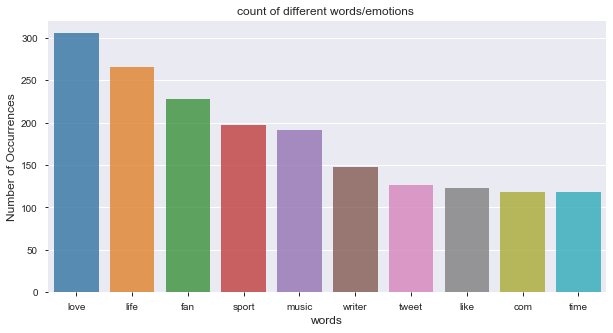

In [1350]:
word_count  = df_men.clean_and_correct_description.str.split(expand=True).stack().value_counts()[:10]
# word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('count of different words/emotions ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('words', fontsize=12)
plt.show()

In [1140]:
df_men.clean_text.str.split(expand=True).stack().value_counts()[:10]

like      251
get       244
one       200
time      185
new       146
day       139
love      137
people    133
got       132
make      132
dtype: int64

In [1141]:
df_men.correct_text.str.split(expand=True).stack().value_counts()[:10]

like      253
get       252
one       222
time      194
new       155
day       147
love      146
a         145
people    133
make      133
dtype: int64

In [1142]:
df_men.clean_and_correct_text.str.split(expand=True).stack().value_counts()[:10]

like      253
get       252
one       226
time      195
new       155
day       151
love      146
make      134
people    134
got       132
dtype: int64

In [1143]:
# count_typos_female_desc = 0
# for sentence in df_female['description']:
#     for word in sentence.split(' '):
#         if(word != spell(word)):
#             print(word + " " + spell(word))
#             count_typos_female_desc+=1

In [1144]:
# print("typos in females description ",count_typos_female_desc)

In [1145]:
# count_typos_female_desc_clean = 0
# for sentence in df_female['clean_description']:
#     for word in sentence.split(' '):
#         if(word != spell(word)):
#             print(word + " " + spell(word))
#             count_typos_female_desc_clean+=1

In [1146]:
# print("typos in clean description of female",count_typos_female_desc_clean)

In [1147]:
# count_typos_female_text = 0
# for sentence in df_female['text']:
#     for word in sentence.split(' '):
#         if(word != spell(word)):
#             print(word + " " + spell(word))
#             count_typos_female_text+=1

In [1148]:
# print("typos in females tweets " , count_typos_female_text)

In [1149]:
# count_typos_female_text_clean = 0
# for sentence in df_female['clean_text']:
#     for word in sentence.split(' '):
#         if(word != spell(word)):
#             print(word + " " + spell(word))
#             count_typos_female_text_clean+=1

In [1150]:
# print("typos in clean text of female", count_typos_female_text_clean)

In [1151]:
# sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
# dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
# bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")

In [1152]:
# sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
# sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

In [1153]:
# from manual_spellchecker import spell_checker
# ob = spell_checker(df3, "description")
# # Quick analysis
# ob.spell_check()
# ob.get_all_errors()

In [1154]:
# correct_text = []
# for sentence in df3['text']:
#     string = ""
#     for word in sentence.split(' '):
#         if(word != spell(word) and spell(word) not in list_of_stopwords and word not in list("abcdefghijklmnopqrstuvwxyz")):
#             string += " " + spell(word)
#         elif spell(word) in list_of_stopwords or word in list("abcdefghijklmnopqrstuvwxyz"):
#             string += " "
#         else :
#             string += " " + word
#     correct_text.append(string)   

In [1155]:
# df3["correct_text"] = correct_text 

In [1156]:
# correct_desc = []
# for sentence in df3['description']:
#     string = ""
#     for word in sentence.split(' '):
#         if(word != spell(word) and spell(word) not in list_of_stopwords and word not in list("abcdefghijklmnopqrstuvwxyz"):
#             string += " " + spell(word)
#         elif spell(word) in list_of_stopwords or word in list("abcdefghijklmnopqrstuvwxyz"):
#             string += " "
#         else :
#            string += " " + word
#      correct_desc.append(string)   

In [1157]:
# df3["correct_description"] = correct_desc 

In [1158]:
# MOST COMMON WORD FOR FEMALES FOR THERE DESCRIPTION IS LOVE,LIFE,GIRL

In [1159]:
df_female = df3[df3['gender'] == "female"]

In [1160]:
df_female.clean_description.str.split(expand=True).stack().value_counts()[:10]

love      426
life      281
girl      183
like      176
lover     161
writer    132
time      130
music     121
one       119
world     116
dtype: int64

In [1161]:
df_female.correct_description.str.split(expand=True).stack().value_counts()[:10]

love      442
life      298
girl      228
like      180
a         166
lover     165
time      137
inst      134
one       133
writer    132
dtype: int64

In [1162]:
df_female.clean_and_correct_description.str.split(expand=True).stack().value_counts()[:10]

love      443
life      300
girl      236
like      182
lover     169
time      143
inst      134
one       133
writer    132
music     131
dtype: int64

In [1163]:
# MOST COMMON WORD FOR FEMALES FOR THERE DESCRIPTION IS LIKE,GET,DAY

In [1164]:
df_female.clean_text.str.split(expand=True).stack().value_counts()[:10]

like      308
get       280
day       262
one       260
love      236
time      205
people    179
got       158
know      153
make      149
dtype: int64

In [1165]:
df_female.correct_text.str.split(expand=True).stack().value_counts()[:10]

one       318
like      309
get       287
day       275
love      249
time      215
people    179
got       159
know      156
make      152
dtype: int64

In [1166]:
df_female.clean_and_correct_text.str.split(expand=True).stack().value_counts()[:10]

one       319
like      309
get       287
day       278
love      249
time      224
people    179
got       159
know      156
make      154
dtype: int64

In [1167]:
df_brand = df3[df3['gender'] == "brand"]

In [1168]:
# MOST COMMON WORD FOR MENS FOR THERE DESCRIPTION IS NEWS

In [1169]:
df_brand.clean_description.str.split(expand=True).stack().value_counts()[:10]

news        525
follow      205
tweet       188
twitter     160
official    159
world       152
business    145
latest      139
service     139
update      133
dtype: int64

In [1170]:
df_brand.clean_text.str.split(expand=True).stack().value_counts()[:10]

get        204
weather    165
new        164
amp        144
one        105
see         98
update      95
year        94
job         85
channel     83
dtype: int64

In [1171]:
df_brand.clean_and_correct_text.str.split(expand=True).stack().value_counts()[:10]

get        215
new        178
weather    167
amp        144
one        109
see        108
year        99
day         96
update      95
job         91
dtype: int64

In [1172]:
freq_top_desc = pd.Series(' '.join(df3['clean_description']).split()).value_counts()[:10]
freq_top_desc

love      802
life      612
news      609
music     416
follow    385
tweet     376
world     360
like      359
fan       349
sport     329
dtype: int64

In [1173]:
# freq_top_desc = list(freq_top_desc.index)
# df3['clean_description'] = df3['clean_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_top_desc))
# df3['clean_description'].head()

In [1174]:
freq_top_text = pd.Series(' '.join(df3['clean_text']).split()).value_counts()[:10]
freq_top_text

get       728
like      610
one       565
day       482
time      470
love      450
new       438
amp       391
people    355
make      341
dtype: int64

In [1175]:
# freq_top_text = list(freq_top_text.index)
# df3['clean_text'] = df3['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_top_text))
# df3['clean_text'].head()

In [1283]:
freq_bottom_desc = pd.Series(' '.join(df3['clean_and_correct_description']).split()).value_counts()[6448:]
freq_bottom_desc

fen                   1
ingle                 1
staffing              1
castro                1
turtleneck            1
                     ..
hillaryparadoxbook    1
disaffected           1
harmless              1
avail                 1
tuesday               1
Length: 5721, dtype: int64

In [1177]:
# freq_bottom_desc = pd.Series(' '.join(df3['correct_description']).split()).value_counts()[10000:]
# freq_bottom_desc

In [1284]:
freq_bottom_desc = list(freq_bottom_desc.index)
df3['clean_and_correct_description'] = df3['clean_and_correct_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_bottom_desc))
df3['clean_and_correct_description'].head()

C:\Users\iota\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                                                 sing
1             author novel filled family drama romance
3    mobile guy google yahoo sprint air touch air f...
4    ricky wilson best front man kaiser chief best ...
5                                                 know
Name: clean_and_correct_description, dtype: object

In [1323]:
freq_bottom_text = pd.Series(' '.join(df3['clean_and_correct_text']).split()).value_counts()[6446:]
freq_bottom_text

qatar        1
geordie      1
whipping     1
marius       1
forfar       1
            ..
accuracy     1
ass          1
addressed    1
candlelit    1
wether       1
Length: 6027, dtype: int64

In [1324]:
freq_bottom_text = list(freq_bottom_text.index)
df3['clean_and_correct_text'] = df3['clean_and_correct_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_bottom_text))
df3['clean_and_correct_text'].head()

C:\Users\iota\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                              critic win eddie edward
1            felt like friend living story retired ian
3    jordan looking url use tit see advanced user g...
4        watching neighbour sky catching night xxx xxx
5                live seen people train lamp chair etc
Name: clean_and_correct_text, dtype: object

In [1325]:
# df3 = df3[df3['gender'] != "brand"]

In [1326]:
le = LabelEncoder()
df3['gender_1'] = le.fit_transform(df3['gender'])

C:\Users\iota\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1327]:
df3.head()

,gender,gender:confidence,description,name,text,names,clean_names,clean_description,clean_text,correct_description,correct_text,clean_and_correct_description,clean_and_correct_text,gender_1
0,male,1.0,i sing my own rhythm,sheezy0,robbie e responds to critics after win against...,sheezy,sheezy,sing rhythm,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,sing,critic win eddie edward,1
1,male,1.0,i m the author of novels filled with family dr...,DavdBurnett,it felt like they were my friends and i was li...,davd burnett,davd burnett,author novel filled family drama romance,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian,1
3,male,1.0,mobile guy ers shazam google kleiner pe...,douggarland,hi jordanspieth looking at the url do you...,douggarland,douggarland,mobile guy er shazam google kleiner perkins ya...,jordanspieth looking url use ifttt typically s...,mobile guy or sham google cleaner perkins yaho...,jordan piety looking urls use if tit typically...,mobile guy google yahoo sprint air touch air f...,jordan looking url use tit see advanced user g...,1
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,WilfordGemma,watching neighbours on sky catching up with t...,wilford gemma,wilford gemma,ricky wilson best frontman kaiser chief best b...,watching neighbour sky catching neighbs xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching nights xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching night xxx xxx,0
5,female,1.0,you don t know me,monroevicious,ive seen people on the train with lamps chair...,monroevicious,monroevicious,know,ive seen people train lamp chair tv etc,know,live seen people train lamp chair to etc,know,live seen people train lamp chair etc,0


In [1328]:
df3['gender'].nunique()

2

In [1329]:
# df_men.correct_and_correct_description.str.split(expand=True).stack().value_counts()[:10]

In [1330]:
# df_men.correct_text.str.split(expand=True).stack().value_counts()[:10]

In [1331]:
cv = CountVectorizer()
sparse_matrix_desc = cv.fit_transform(df3['clean_and_correct_description'])

In [1332]:
sparse_matrix_desc.shape

(8744, 6447)

In [1333]:
cv = CountVectorizer()
sparse_matrix_text = cv.fit_transform(df3['clean_and_correct_text'])

In [1334]:
sparse_matrix_text.shape

(8744, 6445)

In [1335]:
cv = CountVectorizer()
sparse_matrix_names = cv.fit_transform(df3['clean_names'])

In [1336]:
sparse_matrix_names.shape

(8744, 9739)

In [1337]:
sparse_matrix = hstack((sparse_matrix_desc, sparse_matrix_text,sparse_matrix_names))

In [1338]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sparse_matrix, df3['gender_1'])
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6558, 22631), (2186, 22631), (6558,), (2186,))

In [1339]:
from sklearn.naive_bayes import MultinomialNB
nv = MultinomialNB()
nv.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test)
accuracy_score(Y_test, y_pred)

0.707227813357731

In [1340]:
# # save the model to disk
# import pickle 
# filename = 'naive_bayes.pkl'
# pickle.dump(nv, open(filename, 'wb'))
 

In [1341]:
# from sklearn.linear_model import SGDClassifier 
# sgd = SGDClassifier(loss = "modified_huber", shuffle= True,random_state = 100)
# sgd.fit(X_train, Y_train)
# y_pred = sgd.predict(X_test)
# accuracy_score(Y_test, y_pred)

In [1342]:
# from sklearn.neighbors import KNeighborsClassifier 
# knn = KNeighborsClassifier(n_neighbors = 101)
# knn.fit(X_train, Y_train)
# y_pred = knn.predict(X_test)
# accuracy_score(Y_test, y_pred)

In [1343]:
# from sklearn.tree import DecisionTreeClassifier 
# dt = DecisionTreeClassifier()
# dt.fit(X_train, Y_train)
# y_pred = dt.predict(X_test)
# accuracy_score(Y_test, y_pred)

In [1344]:
# from sklearn.ensemble import RandomForestClassifier 
# df = RandomForestClassifier()
# df.fit(X_train, Y_train)
# y_pred = df.predict(X_test)
# accuracy_score(Y_test, y_pred)

In [1345]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
y_pred = svm.predict(X_test)
accuracy_score(Y_test, y_pred)

0.6724611161939615

In [1346]:
# # save the model to disk
# filename = 'support_vector_classifier.pkl'
# pickle.dump(svm, open(filename, 'wb'))
 

In [1347]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {}'.format(accuracy_score(Y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.6843549862763038


In [1348]:
# # save the model to disk
# filename = 'logistic_regression.pkl'
# pickle.dump(logreg, open(filename, 'wb'))
 

In [1349]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('multinomial naive bayes', nv), ('logistic regression', logreg),('SVC',svm)], 
                            voting='hard', weights=[3,2,1]).fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)

print('The accuracy for Multinomial Naive Bayes and Logistic Regression and SVC is:',accuracy_score(Y_test,y_pred))

The accuracy for Multinomial Naive Bayes and Logistic Regression and SVC is: 0.6980786825251601


In [1233]:
# # save the model to disk
# filename = 'ensemble_model.pkl'
# pickle.dump(ensemble, open(filename, 'wb'))
 

In [1205]:
# params = {
    
#     "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
#     "max_depth" : [3,4,5,6,8,10,12,15],
#     "min_child_weight" : [1,3,5,7,9],
#     "gamma" : [0.0,0.1,0.2,0.3,0.4,0.5],
#     "colsample_bytree" : [0.3,0.4,0.5,0.7],
    
    
    
# }

In [1206]:
# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [1207]:
# import xgboost

In [1208]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier()

# random_search = RandomizedSearchCV(xgb,param_distributions = params,n_iter = 5,n_jobs = -1,cv =5,verbose =3)

# random_search.fit(X_train, Y_train)

In [1209]:
# random_search.best_estimator_

In [1210]:
# random_search.best_params_

In [1211]:
# xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.3, max_delta_step=0, max_depth=12,
#               min_child_weight=3, monotone_constraints='()',
#               n_estimators=100, n_jobs=0, num_parallel_tree=1,
#               objective='multi:softprob', random_state=0, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=None, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)

# xgb.fit(X_train, Y_train)
# y_pred = xgb.predict(X_test)
# accuracy_score(Y_test, y_pred)*100

In [1212]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(min_df=5)

# X_tfidf_desc = vectorizer.fit_transform(df2['clean_description']) 

In [1213]:
# vectorizer = TfidfVectorizer(min_df=5)

# X_tfidf_txt = vectorizer.fit_transform(df2['clean_text']) 

In [1214]:
# vectorizer = TfidfVectorizer(min_df=5)

# X_tfidf_names = vectorizer.fit_transform(df2['clean_names']) 

In [1215]:
# # enc = DictVectorizer()
# # X_train_categ = enc.fit_transform(df2[['name']].to_dict('records'))

# # Take a sequence of arrays and stack them horizontally to make a single array. 
# # Rebuild arrays divided by scipy.sparse.hstack. 
# # Note that matrices are sparse. 
# # In numerical analysis, a sparse matrix is a matrix in which most of the elements are zero. 

# X = hstack([X_tfidf_desc,X_tfidf_txt,X_tfidf_names])

In [1216]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df2['gender_enc'] = le.fit_transform(df2['gender'])
# # df2['name2'] = le.fit_transform(df2['name'])

In [1217]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, df2['gender_enc'])
# X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

In [1218]:
# from sklearn.naive_bayes import MultinomialNB
# nv = MultinomialNB()
# nv.fit(X_train, Y_train)

# from sklearn.metrics import accuracy_score
# y_pred = nv.predict(X_test)
# accuracy_score(Y_test, y_pred)

In [1219]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics

In [1220]:
# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)

In [1221]:
# y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

In [1222]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(Y_test, y_pred)
# print(confusion_matrix)

In [1223]:
# from textblob import TextBlob
# from textblob.sentiments import NaiveBayesAnalyzer
# opinion = TextBlob("EliteDataScience.com is dope!", analyzer=NaiveBayesAnalyzer())
# opinion.sentiment

In [1224]:
# import nltk
# nltk.download('movie_reviews')